## Data Cleansing

These actions are based on exploring the data quite deeply. It is not practical to show all of the things looked at. The changes are made here, and after, the cleansed data will be explored.

Import packages needed to explore and modify the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the CSV files
df_client_test = pd.read_csv('./client_test.csv', on_bad_lines='skip')
df_client_train = pd.read_csv('./client_train.csv', on_bad_lines='skip')
df_invoice_test = pd.read_csv('./invoice_test.csv', on_bad_lines='skip')
# low_memory is prompted due to unexpected values and large datasize
df_invoice_train = pd.read_csv('./invoice_train.csv', on_bad_lines='skip', low_memory=False)
df_SampleSubmission = pd.read_csv('./SampleSubmission (2).csv', on_bad_lines='skip')

In [3]:
df_SampleSubmission.head()

client_id    target
0     test_Client_0  0.957281
1     test_Client_1  0.996425
2    test_Client_10  0.612359
3   test_Client_100  0.776933
4  test_Client_1000  0.571046

Conclusion: df_SampleSubmission is not relevant for this project; it is expected format for evaluating performance on Kaggle.

In [4]:
df_client_test.head()

disrict         client_id  client_catg  region creation_date
0       62     test_Client_0           11     307    28/05/2002
1       69     test_Client_1           11     103    06/08/2009
2       62    test_Client_10           11     310    07/04/2004
3       60   test_Client_100           11     101    08/10/1992
4       62  test_Client_1000           11     301    21/07/1977

In [5]:
df_invoice_test.head()

client_id invoice_date  tarif_type  counter_number  counter_statue  \
0  test_Client_0   2018-03-16          11          651208               0   
1  test_Client_0   2014-03-21          11          651208               0   
2  test_Client_0   2014-07-17          11          651208               0   
3  test_Client_0   2015-07-13          11          651208               0   
4  test_Client_0   2016-07-19          11          651208               0   

   counter_code  reading_remarque  counter_coefficient  consommation_level_1  \
0           203                 8                    1                   755   
1           203                 8                    1                  1067   
2           203                 8                    1                     0   
3           203                 9                    1                   410   
4           203                 9                    1                   412   

   consommation_level_2  consommation_level_3  consommation_level_4  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   old_index  new_index  months_number counter_type  
0      19145      19900              8         ELEC  
1      13725      14792              8         ELEC  
2      14792      14792              4         ELEC  
3      16122      16532              4         ELEC  
4      17471      17883              4         ELEC

In [6]:
print(f"Number of rows in client train vs invoice train: {len(df_client_train)} vs {len(df_invoice_train)}")
print(f"Number of unique client_id in client train vs invoice train: {df_client_train['client_id'].nunique()} vs {df_invoice_train['client_id'].nunique()}")
print(f"Number of rows in client test vs invoice test: {len(df_client_test)} vs {len(df_invoice_test)}")
print(f"Number of unique client_id in client test vs invoice test: {df_client_test['client_id'].nunique()} vs {df_invoice_test['client_id'].nunique()}", end="")

Number of rows in client train vs invoice train: 135493 vs 4476749
Number of unique client_id in client train vs invoice train: 135493 vs 135493
Number of rows in client test vs invoice test: 58069 vs 1939730
Number of unique client_id in client test vs invoice test: 58069 vs 58069

Conclusion: This was done for data normalisation. Not too interested in that, going to merge them.

In [7]:
df_train = df_invoice_train.join(df_client_train.set_index('client_id'), on='client_id', validate='m:1').copy()
df_train

client_id invoice_date  tarif_type  counter_number  \
0            train_Client_0   2014-03-24          11         1335667   
1            train_Client_0   2013-03-29          11         1335667   
2            train_Client_0   2015-03-23          11         1335667   
3            train_Client_0   2015-07-13          11         1335667   
4            train_Client_0   2016-11-17          11         1335667   
...                     ...          ...         ...             ...   
4476744  train_Client_99998   2005-08-19          10         1253571   
4476745  train_Client_99998   2005-12-19          10         1253571   
4476746  train_Client_99999   1996-09-25          11          560948   
4476747  train_Client_99999   1996-05-28          11          560948   
4476748  train_Client_99999   1996-01-25          11          560948   

        counter_statue  counter_code  reading_remarque  counter_coefficient  \
0                    0           203                 8                    1   
1                    0           203                 6                    1   
2                    0           203                 8                    1   
3                    0           207                 8                    1   
4                    0           207                 9                    1   
...                ...           ...               ...                  ...   
4476744              0           202                 9                    1   
4476745              0           202                 6                    1   
4476746              0           203                 6                    1   
4476747              0           203                 6                    1   
4476748              0           203                 6                    1   

         consommation_level_1  consommation_level_2  ...  \
0                          82                     0  ...   
1                        1200                   184  ...   
2                         123                     0  ...   
3                         102                     0  ...   
4                         572                     0  ...   
...                       ...                   ...  ...   
4476744                   400                   135  ...   
4476745                   200                     6  ...   
4476746                   259                     0  ...   
4476747                   603                     0  ...   
4476748                   516                     0  ...   

         consommation_level_4  old_index  new_index  months_number  \
0                           0      14302      14384              4   
1                           0      12294      13678              4   
2                           0      14624      14747              4   
3                           0      14747      14849              4   
4                           0      15066      15638             12   
...                       ...        ...        ...            ...   
4476744                     0       3197       3732              8   
4476745                     0       3732       3938              4   
4476746                     0      13884      14143              4   
4476747                     0      13281      13884              4   
4476748                     0      12765      13281              4   

         counter_type disrict  client_catg  region  creation_date target  
0                ELEC      60           11     101     31/12/1994    0.0  
1                ELEC      60           11     101     31/12/1994    0.0  
2                ELEC      60           11     101     31/12/1994    0.0  
3                ELEC      60           11     101     31/12/1994    0.0  
4                ELEC      60           11     101     31/12/1994    0.0  
...               ...     ...          ...     ...            ...    ...  
4476744          ELEC      60           11     101     22/12/1993    0.0  
4476745          ELEC      60           11

In [8]:
df_test = df_invoice_test.join(df_client_test.set_index('client_id'), on='client_id', validate='m:1').copy()
df_test

client_id invoice_date  tarif_type  counter_number  \
0           test_Client_0   2018-03-16          11          651208   
1           test_Client_0   2014-03-21          11          651208   
2           test_Client_0   2014-07-17          11          651208   
3           test_Client_0   2015-07-13          11          651208   
4           test_Client_0   2016-07-19          11          651208   
...                   ...          ...         ...             ...   
1939725  test_Client_9999   2010-03-11          11          869269   
1939726  test_Client_9999   2011-03-15          11          869269   
1939727  test_Client_9999   2012-12-03          11          869269   
1939728  test_Client_9999   2009-07-01          11          869269   
1939729  test_Client_9999   2017-03-11          11          869269   

         counter_statue  counter_code  reading_remarque  counter_coefficient  \
0                     0           203                 8                    1   
1                     0           203                 8                    1   
2                     0           203                 8                    1   
3                     0           203                 9                    1   
4                     0           203                 9                    1   
...                 ...           ...               ...                  ...   
1939725               0           203                 6                    1   
1939726               0           203                 6                    1   
1939727               0           203                 6                    1   
1939728               0           203                 6                    1   
1939729               0           203                 9                    1   

         consommation_level_1  consommation_level_2  consommation_level_3  \
0                         755                     0                     0   
1                        1067                     0                     0   
2                           0                     0                     0   
3                         410                     0                     0   
4                         412                     0                     0   
...                       ...                   ...                   ...   
1939725                   248                     0                     0   
1939726                   260                     0                     0   
1939727                   312                     0                     0   
1939728                   236                     0                     0   
1939729                   800                   282                     0   

         consommation_level_4  old_index  new_index  months_number  \
0                           0      19145      19900              8   
1                           0      13725      14792              8   
2                           0      14792      14792              4   
3                           0      16122      16532              4   
4                           0      17471      17883              4   
...                       ...        ...        ...            ...   
1939725                     0      21114      21362              4   
1939726                     0      21362      21622              4   
1939727                     0      22272      22584              4   
1939728                     0      19909      20145              4   
1939729                     0      32834      33916              4   

        counter_type  disrict  client_catg  region creation_date  
0               ELEC       62           11     307    28/05/2002  
1               ELEC       62           11     307    28/05/2002  
2               ELEC       62           11     307    28/05/2002  
3               ELEC       62           11     307    28/05/2002  
4               ELEC       62           11     307    28/05/2002  
...              ...      ...          ...    

In [9]:
del df_invoice_train, df_invoice_test, df_client_train, df_client_test, df_SampleSubmission

Would like to condense the data a bit. There are some comments from the source regarding the meaning of these columns. These included here verbatim.

"client_train.csv":

"disrict: District where the client is"

"client_id: Unique id for client"

"client_catg: Category client belongs to"

"region: Area where the client is"

"creation_date: Date client joined"

"target: fraud:1, not fraud: 0"

"invoice_train.csv":

"client_id: Unique id for client"

"invoice_date: Date of the invoice"

"tarif_type: Type of tax"

"counter_number: number"

"counter_statue: akes up to 5 values such as working fine, not working, on hold statue, ect"

"counter_code: code"

"reading_remarque: notes that the STEG agent takes during his visit to the cleint (e.g.: if the counter shows something wrong, the"

"counter_coefficient: An additional coefficient to be added when standard consumption is exceeded"

"consommation_level_1: Consumption_level_1"

"consommation_level_2: Consumption_level_2"

"consommation_level_3: Consumption_level_3"

"consommation_level_4: Consumption_level_4"

"old_index: Old index"

"new_index: New index"

"months_number: Month number"

"counter_type: Type of counter"

Going to rename the columns slightly.

In [10]:
rename_dict = {'client_id' : 'client_id', 
               'invoice_date' : 'invoice_date', 
               'tarif_type' : 'mtr_tariff', 
               'counter_number' : 'mtr_id',
               'counter_statue' : 'mtr_status', 
               'counter_code' : 'mtr_code', 
               'reading_remarque' : 'mtr_notes',
               'counter_coefficient' : 'mtr_coef', 
               'consommation_level_1' : 'usage_1', 
               'consommation_level_2' : 'usage_2',
               'consommation_level_3' : 'usage_3', 
               'consommation_level_4' : 'usage_4', 
               'old_index' : 'mtr_val_old',
               'new_index' : 'mtr_val_new', 
               'months_number': 'months_num', 
               'counter_type' : 'mtr_type', 
               'disrict' : 'district', 
               'client_catg' : 'client_type',
               'region' : 'region', 
               'creation_date' : 'start_date', 
               'target' : 'fraud'}

df_train.rename(columns=rename_dict, inplace=True)

In [11]:
df_train.dtypes

client_id        object
invoice_date     object
mtr_tariff        int64
mtr_id            int64
mtr_status       object
mtr_code          int64
mtr_notes         int64
mtr_coef          int64
usage_1           int64
usage_2           int64
usage_3           int64
usage_4           int64
mtr_val_old       int64
mtr_val_new       int64
months_num        int64
mtr_type         object
district          int64
client_type       int64
region            int64
start_date       object
fraud           float64
dtype: object

Converting data types where appropriate:

In [12]:
# invoice_date: object -> date [YYYY-MM-DD] -> [YYYY-MM-DD]
df_train['invoice_date'] = pd.to_datetime(df_train['invoice_date'])
# start_date: object -> date [DD/MM/YYYY] -> [YYYY-MM-DD]
df_train['start_date'] = pd.to_datetime(df_train['start_date'], dayfirst=True)

In [13]:
# Looking at unique values for the columns (but skipping the dates)
col_names = df_train.columns
col_names = [col_name for col_name in col_names if 'date' not in col_name]
# Anything with a high ratio means a lot of repeated values found
for col_name in col_names:
    print(f"Column name: {col_name}, Unique Values: {df_train[col_name].unique()}")
    print(f"Column name: {col_name}, Unique Values Ratio: {len(df_train) / df_train[col_name].nunique()}")

Column name: client_id, Unique Values: ['train_Client_0' 'train_Client_1' 'train_Client_10' ...
 'train_Client_99997' 'train_Client_99998' 'train_Client_99999']
Column name: client_id, Unique Values Ratio: 33.04044489383215
Column name: mtr_tariff, Unique Values: [11 40 15 10 12 14 13 45 29  9 30  8 21 42 27 18 24]
Column name: mtr_tariff, Unique Values Ratio: 263338.17647058825
Column name: mtr_id, Unique Values: [1335667  678902  572765 ... 4811719  262195  560948]
Column name: mtr_id, Unique Values Ratio: 22.173869326821634
Column name: mtr_status, Unique Values: ['0' '1' '5' '4' '3' '2' '769' 'A' '618' '269375' '46' '420']
Column name: mtr_status, Unique Values Ratio: 373062.4166666667
Column name: mtr_code, Unique Values: [203 207 413   5 467 202 420 410  10 483  25 433 407 204 214 442 453 506
 450 403 333 201 102 305 210 101 532  40 310 565 600 307 303 222  65   0
 227 325  16 317 367   1]
Column name: mtr_code, Unique Values Ratio: 106589.26190476191
Column name: mtr_notes, Uniq

There are some issues with the data about to be discussed. Changing only columns that aren't affected here

In [14]:
# The following columns:
# mtr_tariff, mtr_status, mtr_code, mtr_notes, mtr_coef, mtr_type, district, client_type, region
# all seem very repetitive and are going to be treated as categories.
col_names = ['mtr_type', 'district', 'client_type', 'region'] # Those excluded will be dealt with later
df_train[col_names] = df_train[col_names].astype("category")

Based on data mining, some relationships have been deduced:
* usage_1 -> usage_4 are connected in a complicated way. 
* It seems that the usage_X will affected based on either the mtr_tariff or mtr_code.
* There are two main aspects that can be affected: whether a usage_X is capped, and if so, what the cap should be.
* The usage, will "spill" over into the next level if capped and the cap is exceeded.
* usage_3 cap is equal to usage_1 cap. usage_2 cap is equal half usage_1 cap. usage_4 is uncapped. These are sequentially "filled".
* It does not seem to matter which usage_X is counted: it is not that they're scaled differently etc.
* However, mtr_coef does scale all usage_X values.
* mtr_val_old and mtr_val_new are meant to track the meter reading, before and after the usage_X is applied.
* Importantly, the data is partially corrupted. Therefore, the order that I present things is based on reversing corrected the data more than on being easy to follow along.

Rule 1: 'mtr_code' != 0
Otherwise, this seems a sign of corruption

In [15]:
df_train['mtr_status'].value_counts()

mtr_status
0         4379008
1           74036
5           20639
4            2729
3             258
2              32
46             14
A              13
618            12
769             6
269375          1
420             1
Name: count, dtype: int64

In [16]:
df_train['mtr_code'].value_counts()

mtr_code
203    1516836
5      1352035
207     555628
413     378917
202     343251
420      98273
410      69080
433      34447
10       27744
442      17050
25       14934
407      13768
204      12427
453       8290
201       7672
467       7302
506       3389
483       2830
214       2643
40        2482
532       1982
565       1082
403       1070
450       1059
600        807
210        789
102        313
227        178
101         74
65          74
16          73
310         51
307         50
305         44
222         42
0           33
317         16
303          5
333          4
367          3
325          1
1            1
Name: count, dtype: int64

In [17]:
df_train['mtr_notes'].value_counts()

mtr_notes
6      2230939
9      1416992
8       828123
7          661
203         15
413         12
207          6
5            1
Name: count, dtype: int64

In [18]:
df_train['mtr_tariff'].value_counts()

mtr_tariff
11    2679872
40    1379755
10     276210
15      72422
45      17552
13      11656
14      11611
12      11345
29      10090
9        6039
21        104
8          43
30         35
24          9
18          4
27          1
42          1
Name: count, dtype: int64

In [19]:
df_train['mtr_coef'].value_counts()

mtr_coef
1     4475102
2         886
3         321
40        197
30        137
0          46
6          30
4          12
10          6
9           3
20          3
50          2
33          1
5           1
11          1
8           1
Name: count, dtype: int64

Looking at outlier values for 'mtr_status'

In [20]:
mask = df_train['mtr_status'].isin(['46', '618', '769', '269375', '420']) # Manual check showed 'A' seems acceptable
print(f'number of bad mtr_status: {sum(mask)}.')
df_train['adj_flag'] = mask
col_names = ['client_id', 'mtr_id', 'mtr_tariff']
mask = df_train.groupby(col_names)['adj_flag'].transform('any')
print(f'number of affected rows if grouped: {sum(mask)}.')
df_train[mask]

number of bad mtr_status: 34.
number of affected rows if grouped: 34.


client_id invoice_date  mtr_tariff  mtr_id mtr_status  \
1178200  train_Client_13203   2010-11-19          11     170        769   
1178205  train_Client_13203   2011-11-21          11     170        769   
1178207  train_Client_13203   2011-07-21          11     170        769   
1178209  train_Client_13203   2011-03-29          11     170        769   
1178211  train_Client_13203   2010-07-19          11     170        769   
1178214  train_Client_13203   2010-03-24          11     170        769   
2556034  train_Client_47780   2017-08-16          11     752        618   
2556035  train_Client_47780   2017-12-19          11     752        618   
2556036  train_Client_47780   2015-12-17          11     752        618   
2556037  train_Client_47780   2016-04-18          11     752        618   
2556038  train_Client_47780   2019-04-19          11     752        618   
2556039  train_Client_47780   2016-12-20          11     752        618   
2556040  train_Client_47780   2018-04-17          11     752        618   
2556041  train_Client_47780   2017-04-17          11     752        618   
2556042  train_Client_47780   2019-08-23          11     752        618   
2556043  train_Client_47780   2018-12-21          11     752        618   
2556044  train_Client_47780   2018-08-14          11     752        618   
2556045  train_Client_47780   2016-08-18          11     752        618   
2773073  train_Client_53725   1996-02-04          11       7     269375   
3677108  train_Client_78338   2008-10-17          11     992         46   
3677111  train_Client_78338   2009-02-17          11     992         46   
3677114  train_Client_78338   2010-02-18          11     992         46   
3677115  train_Client_78338   2009-06-18          11     992         46   
3677119  train_Client_78338   2010-06-16          11     992         46   
3677121  train_Client_78338   2009-10-16          11     992         46   
3677125  train_Client_78338   2005-03-10          11     992         46   
3677131  train_Client_78338   2011-10-14          11     992         46   
3677142  train_Client_78338   2007-02-19          11     992         46   
3677144  train_Client_78338   2006-10-16          11     992         46   
3677146  train_Client_78338   2010-10-14          11     992         46   
3677149  train_Client_78338   2006-06-21          11     992         46   
3677152  train_Client_78338   2007-10-18          11     992         46   
3677153  train_Client_78338   2008-02-20          11     992         46   
3704439  train_Client_79075   2012-01-16          40     412        420   

         mtr_code  mtr_notes  mtr_coef  usage_1  usage_2  ...  mtr_val_old  \
1178200         0        207         6        1      479  ...            0   
1178205         0        207         6        1      642  ...            0   
1178207         0        207         6        1      453  ...            0   
1178209         0        207         6        1      437  ...            0   
1178211         0        207         6        1      385  ...            0   
1178214         0        207         6        1      332  ...            0   
2556034         0        413         6        1        0  ...            0   
2556035         0        413         9        1        1  ...            0   
2556036         0        413         9        1        2  ...            0   
2556037         0        413         6        1        0  ...            0   
2556038         0        413         6        1        0  ...            0   
2556039         0        413         6        1        0  ...            0   
2556040         0        413         6        1        0  ...            0   
2556041         0        413         6        1        0  ...            0   
2556042         0        413         6        1        0  ...            0   
2556043         0        413         6        1        0  ...            0   
2556044         0        413         6        1        0  ...     

For these, it is assumed that the columns have been shifted by mistake. One key sign here is usage_1 == 1 and mtr_coef == 6 | 8 | 9.
It is not clear why. Likely, the changes will introduce errors. However, given the time constraint, the goal is reduce the net quantity of errors.
In particular, it is not clear what 'mtr_id' and/or 'mtr_status' is meant to represent here and which might be wrong. 'mtr_id' will be kept and 'mtr_status' will be deleted.
Not yet sure what to do with months_num so placing rogue values of -1.

In [21]:
df_train.loc[mask, df_train.columns[4:14]] = df_train.loc[mask, df_train.columns[5:15]].values
df_train.loc[mask, df_train.columns[14]] = -1
df_train[mask]

client_id invoice_date  mtr_tariff  mtr_id mtr_status  \
1178200  train_Client_13203   2010-11-19          11     170          0   
1178205  train_Client_13203   2011-11-21          11     170          0   
1178207  train_Client_13203   2011-07-21          11     170          0   
1178209  train_Client_13203   2011-03-29          11     170          0   
1178211  train_Client_13203   2010-07-19          11     170          0   
1178214  train_Client_13203   2010-03-24          11     170          0   
2556034  train_Client_47780   2017-08-16          11     752          0   
2556035  train_Client_47780   2017-12-19          11     752          0   
2556036  train_Client_47780   2015-12-17          11     752          0   
2556037  train_Client_47780   2016-04-18          11     752          0   
2556038  train_Client_47780   2019-04-19          11     752          0   
2556039  train_Client_47780   2016-12-20          11     752          0   
2556040  train_Client_47780   2018-04-17          11     752          0   
2556041  train_Client_47780   2017-04-17          11     752          0   
2556042  train_Client_47780   2019-08-23          11     752          0   
2556043  train_Client_47780   2018-12-21          11     752          0   
2556044  train_Client_47780   2018-08-14          11     752          0   
2556045  train_Client_47780   2016-08-18          11     752          0   
2773073  train_Client_53725   1996-02-04          11       7          0   
3677108  train_Client_78338   2008-10-17          11     992          0   
3677111  train_Client_78338   2009-02-17          11     992          0   
3677114  train_Client_78338   2010-02-18          11     992          0   
3677115  train_Client_78338   2009-06-18          11     992          0   
3677119  train_Client_78338   2010-06-16          11     992          0   
3677121  train_Client_78338   2009-10-16          11     992          0   
3677125  train_Client_78338   2005-03-10          11     992          0   
3677131  train_Client_78338   2011-10-14          11     992          0   
3677142  train_Client_78338   2007-02-19          11     992          0   
3677144  train_Client_78338   2006-10-16          11     992          0   
3677146  train_Client_78338   2010-10-14          11     992          0   
3677149  train_Client_78338   2006-06-21          11     992          0   
3677152  train_Client_78338   2007-10-18          11     992          0   
3677153  train_Client_78338   2008-02-20          11     992          0   
3704439  train_Client_79075   2012-01-16          40     412          1   

         mtr_code  mtr_notes  mtr_coef  usage_1  usage_2  ...  mtr_val_old  \
1178200       207          6         1      479        0  ...          717   
1178205       207          6         1      642        0  ...         2086   
1178207       207          6         1      453        0  ...         1633   
1178209       207          6         1      437        0  ...         1196   
1178211       207          6         1      385        0  ...          332   
1178214       207          6         1      332        0  ...            0   
2556034       413          6         1        0        0  ...            2   
2556035       413          9         1        1        0  ...            2   
2556036       413          9         1        2        0  ...            0   
2556037       413          6         1        0        0  ...            2   
2556038       413          6         1        0        0  ...            3   
2556039       413          6         1        0        0  ...            2   
2556040       413          6         1        0        0  ...            3   
2556041       413          6         1        0        0  ...            2   
2556042       413          6         1        0        0  ...            3   
2556043       413          6         1        0        0  ...            3   
2556044       413          6         1        0        0  ...     

Looking at outlier values for 'mtr_coef'

'mtr_coef' of 0 is rare, and any energy usage in that row does not transfer onwards. These rows will be deleted.

In [22]:
mask = df_train['mtr_coef'] == 0 # Manual check showed these do not contribute to energy usage over time. They reset each row.
print(f'number of mtr_coef == 0: {sum(mask)}.')
df_removed = df_train[mask].copy() # Record of deleted rows
df_train = df_train[~mask]

number of mtr_coef == 0: 46.


In [23]:
df_train['months_num'].value_counts()

months_num
4         3680456
8          278770
2          270886
1          113265
12          54328
           ...   
378671          1
374707          1
454440          1
370510          1
38329           1
Name: count, Length: 1350, dtype: int64

'usage_n' is sum of the usage_X columns, and it ought to represent the total usage of that row. This usage is meant to be scaled by 'mtr_coef' first (via division). This ought to be reflected in the difference between 'mtr_val_old' and 'mtr_val_new'. However, it is often not, due to various issues. This is quite tricky and I don't have time to "solve" it fully.

In [24]:
# Getting total usage (scaled by coef):
df_train.loc[:, 'usage_n'] = (df_train[['usage_1', 'usage_2', 'usage_3', 'usage_4']].sum(axis=1) / df_train['mtr_coef'])
df_train.loc[:, 'mtr_val_new_calc'] = df_train.loc[:, 'mtr_val_old'] + df_train.loc[:, 'usage_n'] # This is what is expected if all is working
mask = df_train['mtr_val_new'] != df_train['mtr_val_new_calc']
df_temp = df_train[mask]
df_temp

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\4187570890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'usage_n'] = (df_train[['usage_1', 'usage_2', 'usage_3', 'usage_4']].sum(axis=1) / df_train['mtr_coef'])
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\4187570890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'mtr_val_new_calc'] = df_train.loc[:, 'mtr_val_old'] + df_train.loc[:, 'usage_n'] # This is what is expected if all is working


client_id invoice_date  mtr_tariff   mtr_id mtr_status  \
1120     train_Client_100024   2014-06-20          11   482429          0   
1215     train_Client_100025   2012-02-17          11  1028965          0   
1865     train_Client_100050   2012-01-25          11   112753          0   
2632     train_Client_100075   2008-11-27          11   502690          0   
2818      train_Client_10008   2015-05-01          11   842528          0   
...                      ...          ...         ...      ...        ...   
4475524   train_Client_99964   2010-08-11          15   403585          0   
4475991   train_Client_99978   2011-08-12          40  7006449          0   
4476318   train_Client_99985   2006-10-18          11   974695          0   
4476420   train_Client_99988   2012-05-01          40    70623          0   
4476647   train_Client_99995   2008-02-26          40   156063          0   

         mtr_code  mtr_notes  mtr_coef  usage_1  usage_2  ...  months_num  \
1120          207          8         1      800      400  ...           4   
1215          203          6         1      372        0  ...           4   
1865          413          9         1     2400      543  ...           8   
2632          410          6         1      116        0  ...          14   
2818          413          9         1      800      400  ...           4   
...           ...        ...       ...      ...      ...  ...         ...   
4475524       202          9         1      215        0  ...           2   
4475991         5          6         1      395        0  ...           6   
4476318       532          6         3     1200    48618  ...           4   
4476420         5          6         1       61        0  ...           4   
4476647         5          6         1      139        0  ...           4   

         mtr_type  district  client_type  region start_date fraud adj_flag  \
1120         ELEC        60           11     101 1985-03-22   0.0    False   
1215         ELEC        63           11     311 2005-12-15   0.0    False   
1865         ELEC        63           11     311 1994-12-31   0.0    False   
2632         ELEC        60           11     101 2007-09-13   0.0    False   
2818         ELEC        63           11     101 1987-09-14   0.0    False   
...           ...       ...          ...     ...        ...   ...      ...   
4475524      ELEC        60           11     101 1978-10-04   0.0    False   
4475991       GAZ        69           11     104 1995-10-30   0.0    False   
4476318      ELEC        60           51     101 1994-12-31   0.0    False   
4476420       GAZ        63           11     101 2002-12-10   0.0    False   
4476647       GAZ        62           11     304 2004-07-26   0.0    False   

         usage_n mtr_val_new_calc  
1120      1518.0         100778.0  
1215       372.0           7324.0  
1865      2943.0          10652.0  
2632       116.0            116.0  
2818      2363.0         101849.0  
...          ...              ...  
4475524    215.0           4550.0  
4475991    395.0           2876.0  
4476318  16606.0         116514.0  
4476420     61.0           1611.0  
4476647    139.0            139.0  

[17456 rows x 24 columns]

There are quite a lot of cases to consider and this was result of a lot of trial and error:
* Rule 1: If 'months_num' > 240, Then Flag
* Rule 2a: If columns 'usage_2' -> 'mtr_val_new' are all 0, Then Ignore
* Rule 2b: Else If 'usage_3' > 0, and 'usage_2' is not half 'usage_1', Then Flag
* Rule 2c: Else If 'usage_1' is 1-9, and 'usage_2' is not 0, Then Flag
* Rule 2d: Else If 'usage_1' is 1-9, and 'mtr_val_new' equals 'months_num', and 'mtr_val_new' is not 'mtr_val_new_calc', Then Flag
* Rule 3: If Flagged and 'mtr_val_old' is not 0, and 'usage_4' is 0, Then Ignore (Unflag)

In [25]:
# Rules 1 and 2
mask = (((df_train['usage_2'] + df_train['usage_3'] + df_train['usage_4'] + df_train['mtr_val_old'] + df_train['mtr_val_new'] != 0) &
        (((df_train['usage_3'] > 0) & ((df_train['usage_1'] / 2) != df_train['usage_2'])) |
         ((df_train['usage_1'] > 0) & (df_train['usage_1'] < 10) & (df_train['usage_2'] > 0))) |
         ((df_train['usage_1'] > 0) & (df_train['usage_1'] < 10) & (df_train['mtr_val_new'] == df_train['months_num']) & (df_train['mtr_val_new'] != df_train['mtr_val_new_calc']))) |
         (df_train['months_num'] > 240))
df_train.loc[:, 'temp_flag'] = mask
# Rule 3
df_train.loc[(df_train['temp_flag'] == True) & (df_train['mtr_val_old'] != 0) & (df_train['usage_4'] == 0), 'temp_flag'] = False

mask = df_train['temp_flag'] == True
df_temp = df_train[mask]
df_temp

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\2998673144.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'temp_flag'] = mask


client_id invoice_date  mtr_tariff    mtr_id mtr_status  \
20211    train_Client_100551   2010-08-30          11   1099471          0   
20212    train_Client_100551   2010-06-05          11   1099471          0   
20213    train_Client_100551   2010-08-01          11   1099471          0   
20214    train_Client_100551   2009-03-09          11   1099471          0   
20215    train_Client_100551   2011-03-14          11   1099471          5   
...                      ...          ...         ...       ...        ...   
4457223   train_Client_99465   2015-03-02          11  99072847          0   
4457224   train_Client_99465   2011-04-07          11  99072847          0   
4457225   train_Client_99465   2011-02-08          11  99072847          0   
4457226   train_Client_99465   2015-06-01          11  99072847          0   
4457227   train_Client_99465   2015-02-04          11  99072847          0   

         mtr_code  mtr_notes  mtr_coef  usage_1  usage_2  ...  mtr_type  \
20211         467          6         1        5     1200  ...      ELEC   
20212         467          9         1        5     1200  ...      ELEC   
20213         467          9         1        5     1200  ...      ELEC   
20214         467          9         1        5     1200  ...      ELEC   
20215         467          6         1        5        0  ...      ELEC   
...           ...        ...       ...      ...      ...  ...       ...   
4457223       506          9         1        5      200  ...      ELEC   
4457224       506          6         1        5      300  ...      ELEC   
4457225       506          6         1        5      300  ...      ELEC   
4457226       506          9         1        5      200  ...      ELEC   
4457227       506          9         1        5      400  ...      ELEC   

         district  client_type  region  start_date fraud adj_flag  usage_n  \
20211          60           11     101  2009-02-20   0.0    False  11949.0   
20212          60           11     101  2009-02-20   0.0    False  11771.0   
20213          60           11     101  2009-02-20   0.0    False   9995.0   
20214          60           11     101  2009-02-20   0.0    False   4229.0   
20215          60           11     101  2009-02-20   0.0    False      5.0   
...           ...          ...     ...         ...   ...      ...      ...   
4457223        60           51     101  2000-03-22   0.0    False    505.0   
4457224        60           51     101  2000-03-22   0.0    False   3938.0   
4457225        60           51     101  2000-03-22   0.0    False   4632.0   
4457226        60           51     101  2000-03-22   0.0    False    505.0   
4457227        60           51     101  2000-03-22   0.0    False   1005.0   

        mtr_val_new_calc temp_flag  
20211            11949.0      True  
20212            11771.0      True  
20213             9995.0      True  
20214             4229.0      True  
20215                5.0      True  
...                  ...       ...  
4457223           2315.0      True  
4457224           3938.0      True  
4457225           4632.0      True  
4457226           1826.0      True  
4457227           3426.0      True  

[1392 rows x 25 columns]

For these, it is assumed that 'mtr_ceof' had a decimal place that caused an offset. For example, "1,5" caused the 5 to fall into 'usage_1', etc. 'months_num' was then overwritten and lost.
'mtr_coef' will be reconstructed for these examples, and columns shifted. Not yet sure what to do with months_num so placing rogue values of -1.

In [26]:
df_train.loc[mask, 'adj_flag'] = True
df_train['mtr_coef'] = df_train['mtr_coef'].astype('float64')
df_train.loc[mask, 'mtr_coef'] = df_train.loc[mask, 'mtr_coef'].values + (df_train.loc[mask, 'usage_1'].values / 10).round(1)
df_train.loc[mask, df_train.columns[8:14]] = df_train.loc[mask, df_train.columns[9:15]].values
df_train.loc[mask, df_train.columns[14]] = -1
df_train[col_names][mask]

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\4236224231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mtr_coef'] = df_train['mtr_coef'].astype('float64')


client_id    mtr_id  mtr_tariff
20211    train_Client_100551   1099471          11
20212    train_Client_100551   1099471          11
20213    train_Client_100551   1099471          11
20214    train_Client_100551   1099471          11
20215    train_Client_100551   1099471          11
...                      ...       ...         ...
4457223   train_Client_99465  99072847          11
4457224   train_Client_99465  99072847          11
4457225   train_Client_99465  99072847          11
4457226   train_Client_99465  99072847          11
4457227   train_Client_99465  99072847          11

[1392 rows x 3 columns]

The usage needs to be recalculated with the coefficients

In [27]:
# Converting 'mtr_val_' into float for now, as decimal places get in the way otherwise
df_train['mtr_val_old'] = df_train['mtr_val_old'].astype(float).round(0)
df_train['mtr_val_new'] = df_train['mtr_val_new'].astype(float).round(0)
# Getting total usage (scaled by coef):
df_train.loc[:, 'usage_n'] = (df_train[['usage_1', 'usage_2', 'usage_3', 'usage_4']].sum(axis=1) / df_train['mtr_coef']).round(0)
df_train.loc[:, 'mtr_val_new_calc'] = df_train.loc[:, 'mtr_val_old'] + df_train.loc[:, 'usage_n'].round(0) # This is what is expected if all is working
mask = df_train['mtr_val_new'] != df_train['mtr_val_new_calc']
print(sum(mask))
df_temp = df_train[mask]
df_temp

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\1291164973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mtr_val_old'] = df_train['mtr_val_old'].astype(float).round(0)
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\1291164973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mtr_val_new'] = df_train['mtr_val_new'].astype(float).round(0)


16389


client_id invoice_date  mtr_tariff   mtr_id mtr_status  \
1120     train_Client_100024   2014-06-20          11   482429          0   
1215     train_Client_100025   2012-02-17          11  1028965          0   
1865     train_Client_100050   2012-01-25          11   112753          0   
2632     train_Client_100075   2008-11-27          11   502690          0   
2818      train_Client_10008   2015-05-01          11   842528          0   
...                      ...          ...         ...      ...        ...   
4475524   train_Client_99964   2010-08-11          15   403585          0   
4475991   train_Client_99978   2011-08-12          40  7006449          0   
4476318   train_Client_99985   2006-10-18          11   974695          0   
4476420   train_Client_99988   2012-05-01          40    70623          0   
4476647   train_Client_99995   2008-02-26          40   156063          0   

         mtr_code  mtr_notes  mtr_coef  usage_1  usage_2  ...  mtr_type  \
1120          207          8       1.0      800      400  ...      ELEC   
1215          203          6       1.0      372        0  ...      ELEC   
1865          413          9       1.0     2400      543  ...      ELEC   
2632          410          6       1.0      116        0  ...      ELEC   
2818          413          9       1.0      800      400  ...      ELEC   
...           ...        ...       ...      ...      ...  ...       ...   
4475524       202          9       1.0      215        0  ...      ELEC   
4475991         5          6       1.0      395        0  ...       GAZ   
4476318       532          6       3.0     1200    48618  ...      ELEC   
4476420         5          6       1.0       61        0  ...       GAZ   
4476647         5          6       1.0      139        0  ...       GAZ   

         district  client_type  region  start_date fraud adj_flag  usage_n  \
1120           60           11     101  1985-03-22   0.0    False   1518.0   
1215           63           11     311  2005-12-15   0.0    False    372.0   
1865           63           11     311  1994-12-31   0.0    False   2943.0   
2632           60           11     101  2007-09-13   0.0    False    116.0   
2818           63           11     101  1987-09-14   0.0    False   2363.0   
...           ...          ...     ...         ...   ...      ...      ...   
4475524        60           11     101  1978-10-04   0.0    False    215.0   
4475991        69           11     104  1995-10-30   0.0    False    395.0   
4476318        60           51     101  1994-12-31   0.0    False  16606.0   
4476420        63           11     101  2002-12-10   0.0    False     61.0   
4476647        62           11     304  2004-07-26   0.0    False    139.0   

        mtr_val_new_calc temp_flag  
1120            100778.0     False  
1215              7324.0     False  
1865             10652.0     False  
2632               116.0     False  
2818            101849.0     False  
...                  ...       ...  
4475524           4550.0     False  
4475991           2876.0     False  
4476318         116514.0     False  
4476420           1611.0     False  
4476647            139.0     False  

[16389 rows x 25 columns]

There is an issue with how the dates were originally parsed prior to being uploaded to Kaggle. The months and days are in places switched, as deduced by considering 'mtr_val_old', 'mtr_val_new', and 'months_num'.

In [28]:
df_train.sort_values(by=['client_id', 'mtr_id', 'mtr_tariff', 'invoice_date'], inplace=True)
df_train['mtr_val_nxt'] = df_train.groupby(col_names)['mtr_val_old'].shift(-1)
df_train['temp_flag'] = (df_train['mtr_val_new'] > df_train['mtr_val_nxt']) & (df_train['mtr_val_nxt'].notna()) # Out of order
print(sum(df_train['temp_flag'])) # number of times rule is being broken
df_temp = df_train[df_train['temp_flag'] == True]
df_temp

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\3034704622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.sort_values(by=['client_id', 'mtr_id', 'mtr_tariff', 'invoice_date'], inplace=True)
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\3034704622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mtr_val_nxt'] = df_train.groupby(col_names)['mtr_val_old'].shift(-1)
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\3034704622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

596787


client_id invoice_date  mtr_tariff   mtr_id mtr_status  \
19           train_Client_0   2013-02-12          11  1335667          0   
43           train_Client_1   2008-02-07          11   678902          0   
56           train_Client_1   2009-03-11          11   678902          0   
57           train_Client_1   2010-05-10          11   678902          0   
40           train_Client_1   2010-07-06          11   678902          0   
...                     ...          ...         ...      ...        ...   
4476721  train_Client_99997   2016-03-06          40        0          0   
4476727  train_Client_99997   2013-11-10          11   262195          0   
4476720  train_Client_99997   2016-03-06          11   262195          0   
4476724  train_Client_99997   2017-02-06          11   262195          0   
4476717  train_Client_99997   2018-05-30          11   262195          0   

         mtr_code  mtr_notes  mtr_coef  usage_1  usage_2  ...  district  \
19            203          8       1.0       38        0  ...        60   
43            203          6       1.0      528        0  ...        69   
56            203          6       1.0     1207        0  ...        69   
57            203          6       1.0      520        0  ...        69   
40            203          6       1.0      444        0  ...        69   
...           ...        ...       ...      ...      ...  ...       ...   
4476721         5          9       1.0       59        0  ...        63   
4476727       207          9       1.0      331        0  ...        63   
4476720       207          9       1.0      372        0  ...        63   
4476724       207          9       1.0      369        0  ...        63   
4476717       207          9       1.0      516        0  ...        63   

         client_type  region  start_date  fraud adj_flag usage_n  \
19                11     101  1994-12-31    0.0    False    38.0   
43                11     107  2002-05-29    0.0    False   528.0   
56                11     107  2002-05-29    0.0    False  1207.0   
57                11     107  2002-05-29    0.0    False   520.0   
40                11     107  2002-05-29    0.0    False   444.0   
...              ...     ...         ...    ...      ...     ...   
4476721           11     311  2011-11-22    0.0    False    59.0   
4476727           11     311  2011-11-22    0.0    False   331.0   
4476720           11     311  2011-11-22    0.0    False   372.0   
4476724           11     311  2011-11-22    0.0    False   369.0   
4476717           11     311  2011-11-22    0.0    False   516.0   

        mtr_val_new_calc temp_flag mtr_val_nxt  
19               14302.0      True     12294.0  
43                9132.0      True      8049.0  
56               11429.0      True      9724.0  
57               12781.0      True     11817.0  
40               12261.0      True     11429.0  
...                  ...       ...         ...  
4476721            921.0      True       796.0  
4476727           2221.0      True      1608.0  
4476720           4923.0      True      4186.0  
4476724           6087.0      True      5320.0  
4476717           7430.0      True      6528.0  

[596787 rows x 26 columns]

In [29]:
mask = (df_train['invoice_date'].dt.day <= 12) & (df_train['invoice_date'].dt.month <= 12)
print(sum(mask)) # Count of times date issue could have occurred: ~1/3 of times
print(sum((df_train['temp_flag'] == True) & mask))

1976616
534455


In [30]:
# Flip the day and month for these cases. There might be a vectorised way for this to speed this up...
df_train.loc[mask, 'adj_flag'] = True
df_train.loc[mask, 'invoice_date'] = df_train.loc[mask, 'invoice_date'].apply(
    lambda x: x.replace(day=x.month, month=x.day) if pd.notna(x) else x)
# Re-sort and check for the same rule again
df_train.sort_values(by=['client_id', 'mtr_id', 'mtr_tariff', 'invoice_date'], inplace=True)
df_train['mtr_val_nxt'] = df_train.groupby(col_names)['mtr_val_old'].shift(-1)
df_train['temp_flag'] = (df_train['mtr_val_new'] > df_train['mtr_val_nxt']) & (df_train['mtr_val_nxt'].notna())
print(sum(df_train['temp_flag']))
df_temp = df_train[df_train['temp_flag'] == True]
df_temp

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\1714670839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.sort_values(by=['client_id', 'mtr_id', 'mtr_tariff', 'invoice_date'], inplace=True)
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\1714670839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mtr_val_nxt'] = df_train.groupby(col_names)['mtr_val_old'].shift(-1)
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\1714670839.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

12031


client_id invoice_date  mtr_tariff    mtr_id mtr_status  \
287      train_Client_100001   2011-08-09          40    126093          0   
1613     train_Client_100044   2012-04-06          10  49967888          0   
2430     train_Client_100071   2012-10-22          11    455964          0   
2534     train_Client_100073   2010-05-05          40   6976331          0   
3126     train_Client_100087   2008-10-28          40   6736574          0   
...                      ...          ...         ...       ...        ...   
4474037   train_Client_99927   2015-04-07          40     48255          0   
4474286   train_Client_99931   2011-10-12          11     10209          0   
4474545   train_Client_99938   2013-06-18          11    413121          1   
4475292   train_Client_99958   2007-03-13          40     54976          0   
4475988   train_Client_99978   2015-12-08          40   7006449          0   

         mtr_code  mtr_notes  mtr_coef  usage_1  usage_2  ...  district  \
287             5          9       1.0      206        0  ...        60   
1613          202          6       1.0      200       54  ...        62   
2430          203          9       1.0     1146        0  ...        62   
2534            5          9       1.0      791        0  ...        62   
3126            5          6       1.0      807        0  ...        69   
...           ...        ...       ...      ...      ...  ...       ...   
4474037         5          9       1.0      412        0  ...        62   
4474286       413          9       1.0     1200      306  ...        63   
4474545       203          9       1.0      359        0  ...        63   
4475292         5          6       1.0        0        0  ...        60   
4475988         5          8       1.0       19        0  ...        69   

         client_type  region  start_date  fraud adj_flag usage_n  \
287               11     101  2006-04-12    0.0     True   206.0   
1613              11     301  1984-10-31    0.0     True   254.0   
2430              11     301  1985-05-16    0.0    False  1146.0   
2534              11     305  1983-12-21    0.0     True   791.0   
3126              11     107  2008-03-06    0.0    False   807.0   
...              ...     ...         ...    ...      ...     ...   
4474037           11     301  2001-07-20    0.0     True   412.0   
4474286           11     311  1996-11-20    0.0     True  1506.0   
4474545           11     311  2012-12-29    0.0    False   359.0   
4475292           11     101  2001-12-24    0.0    False     0.0   
4475988           11     104  1995-10-30    0.0     True    19.0   

        mtr_val_new_calc temp_flag mtr_val_nxt  
287               1893.0      True      1804.0  
1613              9977.0      True       219.0  
2430             52790.0      True     52290.0  
2534               853.0      True        88.0  
3126               807.0      True       753.0  
...                  ...       ...         ...  
4474037           2490.0      True      2308.0  
4474286          23704.0      True     23104.0  
4474545            359.0      True       100.0  
4475292           1094.0      True      1073.0  
4475988           4491.0      True      4473.0  

[12031 rows x 26 columns]

Out of 1976616 Rows that were flipped, the number of flagged rows dropped from 535147 to 12031. This is considered much better than if randomly swapped. Although, it must still be recognised that these were not manually checked and it could be subsets should not have been flipped. 

There seems to be an issue with the 'mtr_val_new' not updating. It is not clear what to do with these. It was decided that if 'fixing' the value causes it to align with its next row, fix is made, otherwise an error flag is placed.

In [31]:
mask = ((df_train['mtr_val_old'] == df_train['mtr_val_new']) & (df_train['usage_n'] > 0)) # Meter not changing despite usage
print(sum(mask & ((df_train['mtr_val_nxt'] != df_train['mtr_val_new_calc']) & (df_train['mtr_val_nxt'].isna())))) # Those that wouldn't be fixed via adjustment)

192


In [32]:
mask = ((df_train['mtr_val_old'] == df_train['mtr_val_new']) & (df_train['usage_n'] > 0)) # Meter not changing despite usage
df_train['err_flag'] = mask & ((df_train['mtr_val_nxt'] != df_train['mtr_val_new_calc']) & (df_train['mtr_val_nxt'].notna())) # Those that wouldn't be fixed via adjustment
print(f"Number of Rows deemed unfixable: {sum(df_train['err_flag'])}.")

mask = mask & ((df_train['mtr_val_nxt'] == df_train['mtr_val_new_calc']) | (df_train['mtr_val_nxt'].isna()))
df_train.loc[mask, 'adj_flag'] = True # Those being adjusted
print(f"Number of Rows deemed fixable: {sum(mask)}.")
df_train.loc[mask, 'mtr_val_nxt'] = df_train.loc[mask, 'mtr_val_new_calc']

df_temp = df_train[mask]
df_temp

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\2840845340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['err_flag'] = mask & ((df_train['mtr_val_nxt'] != df_train['mtr_val_new_calc']) & (df_train['mtr_val_nxt'].notna())) # Those that wouldn't be fixed via adjustment


Number of Rows deemed unfixable: 4429.
Number of Rows deemed fixable: 2852.


client_id invoice_date  mtr_tariff   mtr_id mtr_status  \
2632     train_Client_100075   2008-11-27          11   502690          0   
6921     train_Client_100194   2009-06-08          40  1906084          0   
7156     train_Client_100203   2010-09-15          11   202594          0   
8566     train_Client_100243   2009-10-12          40  6983721          0   
9093     train_Client_100257   2009-09-23          40  2122341          0   
...                      ...          ...         ...      ...        ...   
4471403   train_Client_99856   2007-03-23          40    79166          0   
4471571   train_Client_99860   2010-02-23          40    90315          0   
4471570   train_Client_99860   2010-10-19          40    90315          0   
4473044    train_Client_9990   2010-01-20          40    92661          0   
4475291   train_Client_99958   2007-07-12          11   587237          0   

         mtr_code  mtr_notes  mtr_coef  usage_1  usage_2  ...  client_type  \
2632          410          6       1.0      116        0  ...           11   
6921            5          6       1.0      282        0  ...           11   
7156          203          6       1.0      193        0  ...           11   
8566            5          8       1.0       27        0  ...           11   
9093            5          6       1.0      392        0  ...           11   
...           ...        ...       ...      ...      ...  ...          ...   
4471403         5          6       1.0      102        0  ...           11   
4471571         5          6       1.0      105        0  ...           11   
4471570         5          6       1.0      182        0  ...           11   
4473044         5          8       1.0        4        0  ...           11   
4475291       203          6       1.0      183        0  ...           11   

         region  start_date  fraud  adj_flag usage_n mtr_val_new_calc  \
2632        101  2007-09-13    0.0      True   116.0            116.0   
6921        303  1981-11-18    0.0      True   282.0          16441.0   
7156        303  1981-08-08    0.0      True   193.0          28040.0   
8566        311  1993-02-10    0.0      True    27.0             74.0   
9093        101  2007-10-01    0.0      True   392.0          19373.0   
...         ...         ...    ...       ...     ...              ...   
4471403     309  2000-05-23    0.0      True   102.0           1110.0   
4471571     311  1998-12-31    0.0      True   105.0           1333.0   
4471570     311  1998-12-31    0.0      True   182.0           1515.0   
4473044     101  1996-11-11    0.0      True     4.0            978.0   
4475291     101  2001-12-24    0.0      True   183.0           6277.0   

        temp_flag mtr_val_nxt err_flag  
2632        False       116.0    False  
6921        False     16441.0    False  
7156        False     28040.0    False  
8566        False        74.0    False  
9093        False     19373.0    False  
...           ...         ...      ...  
4471403     False      1110.0    False  
4471571     False      1333.0    False  
4471570     False      1515.0    False  
4473044     False       978.0    False  
4475291     False      6277.0    False  

[2852 rows x 27 columns]

In [33]:
df_temp = df_train.groupby(['client_id', 'mtr_id']).agg({'mtr_tariff' : 'nunique'}).reset_index()
df_temp[df_temp['mtr_tariff'] > 1]

client_id         mtr_id  mtr_tariff
148     train_Client_100080         630280           3
443     train_Client_100244         630735           2
586     train_Client_100317         303147           2
632     train_Client_100345          59560           3
634     train_Client_100345         564832           3
...                     ...            ...         ...
229780   train_Client_99760  2158705918800           3
229885   train_Client_99816         100099           2
229904   train_Client_99826         807390           2
230092   train_Client_99919            378           2
230174   train_Client_99962  2195800334800           2

[2655 rows x 3 columns]

There is also a "rollover" issue with the 'mtr_val_' columns, where some reset after exceeding 100000 | 1000000 back down to 0. Adding the amount to it to fix. As it is not clear what the cap would be, have to infer based on what caused the rollover. There is also an issue with 'mtr_val_' not updating and with the arithmetic not matching, these will be ignored for now.

In [34]:
mask = (((df_train['mtr_val_old'] != df_train['mtr_val_new']) & (df_train['usage_n'] > 0)) & # Ignoring case where meter seems to not be updating
        (df_train['mtr_val_new_calc'].astype(str).str.len() > df_train['mtr_val_new'].astype(str).str.len())) # Looking for number of digits increasing 
print(sum(mask))
df_train['temp_flag'] = mask
df_temp = df_train[mask]
df_temp

2310


C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\397702054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['temp_flag'] = mask


client_id invoice_date  mtr_tariff   mtr_id mtr_status  \
1120     train_Client_100024   2014-06-20          11   482429          0   
2818      train_Client_10008   2015-01-05          11   842528          0   
5257     train_Client_100144   2012-04-06          11   543494          0   
5751     train_Client_100157   2018-02-12          11    35572          0   
9097     train_Client_100257   2008-01-25          10  7292038          0   
...                      ...          ...         ...      ...        ...   
4458606   train_Client_99506   2019-04-15          11    14604          0   
4461423   train_Client_99580   2011-03-25          11    10907          0   
4461805    train_Client_9959   2010-06-18          11  1167412          0   
4466699   train_Client_99733   2012-04-03          11   800241          0   
4476318   train_Client_99985   2006-10-18          11   974695          0   

         mtr_code  mtr_notes  mtr_coef  usage_1  usage_2  ...  client_type  \
1120          207          8       1.0      800      400  ...           11   
2818          413          9       1.0      800      400  ...           11   
5257          207          6       1.0      600    99398  ...           11   
5751          420          9       1.0      800      400  ...           11   
9097          202          9       1.0      200     3150  ...           11   
...           ...        ...       ...      ...      ...  ...          ...   
4458606       433          9       1.0     1600      800  ...           11   
4461423       410          6       1.0     1200     1518  ...           12   
4461805       207          6       1.0     1200     1491  ...           11   
4466699       413          8       1.0     4800     3079  ...           11   
4476318       532          6       3.0     1200    48618  ...           51   

         region  start_date  fraud  adj_flag  usage_n mtr_val_new_calc  \
1120        101  1985-03-22    0.0     False   1518.0         100778.0   
2818        101  1987-09-14    0.0      True   2363.0         101849.0   
5257        104  2001-02-28    0.0      True  99998.0         119770.0   
5751        101  2011-07-11    0.0      True   6086.0         103185.0   
9097        101  2007-10-01    0.0     False   3350.0          13147.0   
...         ...         ...    ...       ...      ...              ...   
4458606     104  1998-09-08    0.0     False   5823.0         103055.0   
4461423     309  1990-06-19    0.0     False   2718.0         102054.0   
4461805     101  1981-05-14    0.0     False   2691.0         101073.0   
4466699     104  1986-01-20    0.0      True   7879.0         100185.0   
4476318     101  1994-12-31    0.0     False  16606.0         116514.0   

        temp_flag mtr_val_nxt err_flag  
1120         True       778.0    False  
2818         True      1849.0    False  
5257         True     19772.0    False  
5751         True      3185.0    False  
9097         True      3147.0    False  
...           ...         ...      ...  
4458606      True         NaN    False  
4461423      True      2054.0    False  
4461805      True      1073.0    False  
4466699      True       593.0    False  
4476318      True     16514.0    False  

[2310 rows x 27 columns]

The test to see if rollover "works" is by checking if the residual is a nice round number: e.g. 1000, 10000, 100000, etc. If it would not work, the change is not made, and an Error Flag is placed.

In [35]:
mask = (df_train['temp_flag'] == True) & (((df_train['mtr_val_new_calc'] - df_train['mtr_val_new']).astype(str).str.len().apply(lambda x: 10**(x-3)) + df_train['mtr_val_new']) != df_train['mtr_val_new_calc'])
df_train.loc[mask, 'err_flag'] = True
print(f"Number of Rows deemed unfixable: {sum(mask)}.")
mask = (df_train['temp_flag'] == True) & (mask == False)
df_train.loc[mask, 'adj_flag'] = True
print(f"Number of Rows deemed fixable: {sum(mask)}.")
df_temp = df_train[mask]
df_temp

Number of Rows deemed unfixable: 43.
Number of Rows deemed fixable: 2267.


client_id invoice_date  mtr_tariff   mtr_id mtr_status  \
1120     train_Client_100024   2014-06-20          11   482429          0   
2818      train_Client_10008   2015-01-05          11   842528          0   
5257     train_Client_100144   2012-04-06          11   543494          0   
5751     train_Client_100157   2018-02-12          11    35572          0   
9097     train_Client_100257   2008-01-25          10  7292038          0   
...                      ...          ...         ...      ...        ...   
4458606   train_Client_99506   2019-04-15          11    14604          0   
4461423   train_Client_99580   2011-03-25          11    10907          0   
4461805    train_Client_9959   2010-06-18          11  1167412          0   
4466699   train_Client_99733   2012-04-03          11   800241          0   
4476318   train_Client_99985   2006-10-18          11   974695          0   

         mtr_code  mtr_notes  mtr_coef  usage_1  usage_2  ...  client_type  \
1120          207          8       1.0      800      400  ...           11   
2818          413          9       1.0      800      400  ...           11   
5257          207          6       1.0      600    99398  ...           11   
5751          420          9       1.0      800      400  ...           11   
9097          202          9       1.0      200     3150  ...           11   
...           ...        ...       ...      ...      ...  ...          ...   
4458606       433          9       1.0     1600      800  ...           11   
4461423       410          6       1.0     1200     1518  ...           12   
4461805       207          6       1.0     1200     1491  ...           11   
4466699       413          8       1.0     4800     3079  ...           11   
4476318       532          6       3.0     1200    48618  ...           51   

         region  start_date  fraud  adj_flag  usage_n mtr_val_new_calc  \
1120        101  1985-03-22    0.0      True   1518.0         100778.0   
2818        101  1987-09-14    0.0      True   2363.0         101849.0   
5257        104  2001-02-28    0.0      True  99998.0         119770.0   
5751        101  2011-07-11    0.0      True   6086.0         103185.0   
9097        101  2007-10-01    0.0      True   3350.0          13147.0   
...         ...         ...    ...       ...      ...              ...   
4458606     104  1998-09-08    0.0      True   5823.0         103055.0   
4461423     309  1990-06-19    0.0      True   2718.0         102054.0   
4461805     101  1981-05-14    0.0      True   2691.0         101073.0   
4466699     104  1986-01-20    0.0      True   7879.0         100185.0   
4476318     101  1994-12-31    0.0      True  16606.0         116514.0   

        temp_flag mtr_val_nxt err_flag  
1120         True       778.0    False  
2818         True      1849.0    False  
5257         True     19772.0    False  
5751         True      3185.0    False  
9097         True      3147.0    False  
...           ...         ...      ...  
4458606      True         NaN    False  
4461423      True      2054.0    False  
4461805      True      1073.0    False  
4466699      True       593.0    False  
4476318      True     16514.0    False  

[2267 rows x 27 columns]

Once a rollover occurs, it has a knock-on effects. One issue is that multiple rollovers can occur. 
The first instance is occurs, only 'mtr_val_new' needs adjusting, but then all rows after need both that and 'mtr_val_old' adjusting.
The first instance is flagged, and an amount is subtracted from 'mtr_val_old' (which will later be added back).
Then, the instances are cumulated, and then they are all added to 'mtr_val_old' and 'mtr_val_new'.
The expected 'mtr_val_new_calc' is recalculated after this once more.

In [36]:
#mask_2 = df_train[mask].apply(lambda row: str(row['mtr_val_new_calc']).endswith(str(row['mtr_val_new'])),axis=1) # Check that the end digits match
df_train['temp_flag'] = np.nan
df_train.loc[mask, 'temp_flag'] = df_train.loc[mask, 'mtr_val_new_calc'] - df_train.loc[mask, 'mtr_val_new'] # First instances
df_train.loc[df_train['temp_flag'].notna(), 'mtr_val_old'] = df_train.loc[df_train['temp_flag'].notna(), 'mtr_val_old'] - df_train.loc[df_train['temp_flag'].notna(), 'temp_flag'] # This is to undo adding it shortly
df_train.loc[df_train['temp_flag'].notna(), 'temp_flag'] = df_train[df_train['temp_flag'].notna()].groupby(col_names)['temp_flag'].cumsum() # Count number of instances
df_train['temp_flag'] = df_train.groupby(col_names)['temp_flag'].fillna(method='ffill')
df_train['temp_flag'] = df_train['temp_flag'].fillna(0)
df_train['mtr_val_old'] = df_train['mtr_val_old'] + df_train['temp_flag'] # This will now not affect the first instance as it was already substracted by same amount.
df_train['mtr_val_new'] = df_train['mtr_val_new'] + df_train['temp_flag']

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\2744869706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['temp_flag'] = np.nan
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\2744869706.py:6: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df_train['temp_flag'] = df_train.groupby(col_names)['temp_flag'].fillna(method='ffill')
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\2744869706.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['temp_flag'] =

Looking at months_num and comparing with expected values. This is quite unreliable. Only going to use for cases where 'months_num' == -1 due to having been lost.

In [37]:
df_train['invoice_date_prv'] = df_train.groupby(col_names)['invoice_date'].shift(1)
df_train['months_num_calc'] =  ((df_train['invoice_date'] - df_train['invoice_date_prv']).dt.days / 30.5).round(0)
df_train.loc[(df_train['months_num'] == -1) & (df_train['months_num_calc'].notna()), 'months_num'] = df_train.loc[(df_train['months_num'] == -1) & (df_train['months_num_calc'].notna()), 'months_num_calc']

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\869799415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['invoice_date_prv'] = df_train.groupby(col_names)['invoice_date'].shift(1)
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\869799415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['months_num_calc'] =  ((df_train['invoice_date'] - df_train['invoice_date_prv']).dt.days / 30.5).round(0)


Dealing with some data types

In [38]:
df_train.dtypes

client_id                   object
invoice_date        datetime64[ns]
mtr_tariff                   int64
mtr_id                       int64
mtr_status                  object
mtr_code                     int64
mtr_notes                    int64
mtr_coef                   float64
usage_1                      int64
usage_2                      int64
usage_3                      int64
usage_4                      int64
mtr_val_old                float64
mtr_val_new                float64
months_num                   int64
mtr_type                  category
district                  category
client_type               category
region                    category
start_date          datetime64[ns]
fraud                      float64
adj_flag                      bool
usage_n                    float64
mtr_val_new_calc           float64
temp_flag                  float64
mtr_val_nxt                float64
err_flag                      bool
invoice_date_prv    datetime64[ns]
months_num_calc     

In [39]:
# Turning to string and then to category (for example, status has '0' and 0, this collapses them down)
df_train['client_id'] = df_train['client_id'].astype(str)
df_train['mtr_tariff'] = df_train['mtr_tariff'].astype(str)
df_train['mtr_id'] = df_train['mtr_id'].astype(str)
df_train['mtr_status'] = df_train['mtr_status'].astype(str)
df_train['mtr_code'] = df_train['mtr_code'].astype(str)
df_train['mtr_notes'] = df_train['mtr_notes'].astype(str)

df_train['fraud'] = df_train['fraud'].astype('boolean')
df_train['mtr_tariff'] = df_train['mtr_tariff'].astype('category')
df_train['mtr_status'] = df_train['mtr_status'].astype('category')
df_train['mtr_code'] = df_train['mtr_code'].astype('category')
df_train['mtr_notes'] = df_train['mtr_notes'].astype('category')

# Some of the derived columns will be deleted later

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\2925324031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['client_id'] = df_train['client_id'].astype(str)
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\2925324031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mtr_tariff'] = df_train['mtr_tariff'].astype(str)
C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\2925324031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Clearly, there remains issues with the data, but this is as far as I have time for this aspect.

## Data Exploration

Looking at variability of some of the columns

In [40]:
df_train['mtr_tariff'].value_counts()

mtr_tariff
11    2679872
40    1379752
10     276210
15      72422
45      17552
13      11656
14      11611
12      11345
29      10090
9        6039
21        104
30         35
24          9
18          4
27          1
42          1
Name: count, dtype: int64

In [41]:
df_train['mtr_status'].value_counts()

mtr_status
0    4379005
1      74030
5      20636
4       2729
3        258
2         32
A         13
Name: count, dtype: int64

In [42]:
df_train['mtr_code'].value_counts()

mtr_code
203    1516851
5      1352033
207     555634
413     378929
202     343208
420      98273
410      69080
433      34447
10       27744
442      17050
25       14934
407      13768
204      12427
453       8290
201       7672
467       7302
506       3389
483       2830
214       2643
40        2482
532       1982
565       1082
403       1070
450       1059
600        807
210        789
102        313
227        178
65          74
101         74
16          73
310         51
307         50
305         44
222         42
317         16
303          5
333          4
367          3
325          1
Name: count, dtype: int64

In [43]:
df_train['mtr_notes'].value_counts()

mtr_notes
6    2230924
9    1416995
8     828123
7        661
Name: count, dtype: int64

In [44]:
def Plot_boxplot(df, col_names, by_col):
    fig, axes = plt.subplots(nrows=len(col_names), ncols=1, figsize=(10, len(col_names) * 4), sharex=True)
    for i, col in enumerate(col_names):
        (df_train[df_train[col] > 0][[col, by_col]]
        .assign(adjusted_usage=df_train[col] / df_train['mtr_coef'])
        .boxplot(
            column='adjusted_usage',
            by=by_col,
            grid=False,
            showmeans=True,
            vert=False,
            ax=axes[i]
        ))
        axes[i].set_title(f'Boxplot of {col} by {by_col}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel(by_col)

    plt.xlim(0, 200000)
    plt.tight_layout()
    plt.suptitle("")
    plt.show()

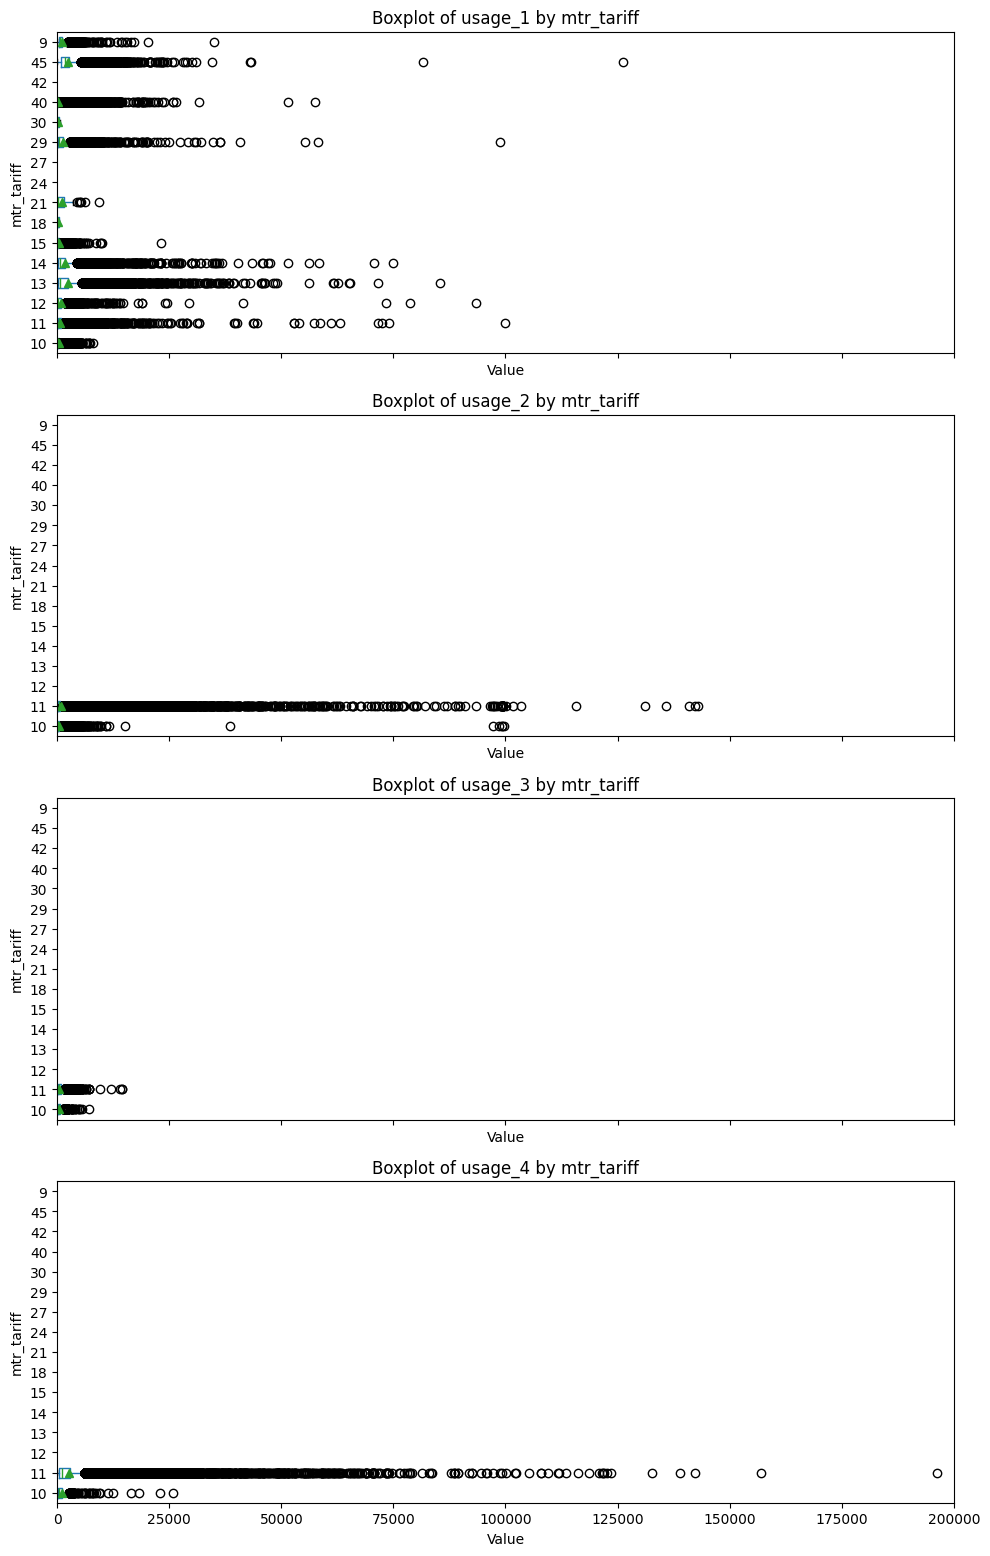

In [45]:
Plot_boxplot(df_train, ['usage_1', 'usage_2', 'usage_3', 'usage_4'], 'mtr_tariff')

(0.0, 50000.0)

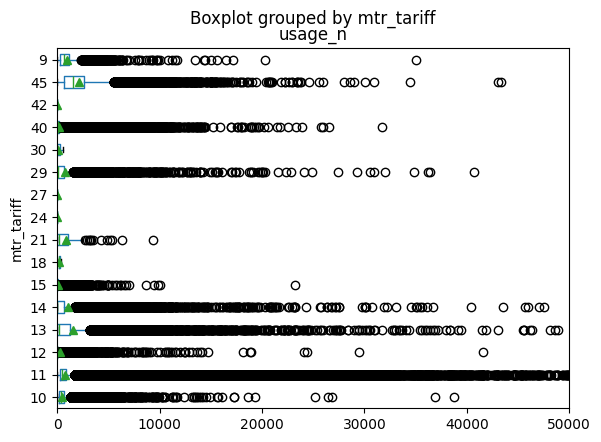

In [46]:
df_train.boxplot(column='usage_n', by='mtr_tariff', grid=False, showmeans=True, vert = False)
plt.xlim(0, 50000)

Only mtr_tariff == 10 | 11 uses usage_2 | usage_3 | usage_4.

<Axes: xlabel='mtr_tariff', ylabel='mtr_code'>

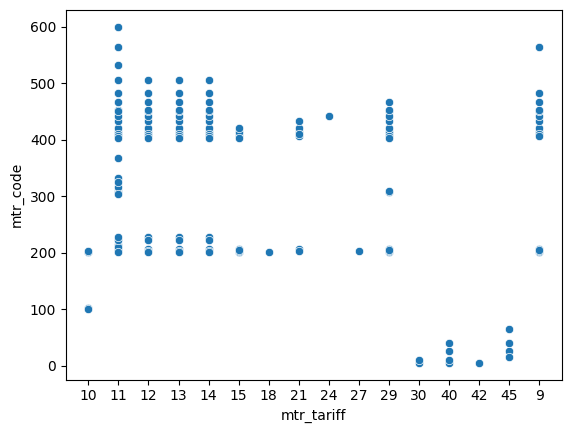

In [47]:
df_temp = df_train[['mtr_tariff', 'mtr_code']].value_counts().reset_index()
sns.scatterplot(x=df_temp['mtr_tariff'], y=df_temp['mtr_code'].astype(int))

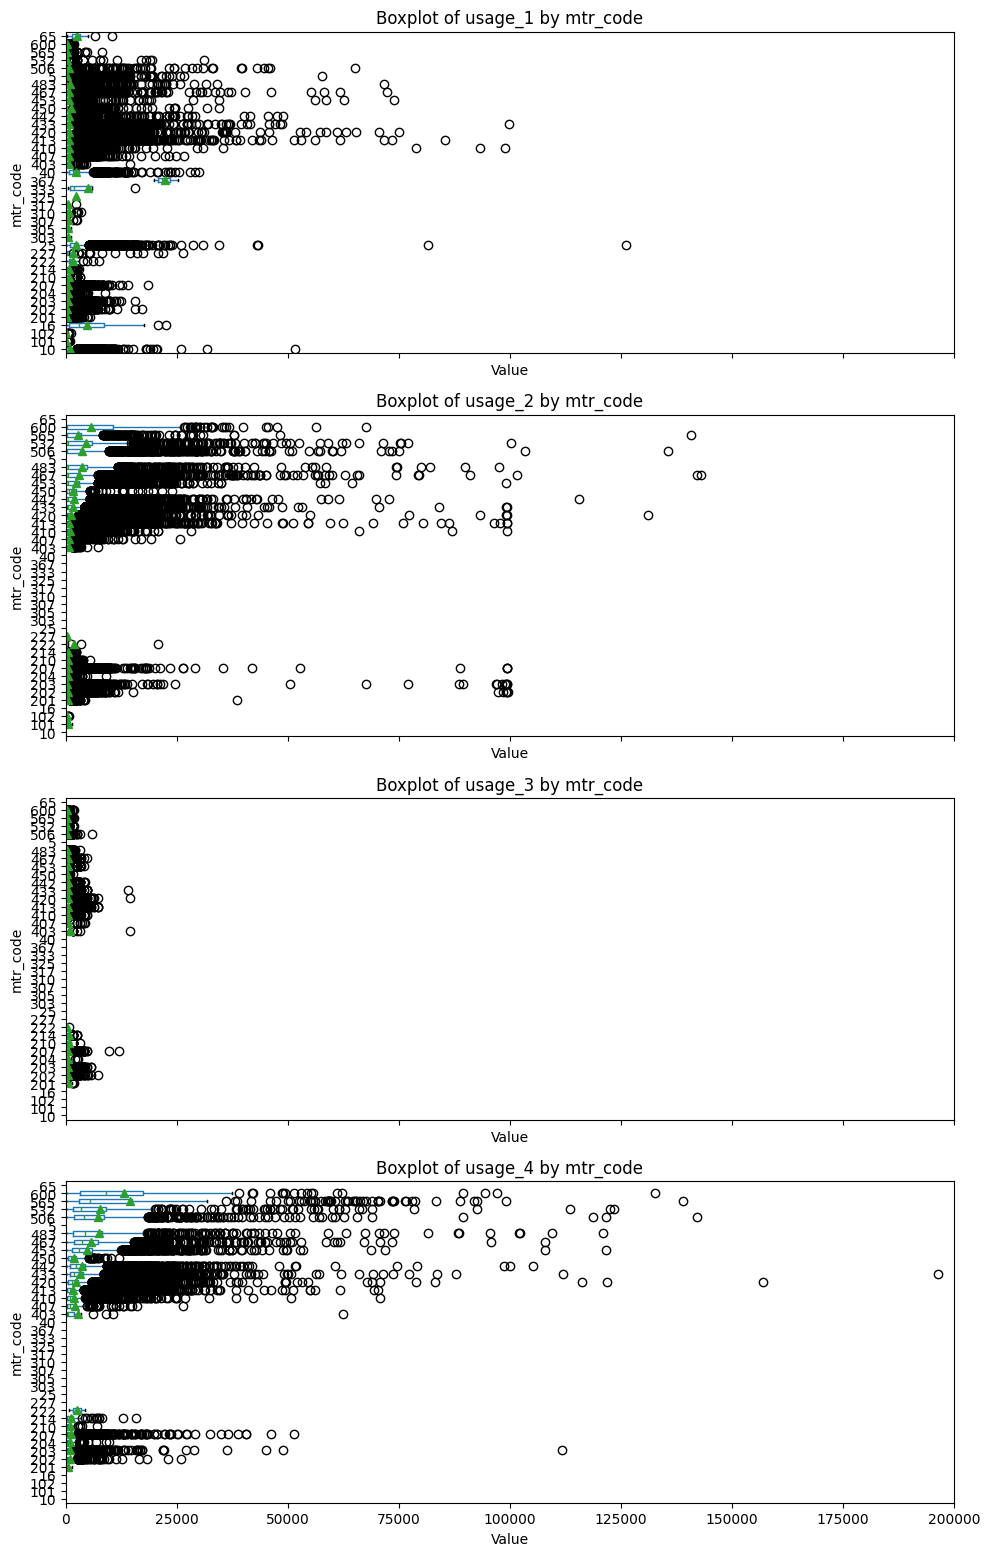

In [48]:
Plot_boxplot(df_train, ['usage_1', 'usage_2', 'usage_3', 'usage_4'], 'mtr_code')

(0.0, 50000.0)

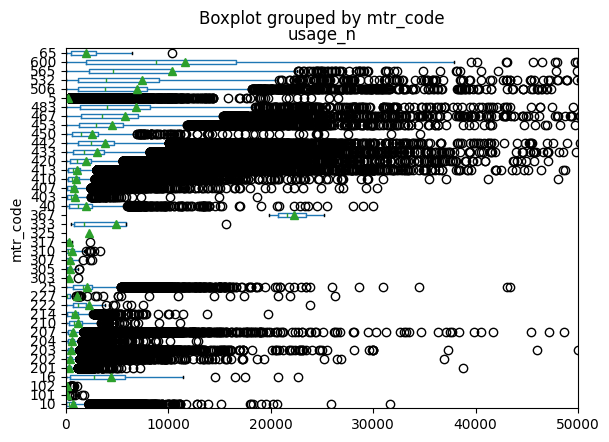

In [49]:
df_train.boxplot(column='usage_n', by='mtr_code', grid=False, showmeans=True, vert = False)
plt.xlim(0, 50000)

Seems to be a slight link between increased usage values and mtr_code. Although mtr_tariff == 10 | 11 allow for usage_2+, it seems as though mtr_code == 3XX does not. Not clear why it matters though...

<Axes: xlabel='mtr_status', ylabel='mtr_tariff'>

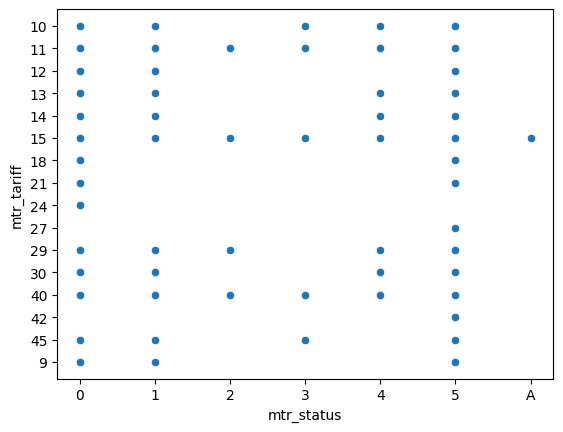

In [50]:
df_temp = df_train[['mtr_tariff', 'mtr_status']].value_counts().reset_index()
sns.scatterplot(x=df_temp['mtr_status'], y=df_temp['mtr_tariff'])

<Axes: xlabel='mtr_status', ylabel='mtr_code'>

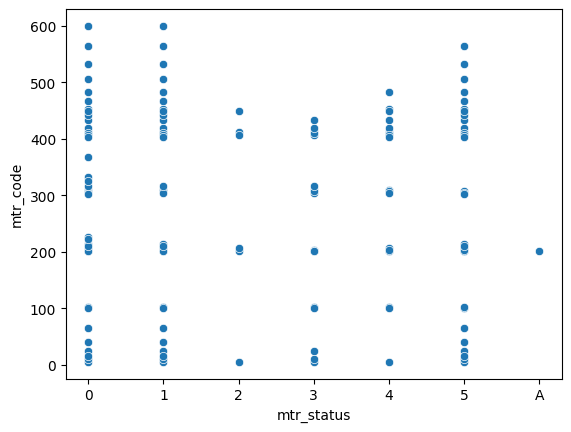

In [51]:
df_temp = df_train[['mtr_code', 'mtr_status']].value_counts().reset_index()
sns.scatterplot(x=df_temp['mtr_status'], y=df_temp['mtr_code'].astype(int))

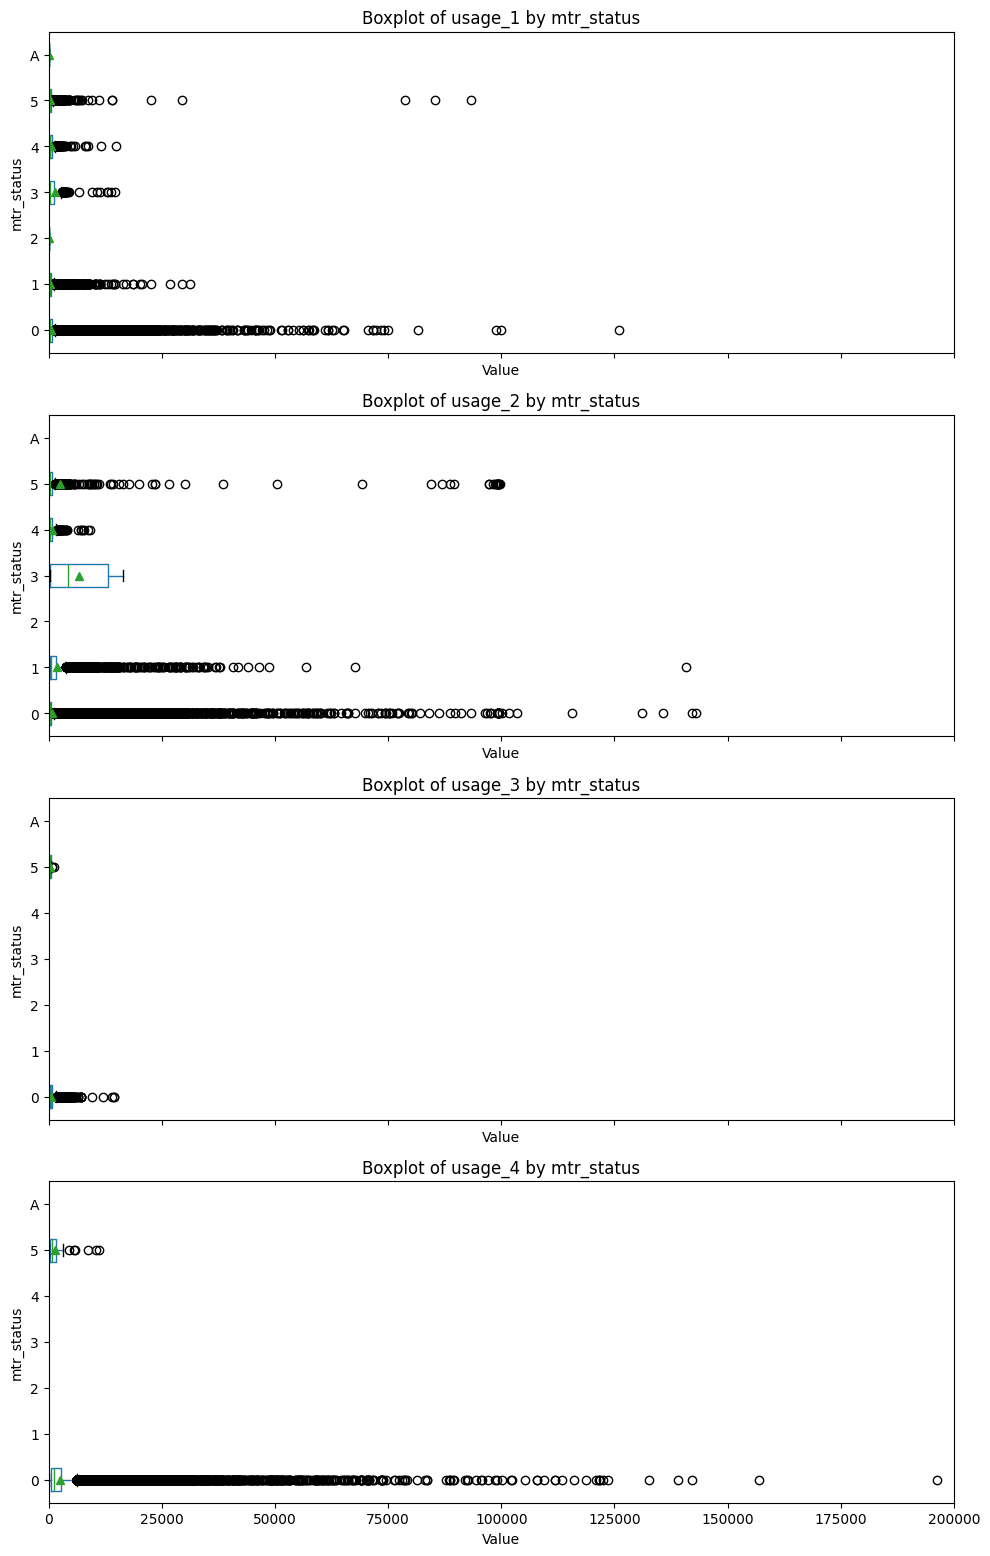

In [52]:
Plot_boxplot(df_train, ['usage_1', 'usage_2', 'usage_3', 'usage_4'], 'mtr_status')

(0.0, 50000.0)

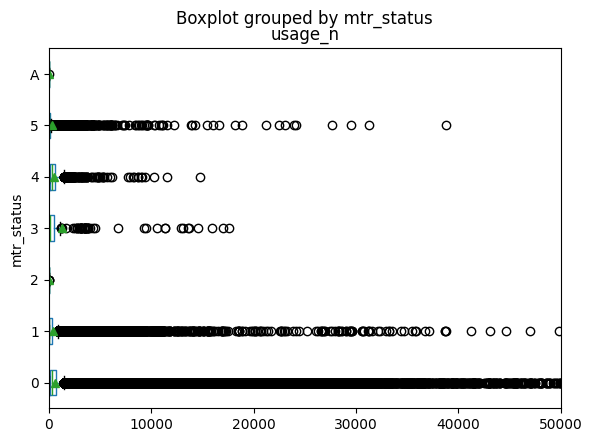

In [53]:
df_train.boxplot(column='usage_n', by='mtr_status', grid=False, showmeans=True, vert = False)
plt.xlim(0, 50000)

Seems like usage_3 | usage_4 only present with mtr_status = 0 | 5. Again, not clear why it matters though...

<Axes: xlabel='mtr_notes', ylabel='mtr_tariff'>

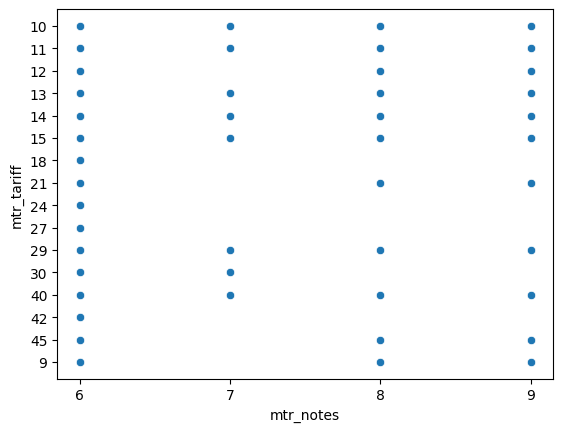

In [54]:
df_temp = df_train[['mtr_tariff', 'mtr_notes']].value_counts().reset_index()
sns.scatterplot(x=df_temp['mtr_notes'], y=df_temp['mtr_tariff'])

<Axes: xlabel='mtr_notes', ylabel='mtr_status'>

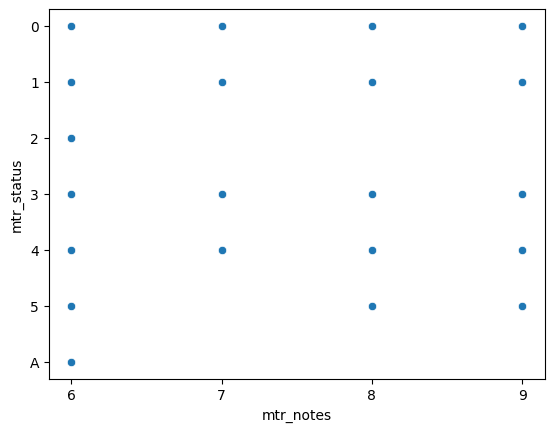

In [55]:
df_temp = df_train[['mtr_status', 'mtr_notes']].value_counts().reset_index()
sns.scatterplot(x=df_temp['mtr_notes'], y=df_temp['mtr_status'])

<Axes: xlabel='mtr_notes', ylabel='mtr_code'>

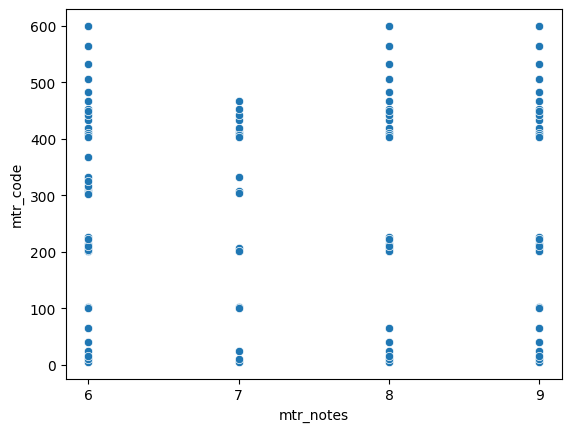

In [56]:
df_temp = df_train[['mtr_code', 'mtr_notes']].value_counts().reset_index()
sns.scatterplot(x=df_temp['mtr_notes'], y=df_temp['mtr_code'].astype(int))

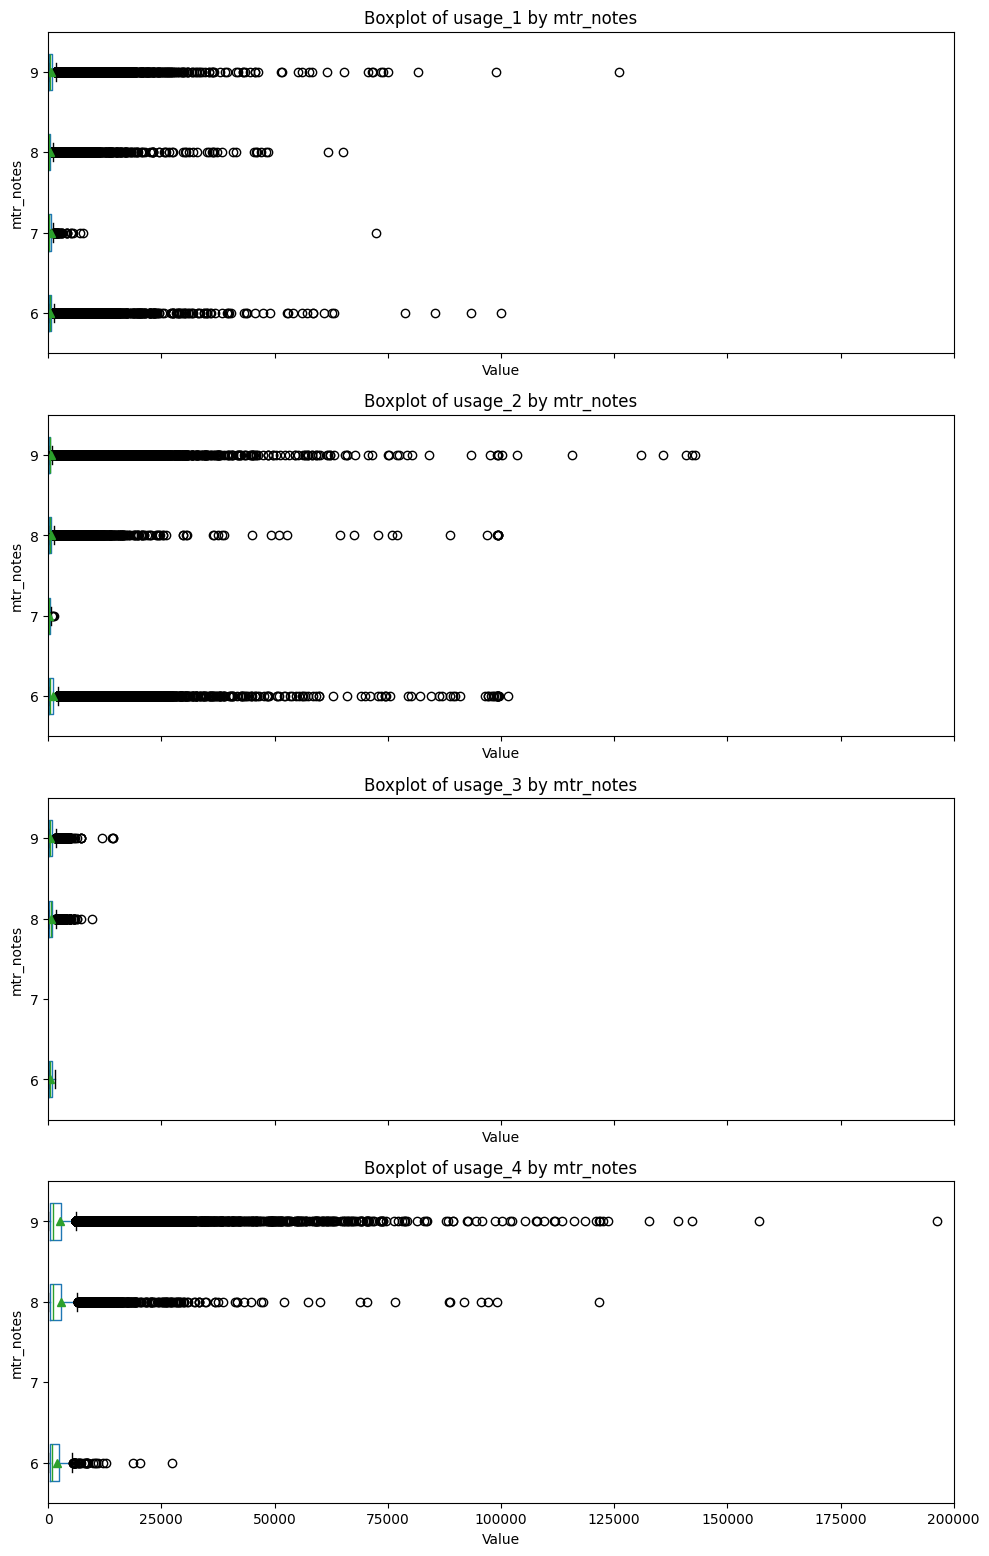

In [57]:
Plot_boxplot(df_train, ['usage_1', 'usage_2', 'usage_3', 'usage_4'], 'mtr_notes')

(0.0, 50000.0)

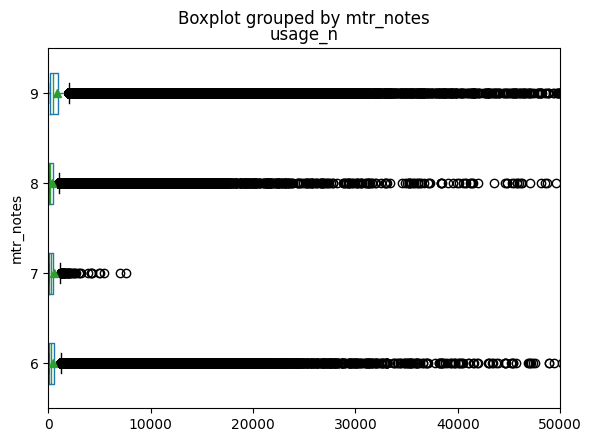

In [58]:
df_train.boxplot(column='usage_n', by='mtr_notes', grid=False, showmeans=True, vert = False)
plt.xlim(0, 50000)

Seems as though mtr_code == 3XX does not have mtr_notes 8 | 9. Not clear why it matters though...

The target variable is based on a client, and not an individual row. Must be careful looking at these kind of plots: there is variability to be expected, and some columns will have very few counts.

In [59]:
def Plot_barplot(df, col_name):
    df = (
        df.groupby([col_name, 'fraud'], observed=False)
        .agg({'client_id': 'nunique'})
        .reset_index()
        .pivot(index=col_name, columns='fraud', values='client_id')
        .fillna(0)
        .reset_index()
    )
    df.columns = [col_name, 0, 1]  # Ensure columns are named appropriately

    # Convert index to string (if necessary for display)
    df[col_name] = df[col_name].astype(str)

    # Create plot
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=False)

    # Calculate percentages
    fraud_1_percent = 100 * df[1] / (df[0] + df[1])
    fraud_0_percent = 100 * df[0] / (df[0] + df[1])

    # Create stacked bar plot
    axes[0].bar(df[col_name], fraud_1_percent, label='Fraud = 1', color="red")
    axes[0].bar(df[col_name], fraud_0_percent, bottom=fraud_1_percent, label='Fraud = 0', color="lightgreen")
    axes[1].bar(df[col_name], df[1], label='Fraud = 1', color="red")
    axes[1].bar(df[col_name], df[0], bottom=df[1], label='Fraud = 0', color="lightgreen")

    # Annotate with raw counts
    for i, (_col_name, fraud_0, fraud_1) in enumerate(zip(df[col_name], df[0], df[1])):
        if int(fraud_1) > 0:
            axes[0].text(i, fraud_1_percent.iloc[i] / 2, f"{int(fraud_1)}", ha='center', va='center', color='black', fontsize=10)  # Fraud = 1
            axes[1].text(i, fraud_1_percent.iloc[i] / 2, f"{int(fraud_1)}", ha='center', va='center', color='black', fontsize=10)  # Fraud = 1
        if int(fraud_0) > 0:
            axes[0].text(i, fraud_1_percent.iloc[i] + fraud_0_percent.iloc[i] / 2, f"{int(fraud_0)}", ha='center', va='center', color='black', fontsize=10)  # Fraud = 0
            axes[1].text(i, fraud_1_percent.iloc[i] / 2, f"{int(fraud_1)}", ha='center', va='center', color='black', fontsize=10)  # Fraud = 1

    # Finalize plot
    axes[0].set_title(f"{col_name} vs Fraud Distribution")
    axes[0].set_xlabel(col_name)
    axes[0].set_ylabel("Percentage")
    axes[0].legend(loc='upper right')
    axes[0].set_ylim(0, 100)  # Increase ylim to accommodate total annotations
    axes[0].tick_params(axis='x', rotation=45)
    axes[1].set_title(f"{col_name} vs by Fraud Counts")
    axes[1].set_xlabel(col_name)
    axes[1].set_ylabel("Count")
    axes[1].legend(loc='upper right')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

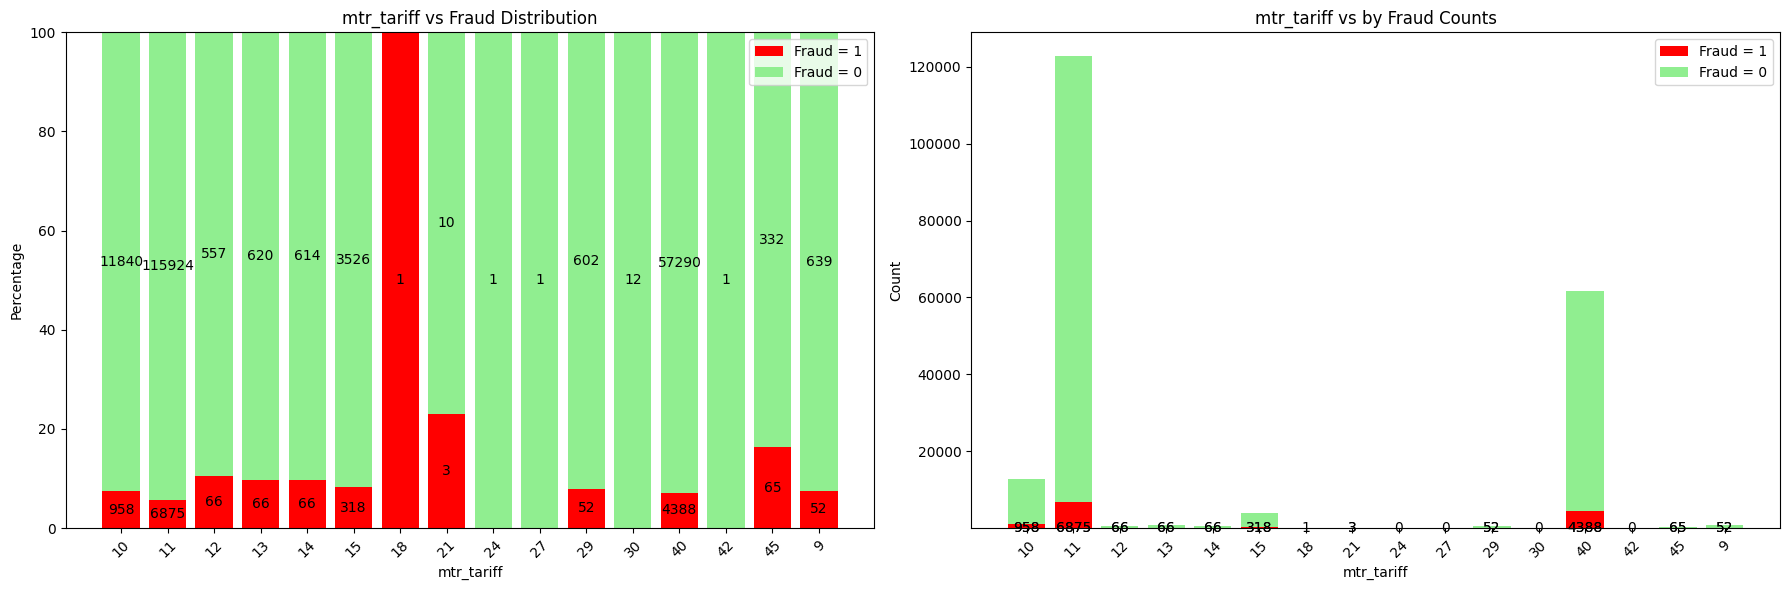

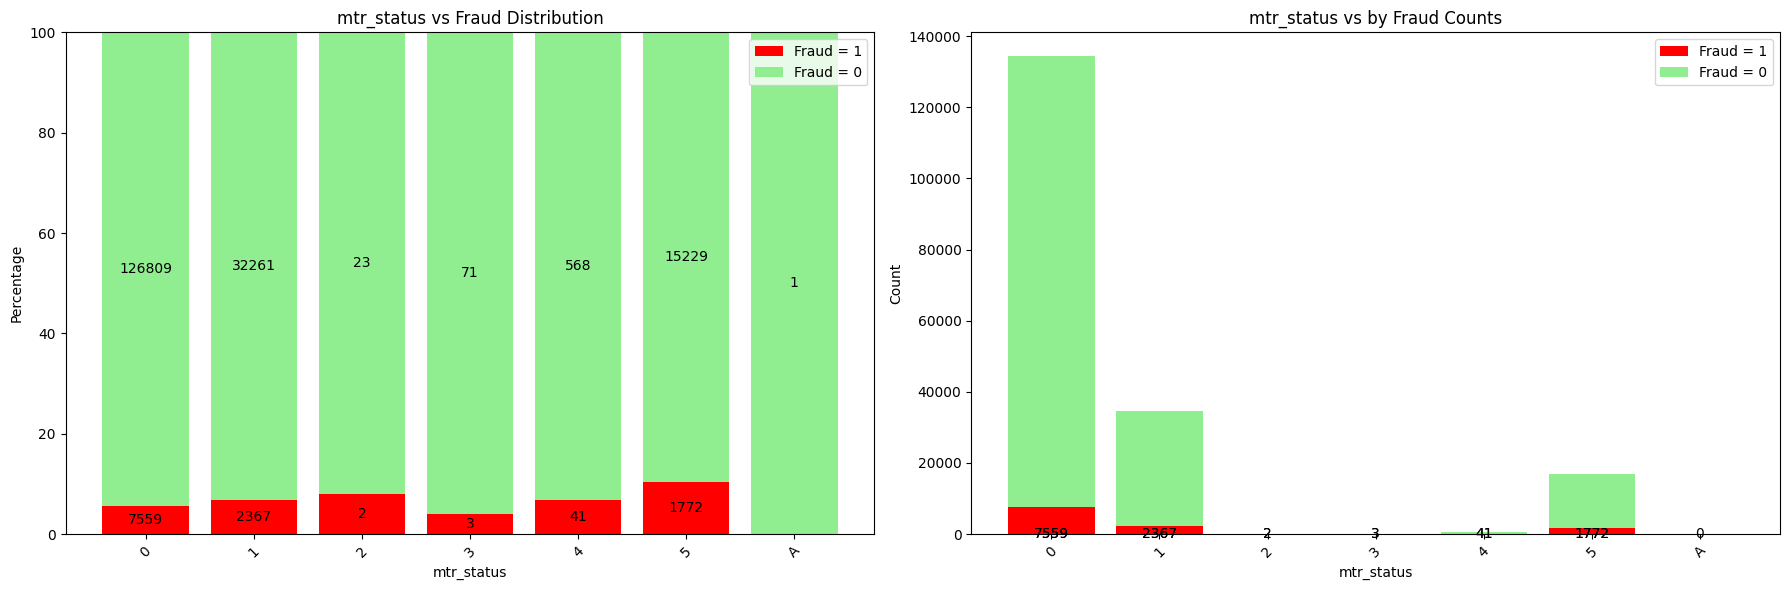

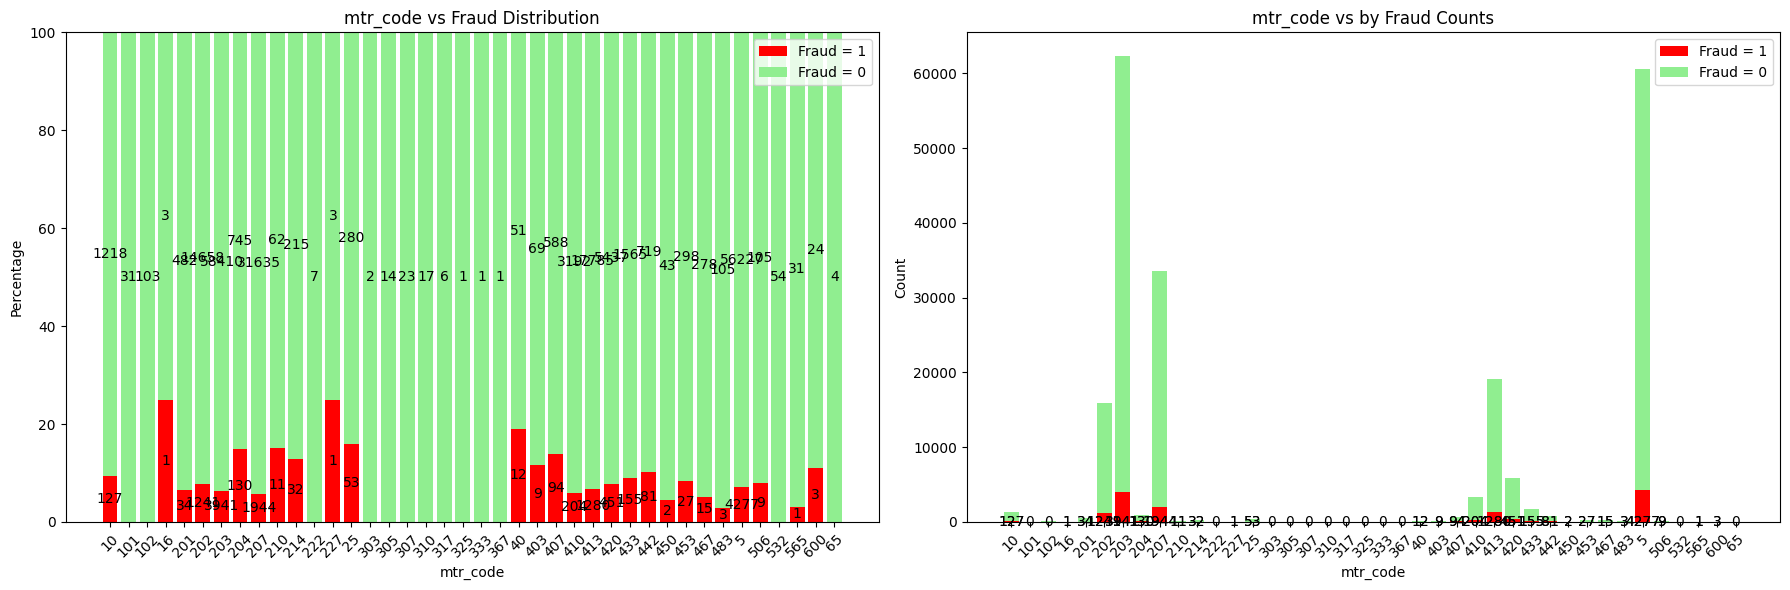

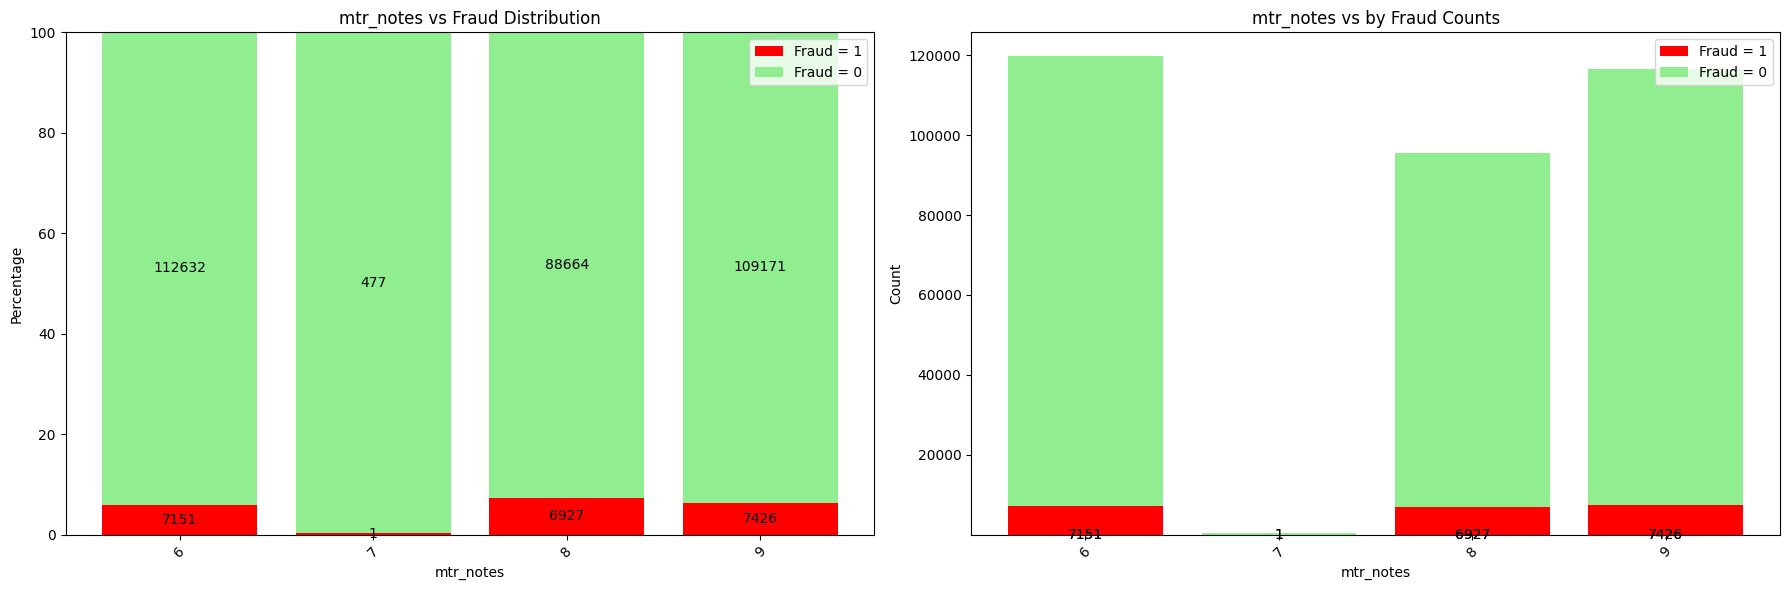

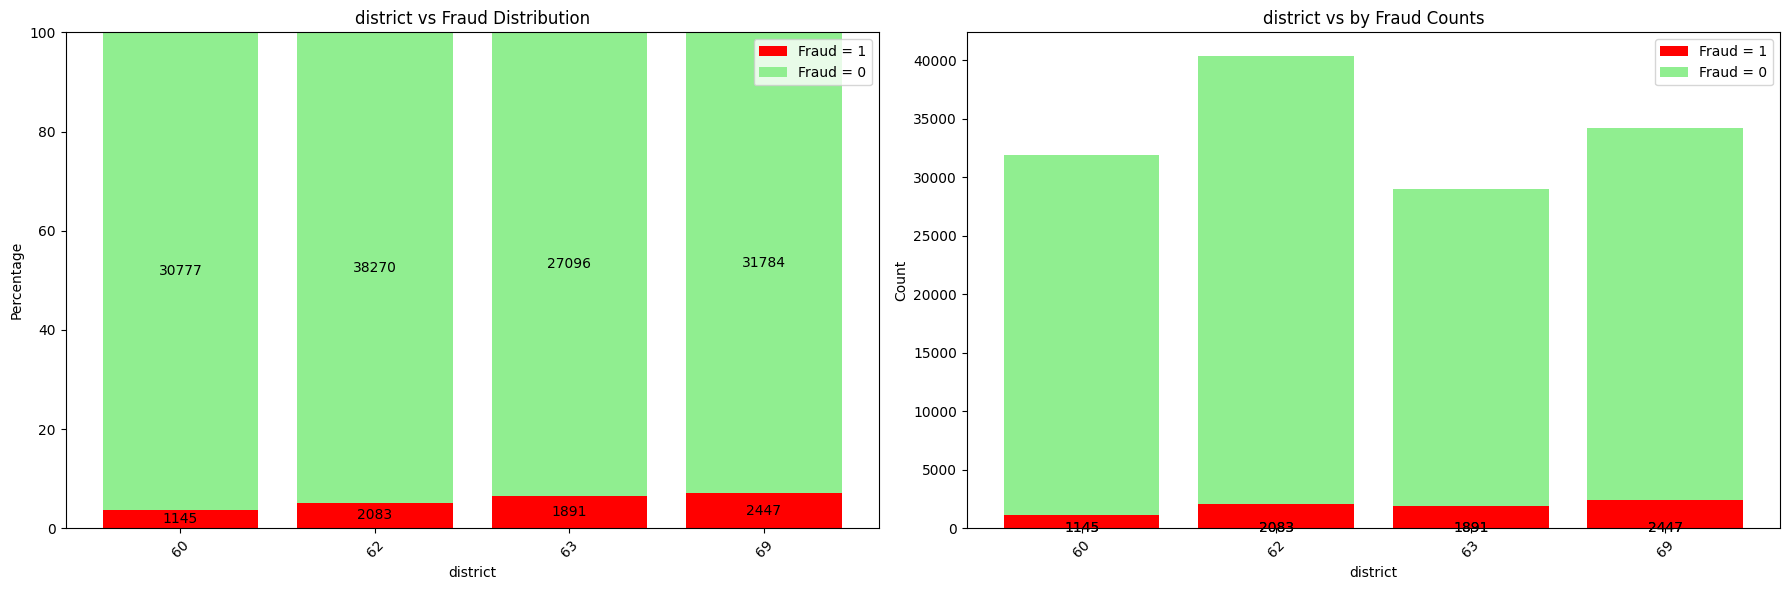

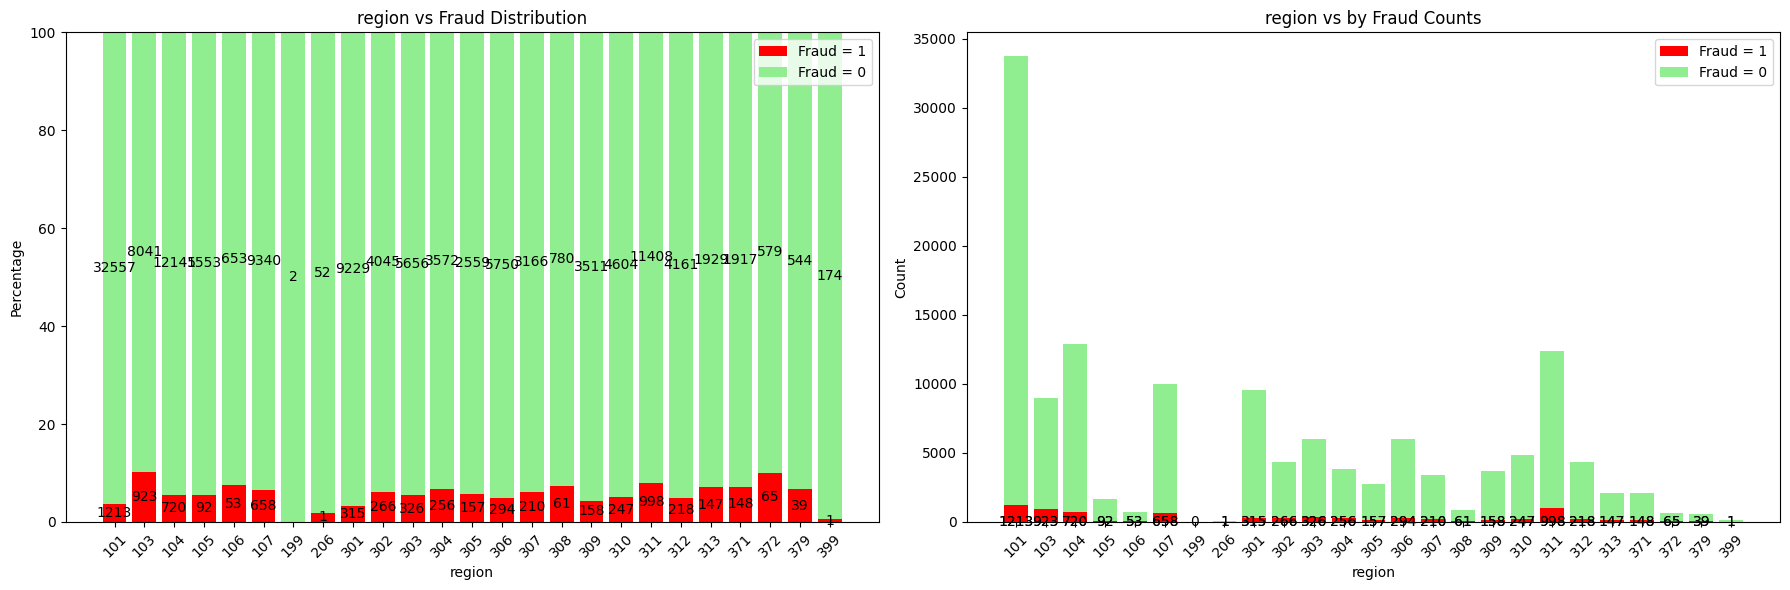

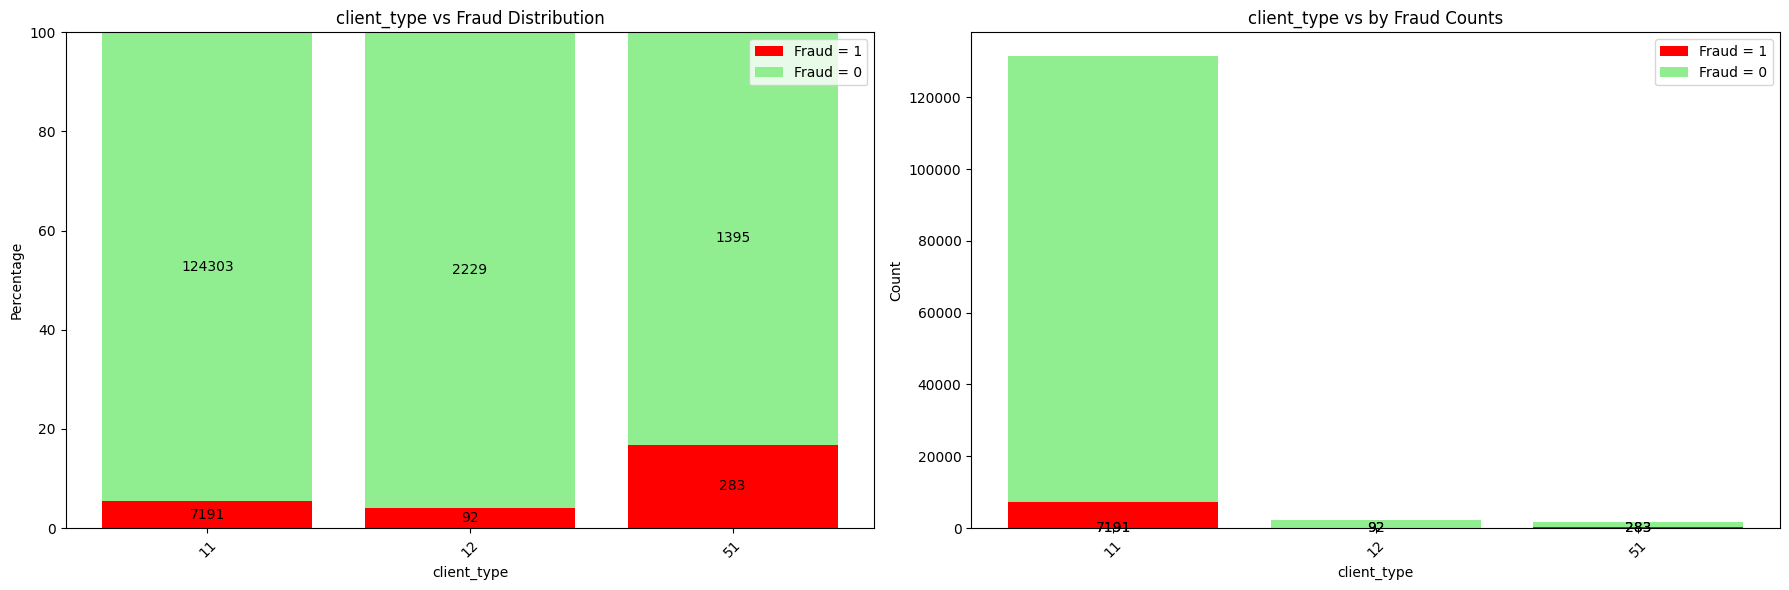

In [60]:
col_names = ['mtr_tariff', 'mtr_status', 'mtr_code', 'mtr_notes', 'district', 'region', 'client_type']
for col_name in col_names:
    Plot_barplot(df_train, col_name)

In [61]:
df_train.groupby(['fraud', 'mtr_type', 'client_id'], observed=True)['usage_n'].median().groupby(['mtr_type', 'fraud'], observed=False).median().reset_index()

mtr_type  fraud  usage_n
0     ELEC  False    424.5
1     ELEC   True    481.5
2      GAZ  False     83.0
3      GAZ   True     98.0

In [62]:
df_train.groupby(['fraud', 'mtr_type', 'client_id'], observed=True)['usage_n'].median().groupby(['mtr_type', 'fraud'], observed=False).mean().reset_index()

mtr_type  fraud     usage_n
0     ELEC  False  632.788291
1     ELEC   True  732.416071
2      GAZ  False  138.493864
3      GAZ   True  169.073308

In [63]:
df_train['invoice_quarter'] = df_train['invoice_date'].dt.to_period('Q')

C:\Users\mhoss\AppData\Local\Temp\ipykernel_13628\2818118423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['invoice_quarter'] = df_train['invoice_date'].dt.to_period('Q')


In [64]:
df_temp = df_train.groupby(['fraud', 'mtr_type', 'client_id'], observed=True).agg({'start_date' : 'first', 'invoice_date' : 'max'}).reset_index()
df_temp['date_diff'] = df_temp['invoice_date'] - df_temp['start_date']
df_temp.groupby(['mtr_type', 'fraud'], observed=False)['date_diff'].agg('median').reset_index()

mtr_type  fraud          date_diff
0     ELEC  False 4000 days 00:00:00
1     ELEC   True 6232 days 12:00:00
2      GAZ  False 4770 days 00:00:00
3      GAZ   True 6146 days 00:00:00

In [65]:
df_train.groupby(['mtr_type', 'fraud'], observed=False)['invoice_quarter'].agg(['min', 'max'])

min     max
mtr_type fraud                
ELEC     False  1977Q2  2019Q3
         True   2005Q2  2019Q3
GAZ      False  1981Q1  2019Q3
         True   2005Q2  2019Q3

In [66]:
df_train.groupby(['mtr_type', 'fraud'], observed=False)['start_date'].agg(['min', 'max'])

min        max
mtr_type fraud                      
ELEC     False 1977-02-05 2019-09-10
         True  1977-02-05 2019-05-30
GAZ      False 1977-02-05 2019-08-06
         True  1977-02-17 2019-03-26

In [67]:
df_temp['client_id'] = df_temp['client_id'].str.replace('train_Client_', '').astype(int)
df_temp.groupby(['mtr_type', 'fraud'], observed=False)['client_id'].agg(['min', 'max'])

min     max
mtr_type fraud             
ELEC     False    0  135492
         True     8  135448
GAZ      False    2  135492
         True    13  135448

Ideally, you want the fraud and non-fraud to look similar on these features. Although the 'start_date' and 'client_id' columns comply, the 'invoice_quarter' has no instances of fraud prior to 2005.
Although it is bad practice, I here looked at the test data to see the date range given, and it includes 'invoice_date' prior to 2005 (although I did not look at the target variables). 
This is another rather big issue:
* This is very unlikely to be true; fraud was more likely undetected
* This would likely cause ML algorithm to use this date as a cutoff for labelling; hard to blame it...

In this case, it was decided to remove rows where 'invoice_quarter' is before 2005.


In [68]:
print(f'Number of rows before truncation: {len(df_train)}.')
df_removed = pd.concat([df_removed, df_train[df_train['invoice_quarter'] < '2005Q2']], sort=False)
df_train = df_train[df_train['invoice_quarter'] >= '2005Q2']
print(f'Number of rows after truncation: {len(df_train)}.')

Number of rows before truncation: 4476703.
Number of rows after truncation: 4453964.


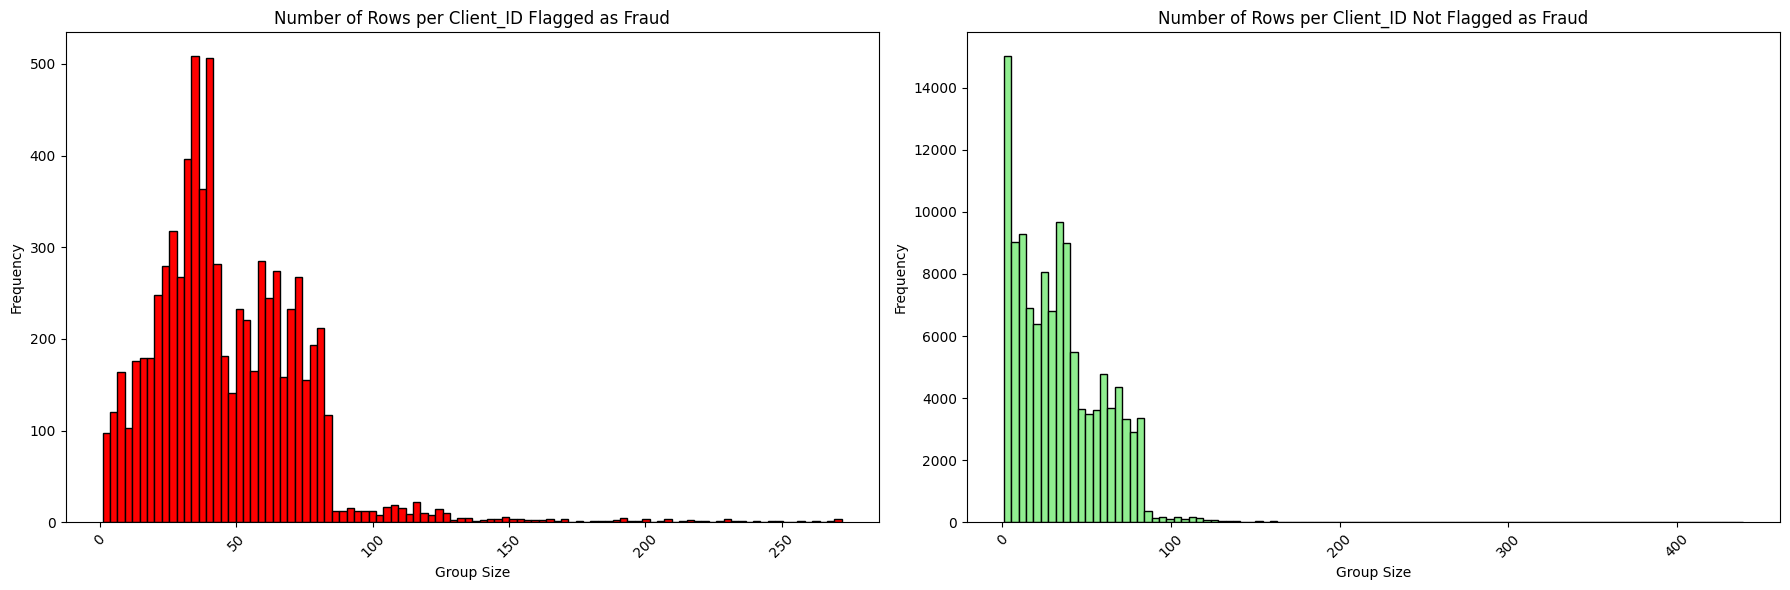

In [69]:
col_names = ['client_id']
mask = df_train[df_train['fraud'] == 1][col_names].value_counts().reset_index(name='group_size')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=False)

axes[0].hist(mask['group_size'], bins=100, color='red', edgecolor='black')
mask = df_train[df_train['fraud'] == 0][col_names].value_counts().reset_index(name='group_size')
axes[1].hist(mask['group_size'], bins=100, color='lightgreen', edgecolor='black')

axes[0].set_title("Number of Rows per Client_ID Flagged as Fraud")
axes[0].set_xlabel("Group Size")
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis='x', rotation=45)
axes[1].set_title("Number of Rows per Client_ID Not Flagged as Fraud")
axes[1].set_xlabel("Group Size")
axes[1].set_ylabel("Frequency")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The quality of labelling+data is also questionable. It is not clear how one row alone can be enough to flag, for example.

In [70]:
col_names = ['client_id']
mask = df_train[col_names].value_counts().reset_index(name='group_size')
mask = mask[mask['group_size'] == 1]
df_temp = df_train[df_train['client_id'].isin(mask['client_id'])]
df_temp

client_id invoice_date mtr_tariff          mtr_id  \
854      train_Client_100018   2019-03-05         11   2178700025696   
1356     train_Client_100030   2011-03-30         11           66409   
1402     train_Client_100033   2019-08-14         11   2178701205700   
2423      train_Client_10007   2019-01-18         11   2185700044018   
3484     train_Client_100097   2015-02-11         11          623046   
...                      ...          ...        ...             ...   
4467118   train_Client_99747   2019-08-15         11   2155731749000   
4467119   train_Client_99748   2019-08-27         40           37753   
4468758   train_Client_99792   2009-05-05         40         6895781   
4472516   train_Client_99884   2019-01-31         11  27181146875900   
4475802   train_Client_99972   2009-11-10         40         6976205   

        mtr_status mtr_code mtr_notes  mtr_coef  usage_1  usage_2  ...  fraud  \
854              0      413         8       1.0      600      300  ...  False   
1356             1      413         6       1.0      600      410  ...  False   
1402             0      413         9       1.0     1600      800  ...  False   
2423             0      207         8       1.0      402        0  ...  False   
3484             0      420         9       1.0      116        0  ...  False   
...            ...      ...       ...       ...      ...      ...  ...    ...   
4467118          0      207         6       1.0        0        0  ...  False   
4467119          0        5         9       1.0        5        0  ...  False   
4468758          1        5         6       1.0      245        0  ...  False   
4472516          0      203         9       1.0      689        0  ...  False   
4475802          1        5         6       1.0        0        0  ...  False   

         adj_flag  usage_n  mtr_val_new_calc  temp_flag mtr_val_nxt err_flag  \
854          True   1225.0            6090.0        0.0         NaN    False   
1356        False   1010.0           50245.0        0.0         NaN    False   
1402        False   5820.0            5820.0        0.0         NaN    False   
2423        False    402.0             765.0        0.0         NaN    False   
3484         True    116.0             116.0        0.0         NaN    False   
...           ...      ...               ...        ...         ...      ...   
4467118     False      0.0            4296.0        0.0         NaN    False   
4467119     False      5.0             296.0        0.0         NaN    False   
4468758      True    245.0             245.0        0.0         NaN    False   
4472516     False    689.0             689.0        0.0         NaN    False   
4475802      True      0.0               0.0        0.0         NaN    False   

        invoice_date_prv months_num_calc invoice_quarter  
854                  NaT             NaN          2019Q1  
1356                 NaT             NaN          2011Q1  
1402                 NaT             NaN          2019Q3  
2423                 NaT             NaN          2019Q1  
3484                 NaT             NaN          2015Q1  
...                  ...             ...             ...  
4467118              NaT             NaN          2019Q3  
4467119              NaT             NaN          2019Q3  
4468758              NaT             NaN          2009Q2  
4472516              NaT             NaN          2019Q1  
4475802              NaT             NaN          2009Q4  

[3183 rows x 30 columns]

For brevity, uninteresting plots are not shown below

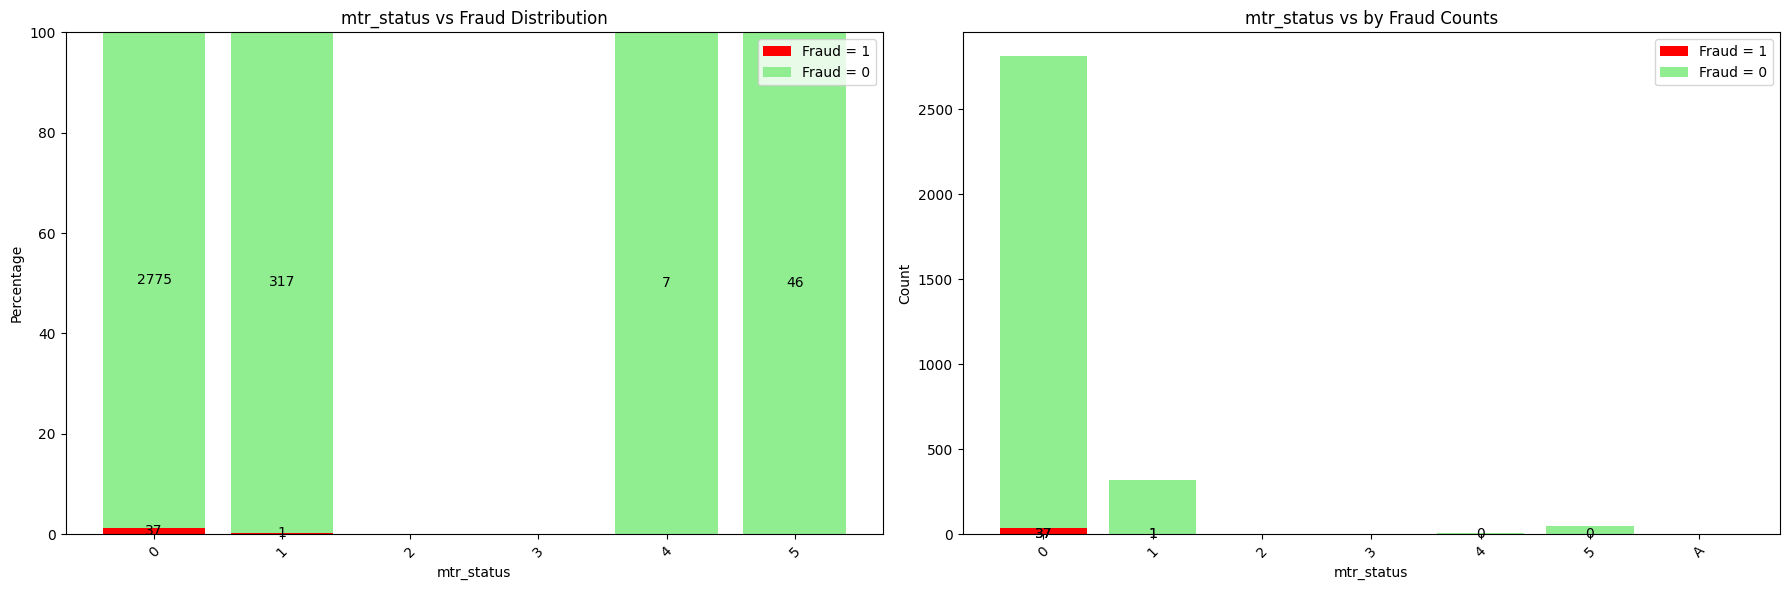

In [71]:
col_names = ['mtr_status']  # ['mtr_tariff', 'mtr_status', 'mtr_code', 'mtr_notes', 'district', 'region', 'client_type']
for col_name in col_names:
    Plot_barplot(df_temp, col_name)

In [72]:
df_temp.groupby(['fraud', 'mtr_type', 'client_id'], observed=True)['usage_n'].median().groupby(['mtr_type', 'fraud'], observed=False).median().reset_index()

mtr_type  fraud  usage_n
0     ELEC  False    137.0
1     ELEC   True    388.5
2      GAZ  False      0.0
3      GAZ   True      NaN

In [73]:
df_temp.groupby(['fraud', 'mtr_type', 'client_id'], observed=True)['usage_n'].median().groupby(['mtr_type', 'fraud'], observed=False).mean().reset_index()

mtr_type  fraud      usage_n
0     ELEC  False  1006.117028
1     ELEC   True  2156.263158
2      GAZ  False   153.736041
3      GAZ   True          NaN

It would seem that the usage is much higher and is likely th key indicator. Going to consider a few more rows to increase overall sample size (hopefully, without diluting signal too much).

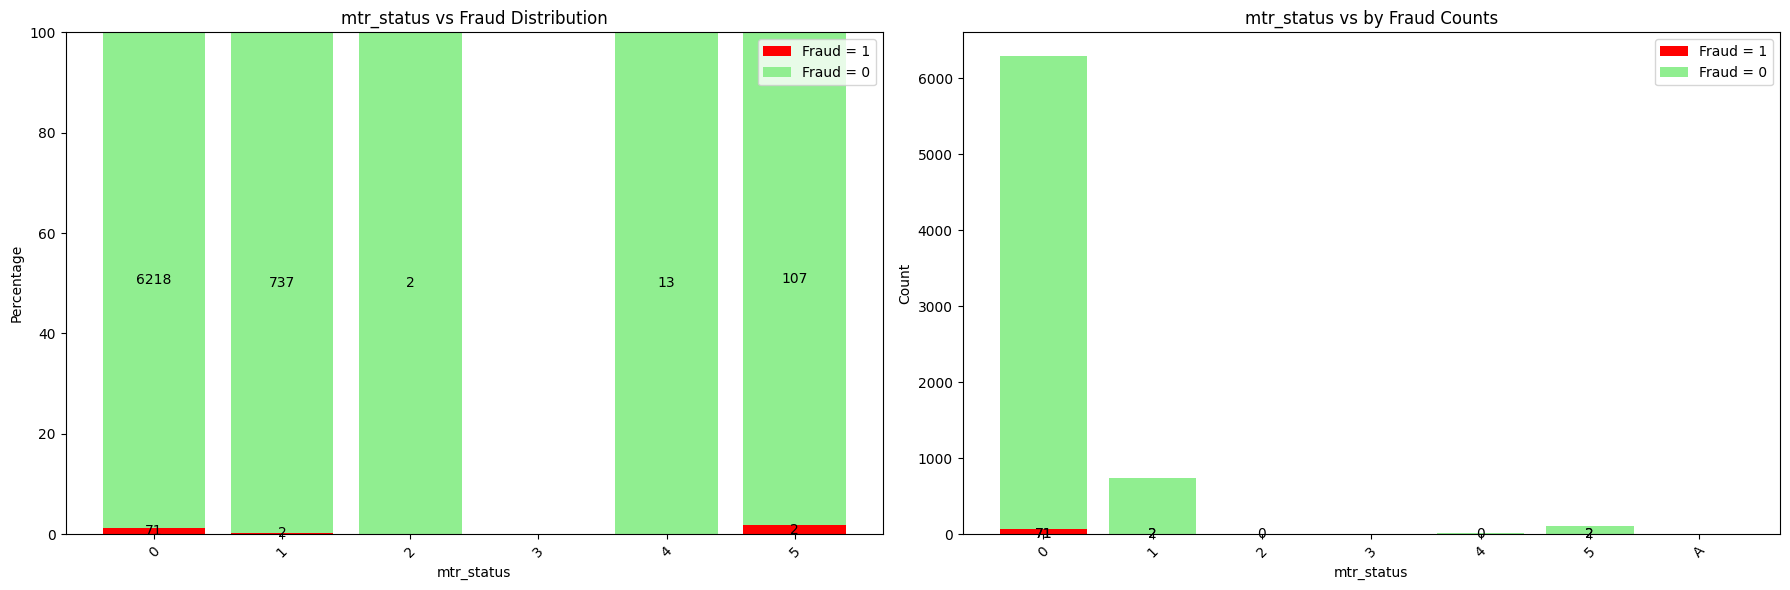

In [74]:
col_names = ['client_id']
mask = df_train[col_names].value_counts().reset_index(name='group_size')
mask = mask[mask['group_size'] < 3]
df_temp = df_train[df_train['client_id'].isin(mask['client_id'])]

col_names = ['mtr_status']  # ['mtr_tariff', 'mtr_status', 'mtr_code', 'mtr_notes', 'district', 'region', 'client_type']
for col_name in col_names:
    Plot_barplot(df_temp, col_name)

In [75]:
df_temp.groupby(['fraud', 'mtr_type', 'client_id'], observed=True)['usage_n'].median().groupby(['mtr_type', 'fraud'], observed=False).median().reset_index()

mtr_type  fraud  usage_n
0     ELEC  False    200.0
1     ELEC   True    442.0
2      GAZ  False      0.0
3      GAZ   True      0.0

In [76]:
df_temp.groupby(['fraud', 'mtr_type', 'client_id'], observed=True)['usage_n'].median().groupby(['mtr_type', 'fraud'], observed=False).mean().reset_index()

mtr_type  fraud      usage_n
0     ELEC  False   923.586141
1     ELEC   True  1833.659722
2      GAZ  False   189.728502
3      GAZ   True   426.500000

Only 'mtr_status' == 0, and the 'usage_n' seem significant. However, as shown below, 'mtr_status' quickly dissipates once number of rows is increased (here to < 10)

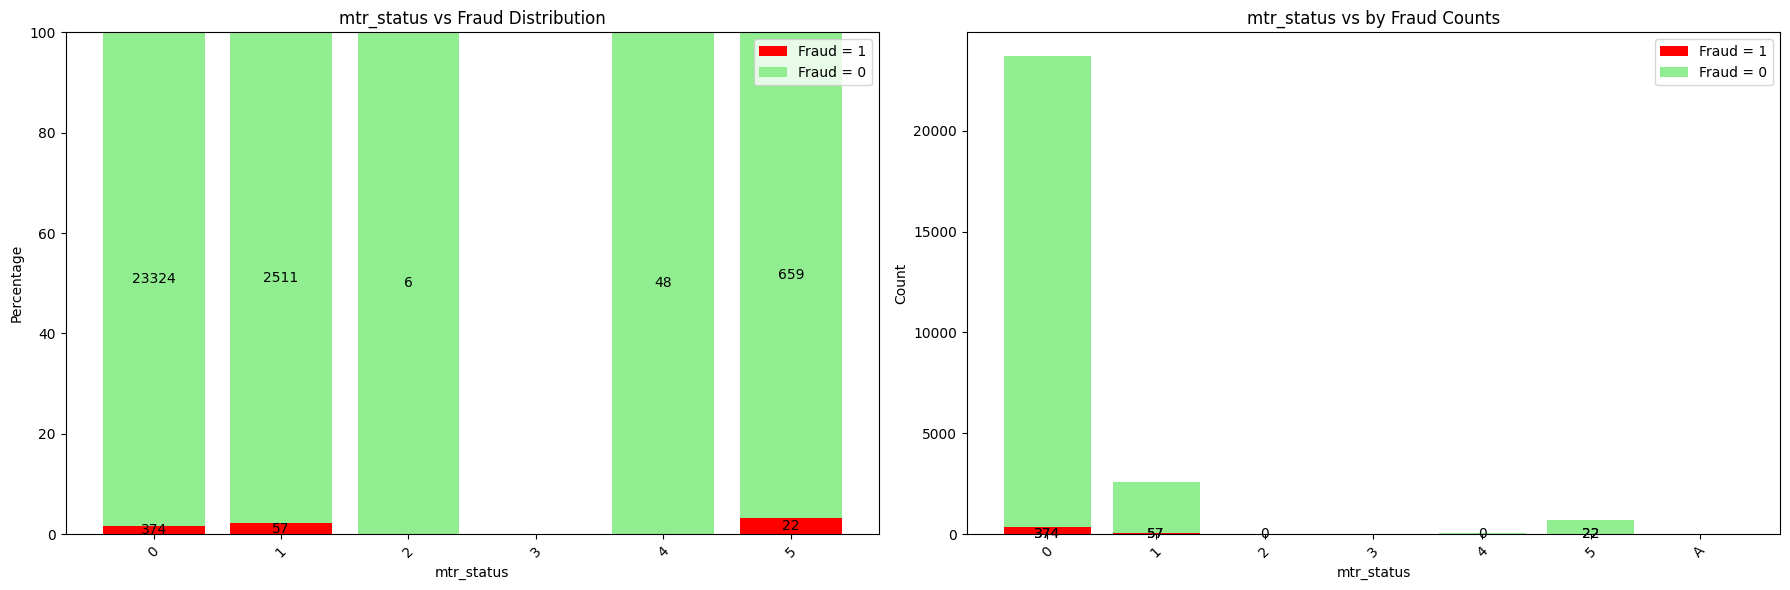

In [77]:
col_names = ['client_id']
mask = df_train[col_names].value_counts().reset_index(name='group_size')
mask = mask[mask['group_size'] < 10]
df_temp = df_train[df_train['client_id'].isin(mask['client_id'])]

col_names = ['mtr_status']  # ['mtr_tariff', 'mtr_status', 'mtr_code', 'mtr_notes', 'district', 'region', 'client_type']
for col_name in col_names:
    Plot_barplot(df_temp, col_name)

In [78]:
df_temp.groupby(['fraud', 'mtr_type', 'client_id'], observed=True)['usage_n'].median().groupby(['mtr_type', 'fraud'], observed=False).median().reset_index()

mtr_type  fraud  usage_n
0     ELEC  False   283.75
1     ELEC   True   501.00
2      GAZ  False    21.00
3      GAZ   True    95.00

In [79]:
df_temp.groupby(['fraud', 'mtr_type', 'client_id'], observed=True)['usage_n'].median().groupby(['mtr_type', 'fraud'], observed=False).mean().reset_index()

mtr_type  fraud      usage_n
0     ELEC  False   690.315468
1     ELEC   True  1336.456233
2      GAZ  False   183.491465
3      GAZ   True   323.139241

Quite tricky to view things in a meaningful way. Although a client_id is flagged, there may be multiple mtr_id present. It would not necessarily be clear which and when that activity triggering the flagging occurs. It could easily be that even for a flagged client_id, the majority of the data is indicative of non-fraudulent activity (either on different meters, or during different periods).

Some time-series data will be explored, but it should be noted that what is being shown is the usage recorded for a given invoice-date. The period an invoice covers varies, and this can cause issues with the results seen. For example, if fraudulent users are more likely to be invoiced less frequently, they'll tend towards having greater spikes in this plot. One issue on this topic is that the "months_num" is quite unreliable. Otherwise, it could be used to better distribute the usage across the indicated period, prior being aggregated for analysis. Unfortunately, this is left here for "future work".

In [80]:
df_train['invoice_quarter'] = pd.PeriodIndex(df_train['invoice_quarter'], freq='Q').to_timestamp()

Text(0.5, 1.0, '20th-80th Percentile Bounds. Median & Mean as faint & bold lines, respectively.')

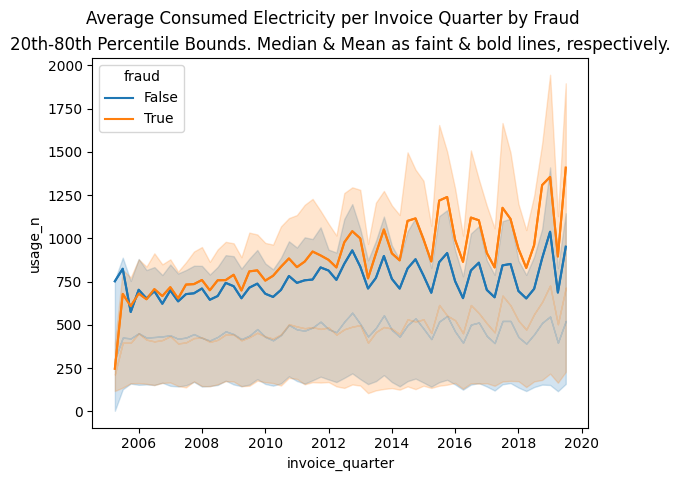

In [81]:
sns.lineplot(data=df_train[df_train['mtr_type'] == 'ELEC'], x='invoice_quarter', y='usage_n', hue='fraud', errorbar=("pi", 60))
sns.lineplot(data=df_train[df_train['mtr_type'] == 'ELEC'], x='invoice_quarter', y='usage_n', hue='fraud', errorbar=("pi", 0), legend=None)
plt.suptitle("Average Consumed Electricity per Invoice Quarter by Fraud")
plt.title("20th-80th Percentile Bounds. Median & Mean as faint & bold lines, respectively.")

Text(0.5, 1.0, '20th-80th Percentile Bounds. Median & Mean as faint & bold lines, respectively.')

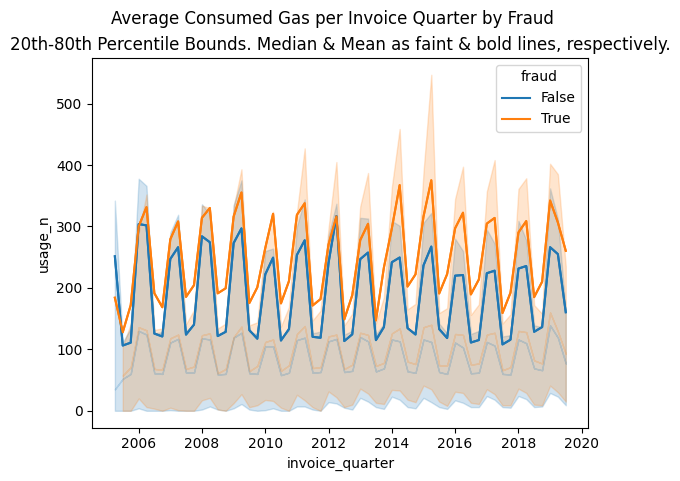

In [82]:
sns.lineplot(data=df_train[df_train['mtr_type'] == 'GAZ'], x='invoice_quarter', y='usage_n', hue='fraud', errorbar=("pi", 60))
sns.lineplot(data=df_train[df_train['mtr_type'] == 'GAZ'], x='invoice_quarter', y='usage_n', hue='fraud', errorbar=("pi", 0), legend=None)
plt.suptitle("Average Consumed Gas per Invoice Quarter by Fraud")
plt.title("20th-80th Percentile Bounds. Median & Mean as faint & bold lines, respectively.")

This is showing 20th - 80th percentile as shaded region, and the mean as the bold line. The median is shown as a fainter line. It should be clear that there is a very large skew in the data given how close the mean values are to the 80th percentile. Also, gas usage has stayed quite steady for both fraud and non-fraud. For electricity, it seems the usage for fraudulent users seem to be rising whereas for non-fraud it seems more steady. Although, for both, it seems the variability is increasing over time.

Here the mean is compared to the Q1 | Q2 | Q3. It shows that the median values are quite similar between fraud and not, but the mean (and Q3) are quite different. It seems, in general, the usage of fraudulent users is higher than non-fraudulent users. In some ways, this is surprising. If they are 'stealing' energy, then I'd have thought the apparent usage would be lower (as they are sourcing it elsewhere). It should again be noted that fraudulent users are flagged for their entire duration. It may be that at any given time, most are not committing fraud, and so, diluting the signal.

In [83]:
df_temp = df_train.groupby(['fraud', 'mtr_type', 'client_id'], observed=True).agg({'start_date' : 'first', 'invoice_date' : 'max'}).reset_index()
df_temp['date_diff'] = df_temp['invoice_date'] - df_temp['start_date']
df_temp.groupby(['mtr_type', 'fraud'], observed=False)['date_diff'].agg('median').reset_index()

mtr_type  fraud          date_diff
0     ELEC  False 4111 days 00:00:00
1     ELEC   True 6232 days 12:00:00
2      GAZ  False 4840 days 00:00:00
3      GAZ   True 6146 days 00:00:00

In [84]:
df_temp.groupby(['mtr_type', 'fraud'], observed=False)['date_diff'].agg('mean').reset_index()

mtr_type  fraud                    date_diff
0     ELEC  False 5255 days 01:21:25.960716288
1     ELEC   True 6844 days 07:19:14.285714304
2      GAZ  False 5840 days 05:17:38.554489024
3      GAZ   True 6791 days 20:25:38.115583616

In [85]:
df_temp = df_train.groupby(['fraud', 'mtr_type', 'client_id'], observed=True).agg({'invoice_date' : ['min', 'max']}).reset_index()
df_temp.columns = df_temp.columns.droplevel(1)
df_temp.columns = ['fraud', 'mtr_type', 'client_id', 'min', 'max']
df_temp['date_diff'] = df_temp['max'] - df_temp['min']
df_temp.groupby(['mtr_type', 'fraud'], observed=False)['date_diff'].agg('median').reset_index()

mtr_type  fraud          date_diff
0     ELEC  False 3489 days 00:00:00
1     ELEC   True 4638 days 12:00:00
2      GAZ  False 3221 days 00:00:00
3      GAZ   True 3526 days 00:00:00

In [86]:
df_temp.groupby(['mtr_type', 'fraud'], observed=False)['date_diff'].agg('mean').reset_index()

mtr_type  fraud                    date_diff
0     ELEC  False 3099 days 19:02:42.571354752
1     ELEC   True 3945 days 04:14:28.571428544
2      GAZ  False 3044 days 11:51:56.713721056
3      GAZ   True 3418 days 00:18:08.014391680

If looking at a single client_id, its start | end date (and overall duration) will differ. Can either approach it with fixed periods, and having a more sparse matrix, or relative periods. Given how none of the oldest client_id were flagged, it is being assumed the flagging is based on more recent records. This is also supported by the fact that the difference between the groups seems more pronounced the more recent the data is (for electricity, not so much more gas).

Creating a dataframe containing summary statistics of usage for each quarter for the whole range. This approach is doable because we are not looking to extend into a new date-range. If we were, could look at a simple projection to get suitable values for that range.

In [158]:
col_names = ['mtr_type', 'fraud', 'invoice_quarter']
df_temp = (df_train.groupby(col_names, observed=False)
           .agg(usage_mean=('usage_n', 'mean'),
                usage_P05=('usage_n', lambda x: x.quantile(0.05)), 
                usage_Q1=('usage_n', lambda x: x.quantile(0.25)),
                usage_median=('usage_n', 'median'),
                usage_Q3=('usage_n', lambda x: x.quantile(0.75)),
                usage_P95=('usage_n', lambda x: x.quantile(0.95)),
                usage_std=('usage_n', 'std')).reset_index())

# If there were any missing, fill in the gaps (just simple linear interpolation, if at either end, then ffill / bfill)
col_names = ['usage_mean', 'usage_P05', 'usage_Q1', 'usage_median', 'usage_Q3', 'usage_P95', 'usage_std']
for col_name in col_names:
        df_temp[col_name] = df_temp.groupby(['mtr_type', 'fraud'], observed=False)[col_name].apply(lambda group: group.interpolate(method='linear')).reset_index()[col_name]
        df_temp[col_name] = df_temp.groupby(['mtr_type', 'fraud'], observed=False)[col_name].ffill().bfill()

df_agg = df_temp.copy()

In [164]:
def Plot_usageplot(df_client, df_agg, client_id):
    col_names = ['mtr_type', 'invoice_quarter']
    temp = (df_client[df_client['client_id'] == client_id].groupby(col_names, observed=False)['usage_n'].agg(['mean', 'median', 'sum']).reset_index())

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    styles_client = {
        'mean': {'color': 'black', 'linestyle': '-'},
        'median': {'color': 'black', 'linestyle': '--'},
        'sum': {'color': 'black', 'linestyle': '-'}
    }

    styles_agg = {
        (True, 'usage_mean', 'mean'): {'color': 'red', 'linestyle': '-'},
        (True, 'usage_median', 'median'): {'color': 'red', 'linestyle': '--'},
        (False, 'usage_mean', 'mean'): {'color': 'green', 'linestyle': '-'},
        (False, 'usage_median', 'median'): {'color': 'green', 'linestyle': '--'}
    }

    for ax, mtr_type in zip(axes, ['ELEC', 'GAZ']):
        # Filter data for each meter type
        data = df_agg[df_agg['mtr_type'] == mtr_type]
        
        # Plot each combination
        for (fraud, metric, metric_name), style in styles_agg.items():
            subset = data[data['fraud'] == fraud]
            ax.plot(
                subset['invoice_quarter'],
                subset[metric],
                label=f"{'Fraud' if fraud else 'No Fraud'} - {metric_name.capitalize()}",
                **style
            )

        data = temp[temp['mtr_type'] == mtr_type]
        for metric, style in styles_client.items():
            ax.plot(
                data['invoice_quarter'],
                data[metric],
                label=f"{'Sample'} - {metric.capitalize()}",
                **style
            )
        
        # Formatting
        ax.set_title(f"Meter Type: {mtr_type}: {client_id}")
        ax.set_xlabel("Invoice Quarter")
        ax.set_ylabel("Value")
        ax.legend()
        ax.grid(True)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

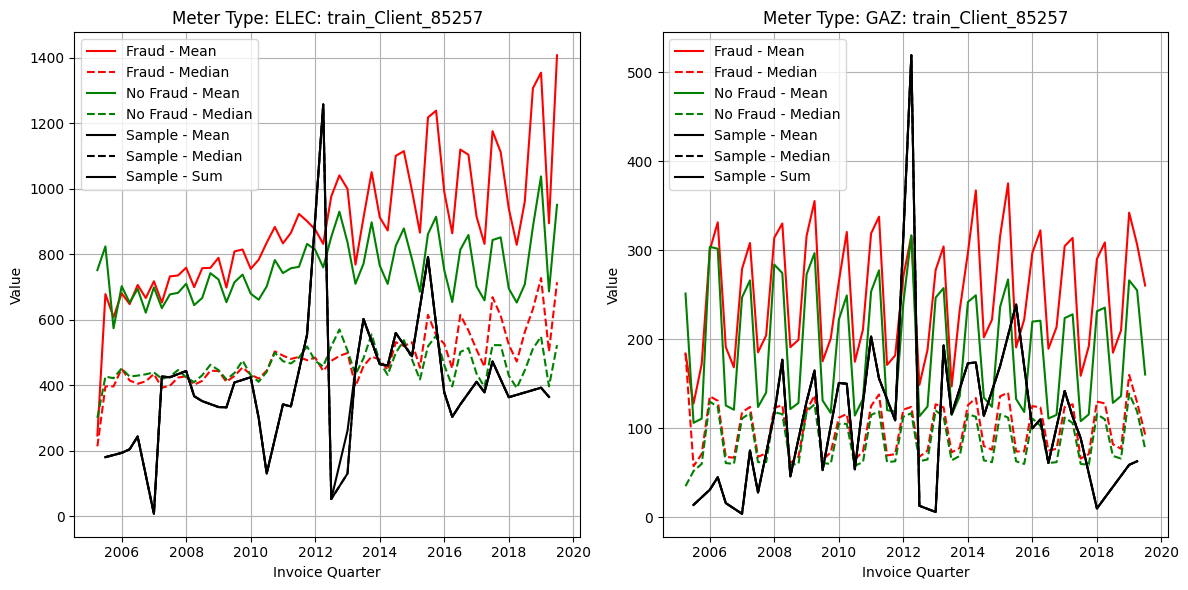

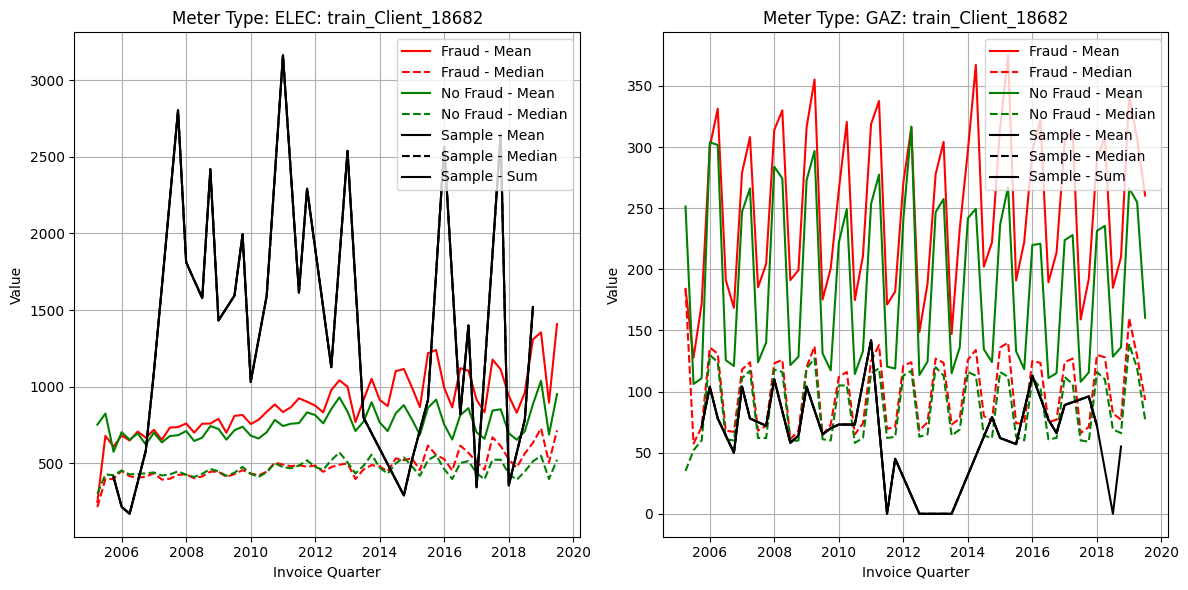

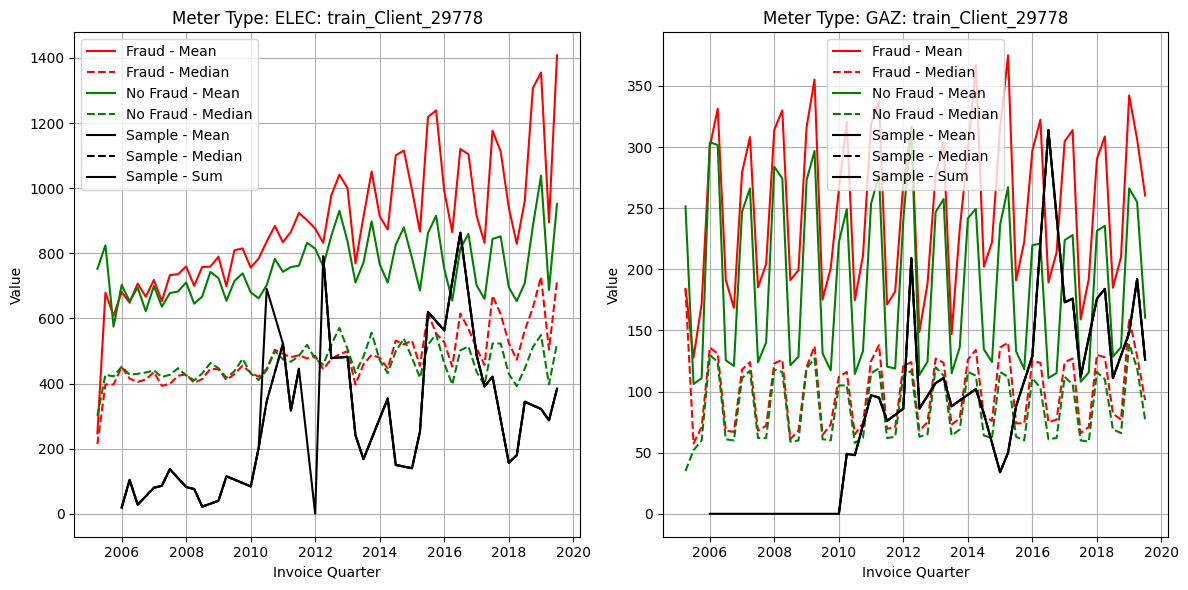

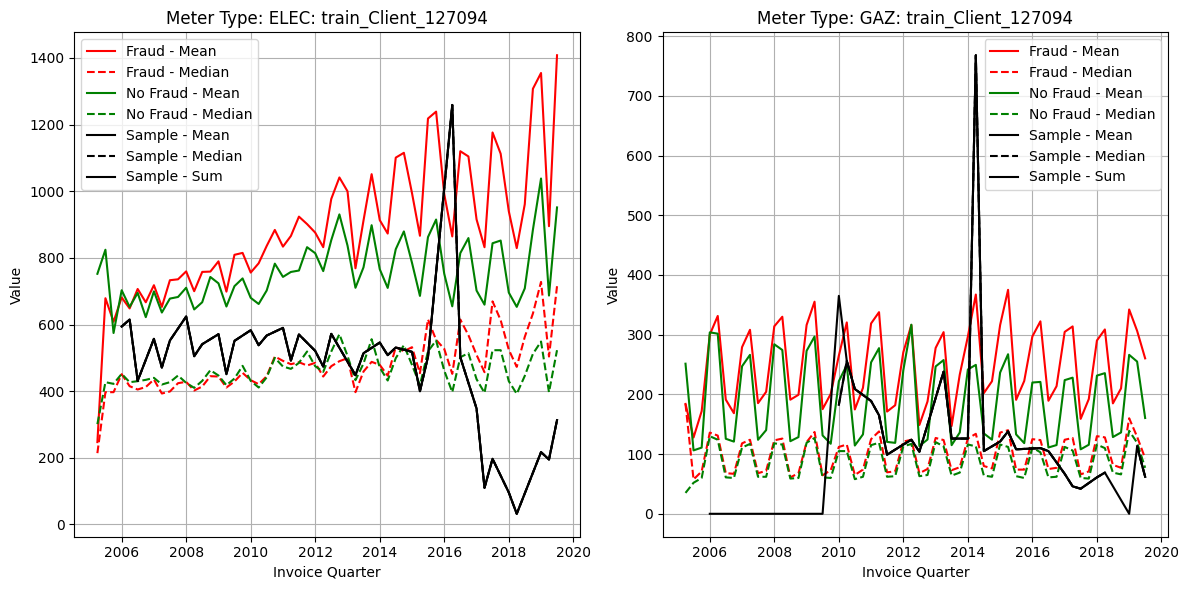

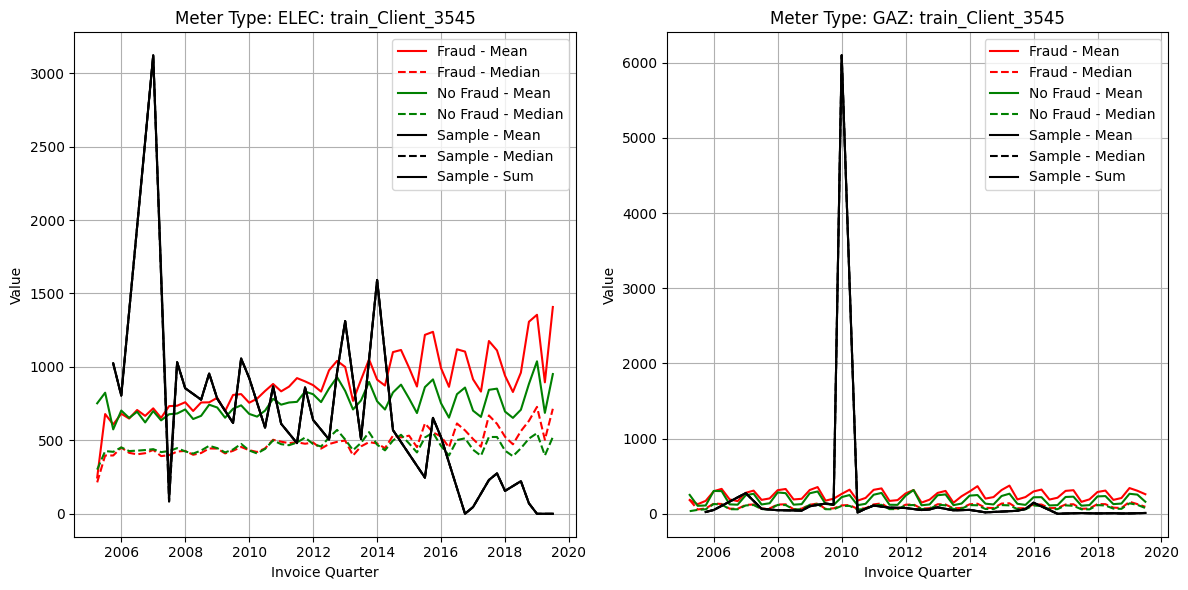

In [165]:
for client_ex in df_train.query('(fraud == False)').sample(n=5)['client_id']: # 5 random non-fraud cases
    Plot_usageplot(df_train, df_temp, client_ex) 

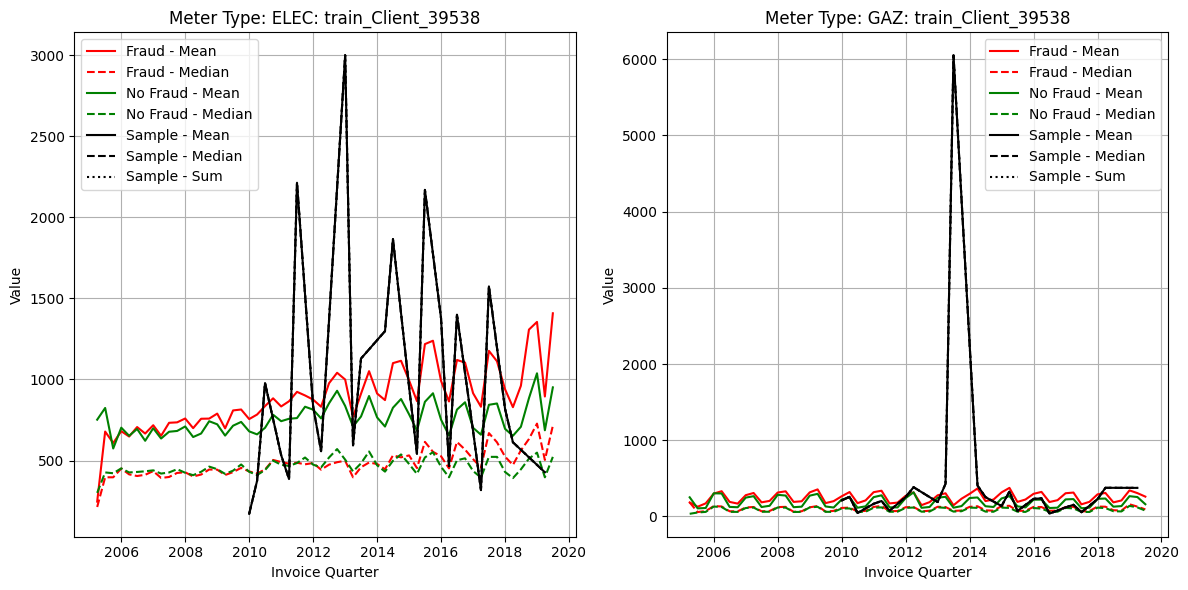

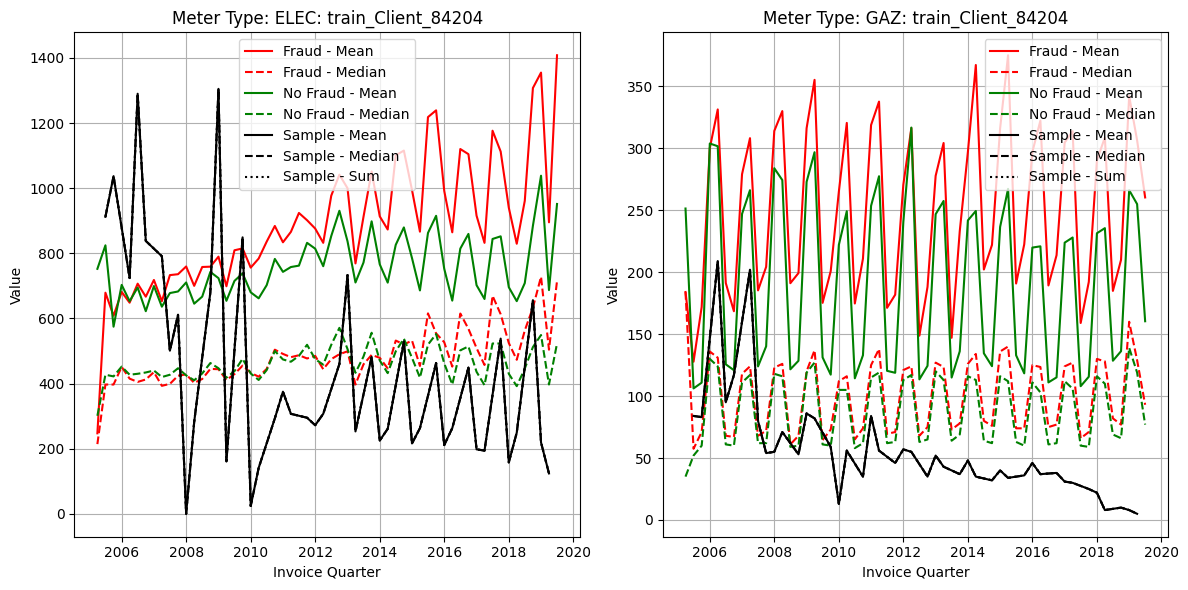

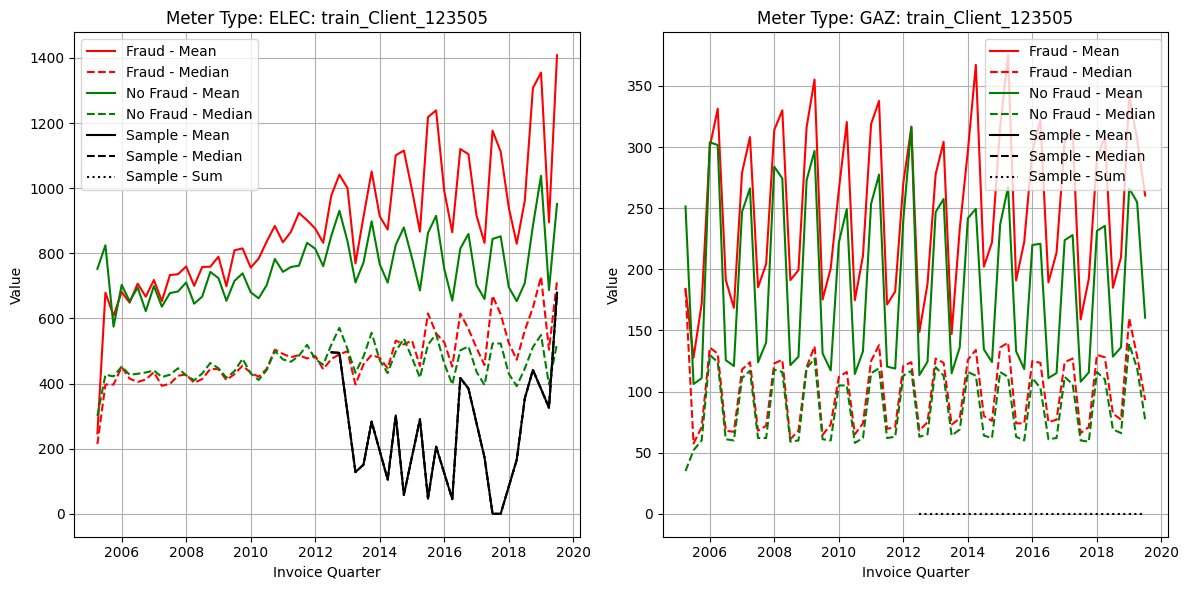

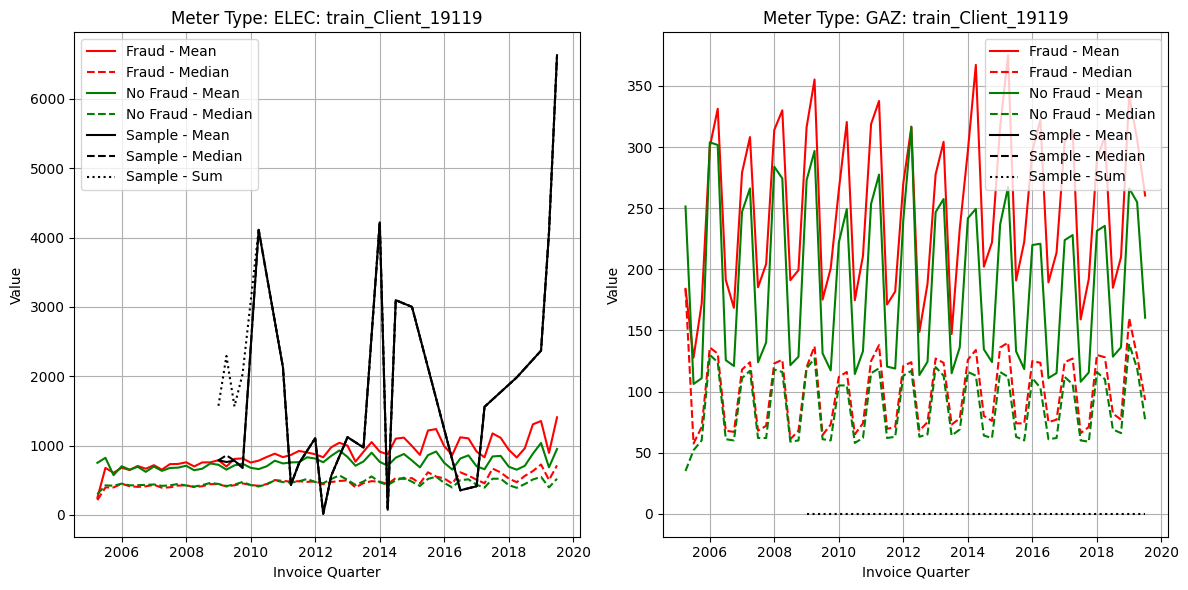

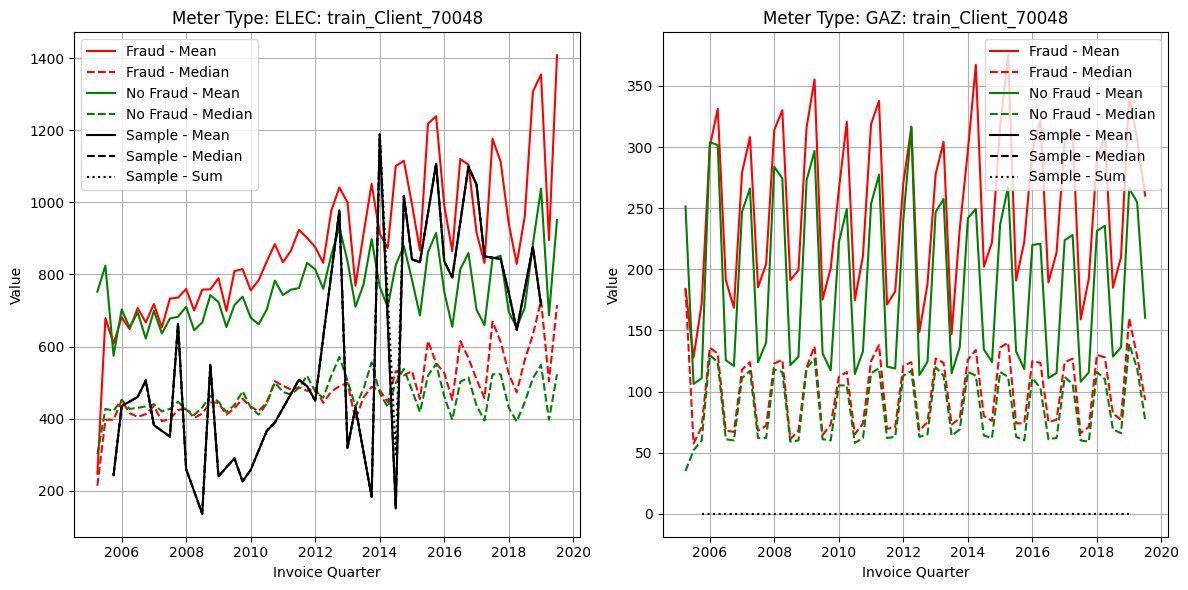

In [90]:
for client_ex in df_train.query('(fraud == True)').sample(n=5)['client_id']: # 5 random fraud cases
    Plot_usageplot(df_train, df_temp, client_ex) 

Looking to so if cumulative metrics is better

In [330]:
def Prep_Client(df_train, df_agg, client_id):
     # Getting summary metrics for population
     df_temp = df_agg[df_agg['fraud'] == True][['mtr_type' , 'invoice_quarter', 'usage_mean', 'usage_median']].copy()
     df_temp.rename(columns={'usage_mean' : 'fraud_usage_mean', 'usage_median': 'fraud_usage_median'}, inplace=True)
     temp = df_agg[df_agg['fraud'] == False][['mtr_type' , 'invoice_quarter', 'usage_mean', 'usage_median']].copy()
     temp.rename(columns={'usage_mean' : 'nofrd_usage_mean', 'usage_median': 'nofrd_usage_median'}, inplace=True)
     df_temp = df_temp.merge(temp, on=['mtr_type', 'invoice_quarter'], how='left')
     # Getting summary metrics for a client
     col_names = ['mtr_type', 'invoice_quarter', 'usage_n']
     temp = (df_train.loc[(df_train['client_id'] == client_id), col_names].groupby(['mtr_type', 'invoice_quarter'], observed=False)
             .agg(used_mean=('usage_n', 'mean'),
                  used_median=('usage_n', 'median'),
                  used_sum=('usage_n', 'sum')).reset_index())
     # Combine summary metrics for population with client
     df_temp = df_temp.merge(temp[['mtr_type', 'invoice_quarter', 'used_mean', 'used_median', 'used_sum']], on=['mtr_type', 'invoice_quarter'], how='left')
     
     # Find first a last entry for electricity and gas to truncate
     temp = df_temp.groupby('mtr_type', observed=False).agg(valid_min=('used_median', lambda x: x.first_valid_index()),
                                                            valid_max=('used_median', lambda x: x.last_valid_index())).reset_index()
     # Remove unnecessary rows
     elec_start = temp.loc[temp['mtr_type'] == 'ELEC', 'valid_min'].iloc[0]
     elec_end = temp.loc[temp['mtr_type'] == 'ELEC', 'valid_max'].iloc[0]
     gas_start = temp.loc[temp['mtr_type'] == 'GAZ', 'valid_min'].iloc[0]
     gas_end = temp.loc[temp['mtr_type'] == 'GAZ', 'valid_max'].iloc[0]
     if np.isnan(elec_start):
          elec_start = 115 
          elec_end = 115 # use last index
     if np.isnan(gas_start):
          gas_start = 115 
          gas_end = 115 # use last index

     df_temp = df_temp.iloc[np.r_[elec_start:(elec_end+1), gas_start:(gas_end+1)], :]
     # Get agg metrics
     col_names = ['fraud_pop_mean_sum', 'fraud_pop_median_sum', 'nofrd_pop_mean_sum', 'nofrd_pop_median_sum', 'ind_mean_sum', 'ind_median_sum', 'ind_sum_sum']
     df_temp[col_names] = (df_temp.groupby('mtr_type', observed=False)
                         .agg(fraud_pop_mean_sum=('fraud_usage_mean', 'cumsum'),
                              fraud_pop_median_sum=('fraud_usage_median', 'cumsum'),
                              nofrd_pop_mean_sum=('nofrd_usage_mean', 'cumsum'),
                              nofrd_pop_median_sum=('nofrd_usage_median', 'cumsum'),
                              ind_mean_sum=('used_mean', 'cumsum'),
                              ind_median_sum=('used_median', 'cumsum'),
                              ind_sum_sum=('used_sum', 'cumsum')))
     # Fill in gaps: Might want to swap to linear interpolation.
     df_temp['ind_mean_sum'] = df_temp['ind_mean_sum'].ffill()
     df_temp['ind_median_sum'] = df_temp['ind_median_sum'].ffill()
     df_temp['ind_sum_sum'] = df_temp['ind_sum_sum'].ffill()
     # Saving a reverse to compare
     col_names = ['fraud_pop_mean_sum', 'fraud_pop_median_sum', 'nofrd_pop_mean_sum', 'nofrd_pop_median_sum', 'ind_mean_sum', 'ind_median_sum', 'ind_sum_sum']
     for col_name in col_names:
          df_temp[col_name+'_rev'] = - df_temp[col_name]
          for nrg_type in ['ELEC', 'GAZ']:
               df_temp.loc[df_temp['mtr_type'] == nrg_type, col_name+'_rev'] = df_temp.loc[df_temp['mtr_type'] == nrg_type, col_name+'_rev'] + df_temp.loc[df_temp['mtr_type'] == nrg_type, col_name].max()

     df_temp = df_temp[df_temp['ind_mean_sum'].notna()]
     return df_temp

In [338]:
def Plot_cumusageplot(df_client, client_id, rev, delta):
    col_names = ['mtr_type', 'invoice_quarter']

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    if delta is True:
        # This will look at ind_sum_sum versus the population metrics      
        styles = {
            ('Client delta from Fraud', 'fraud_pop_mean_sum', 'mean'): {'color': 'red', 'linestyle': '-'},
            ('Client delta from No Fraud', 'nofrd_pop_mean_sum', 'mean'): {'color': 'green', 'linestyle': '-'},
            ('Client delta from Fraud', 'fraud_pop_median_sum', 'median'): {'color': 'red', 'linestyle': '--'},
            ('Client delta from No Fraud', 'nofrd_pop_median_sum', 'median'): {'color': 'green', 'linestyle': '--'}
        }
    else:
        styles = {
            ('Client', 'ind_mean_sum', 'mean'): {'color': 'black', 'linestyle': '-'},
            ('Client', 'ind_median_sum', 'median'): {'color': 'black', 'linestyle': '--'},
            ('Client', 'ind_sum_sum', 'sum'): {'color': 'black', 'linestyle': ':'},
            ('Fraud', 'fraud_pop_mean_sum', 'mean'): {'color': 'red', 'linestyle': '-'},
            ('No Fraud', 'nofrd_pop_mean_sum', 'mean'): {'color': 'green', 'linestyle': '-'},
            ('Fraud', 'fraud_pop_median_sum', 'median'): {'color': 'red', 'linestyle': '--'},
            ('No Fraud', 'nofrd_pop_median_sum', 'median'): {'color': 'green', 'linestyle': '--'}
        }

    for ax, mtr_type in zip(axes, df_client['mtr_type'].unique()):
        # Filter data for each meter type
        data = df_client[df_client['mtr_type'] == mtr_type]
        
        # Plot each combination
        for (desc, metric, metric_name), style in styles.items():
            ax.plot(
                data['invoice_quarter'],
                data[metric if rev is False else metric+'_rev'] if delta is False else (data['ind_sum_sum' if rev is False else 'ind_sum_sum_rev'] - data[metric if rev is False else metric+'_rev']),
                label=f"{desc} - {metric_name.capitalize()}",
                **style
        )
        
        # Formatting
        ax.set_title(f"Meter Type: {mtr_type}: {client_id}")
        ax.set_xlabel("Invoice Quarter")
        ax.set_ylabel("Value")
        ax.legend()
        ax.grid(True)

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

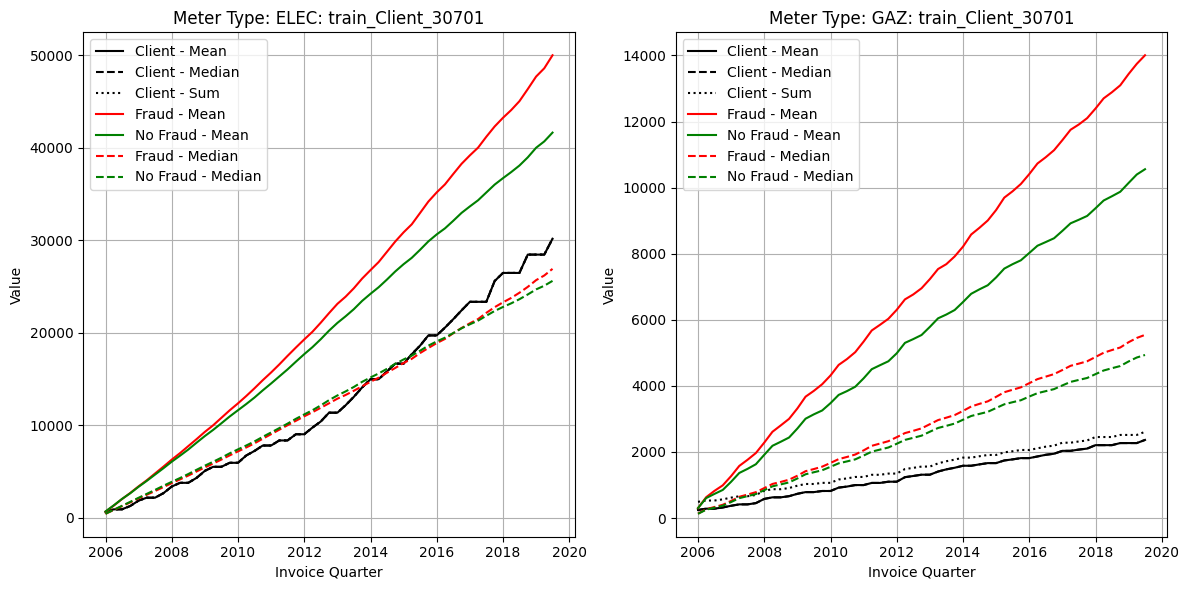

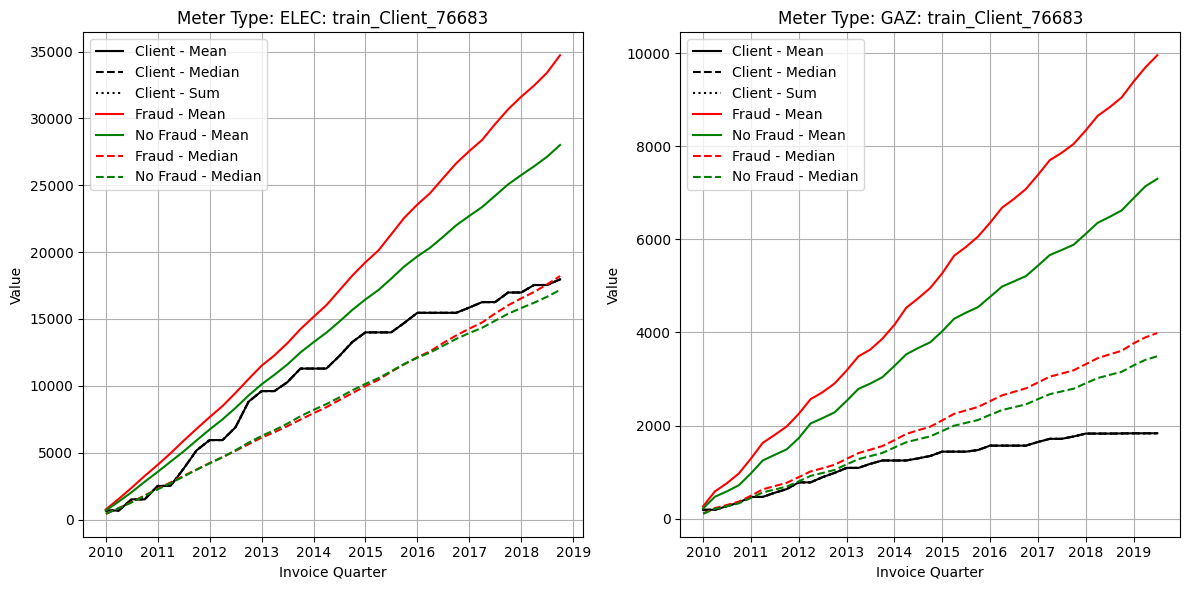

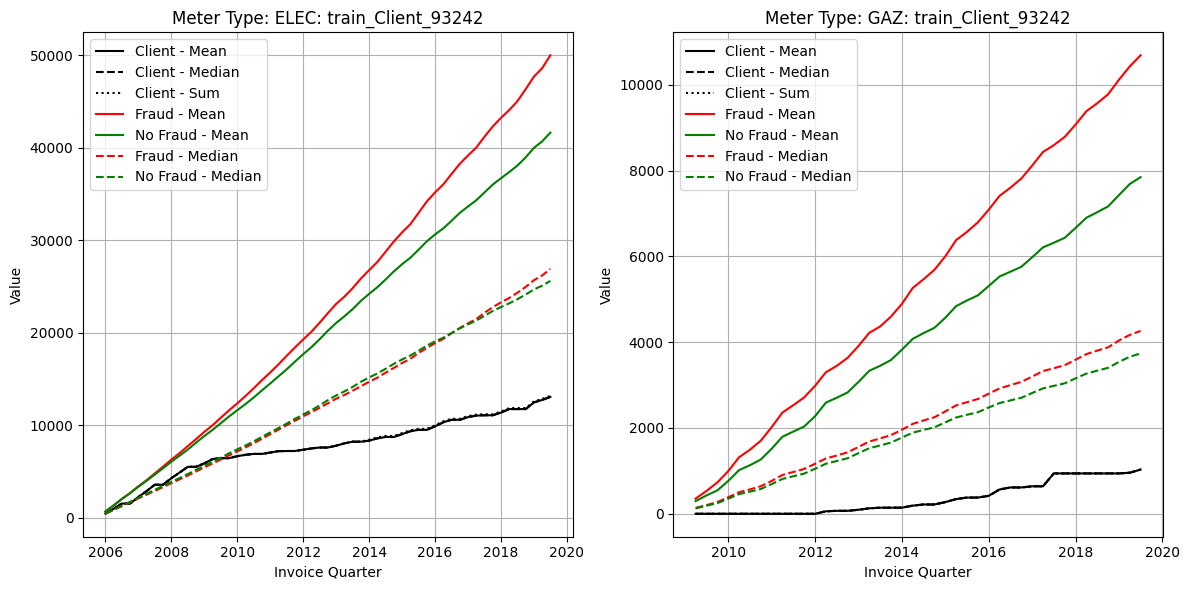

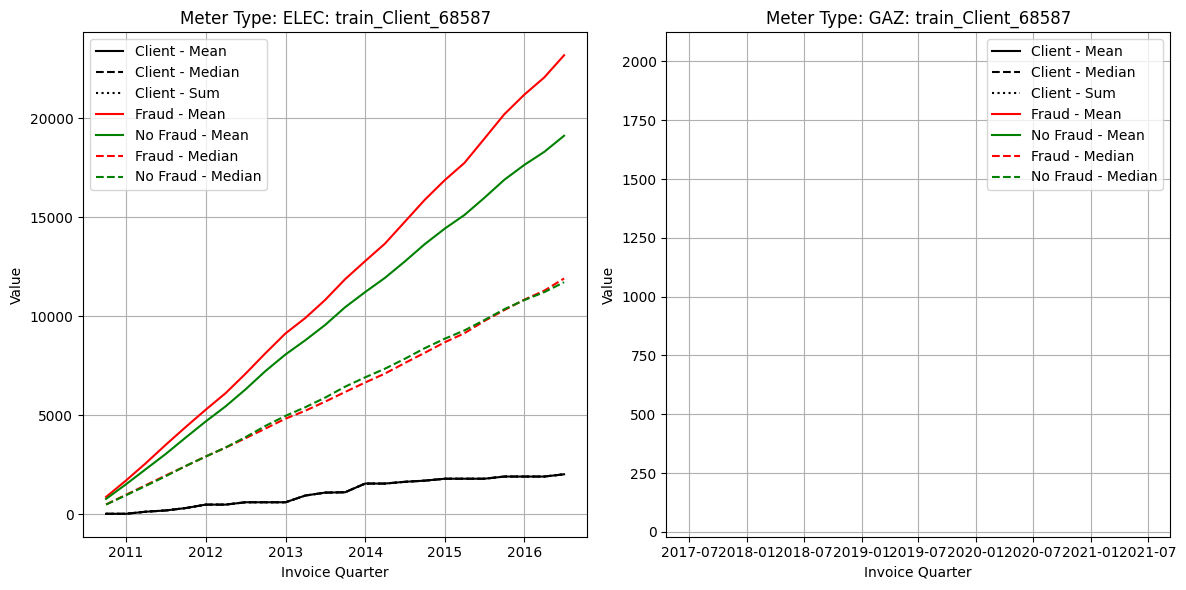

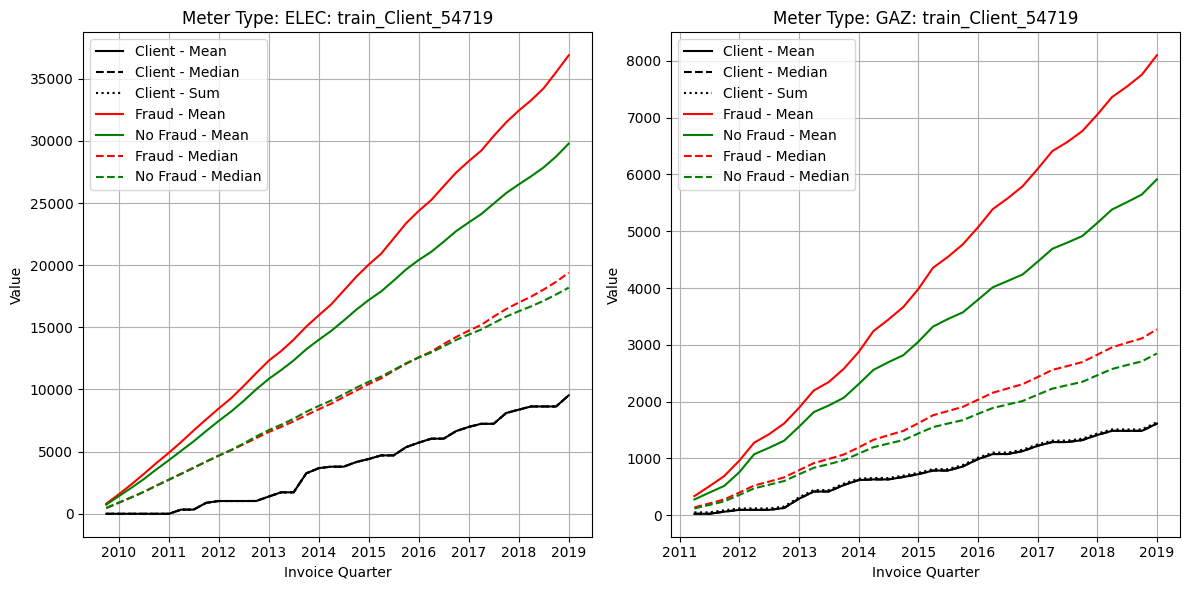

In [339]:
for client_ex in df_train.query('(fraud == False)').sample(n=5)['client_id']: # 5 random non-fraud cases
    Plot_cumusageplot(Prep_Client(df_train, df_agg, client_ex), client_ex, False, False) 

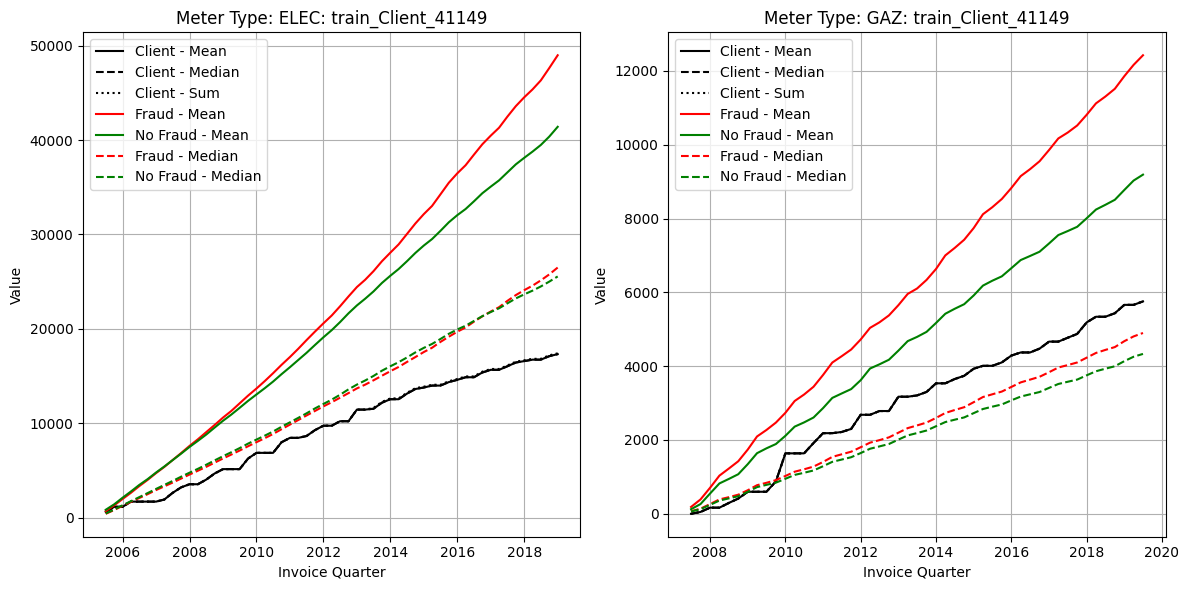

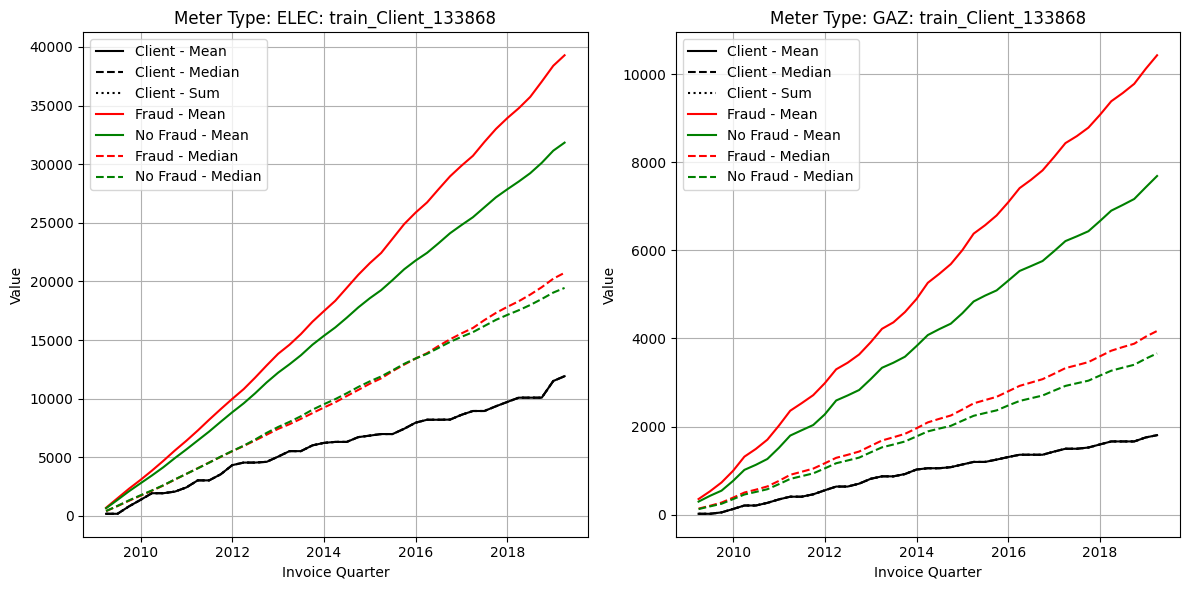

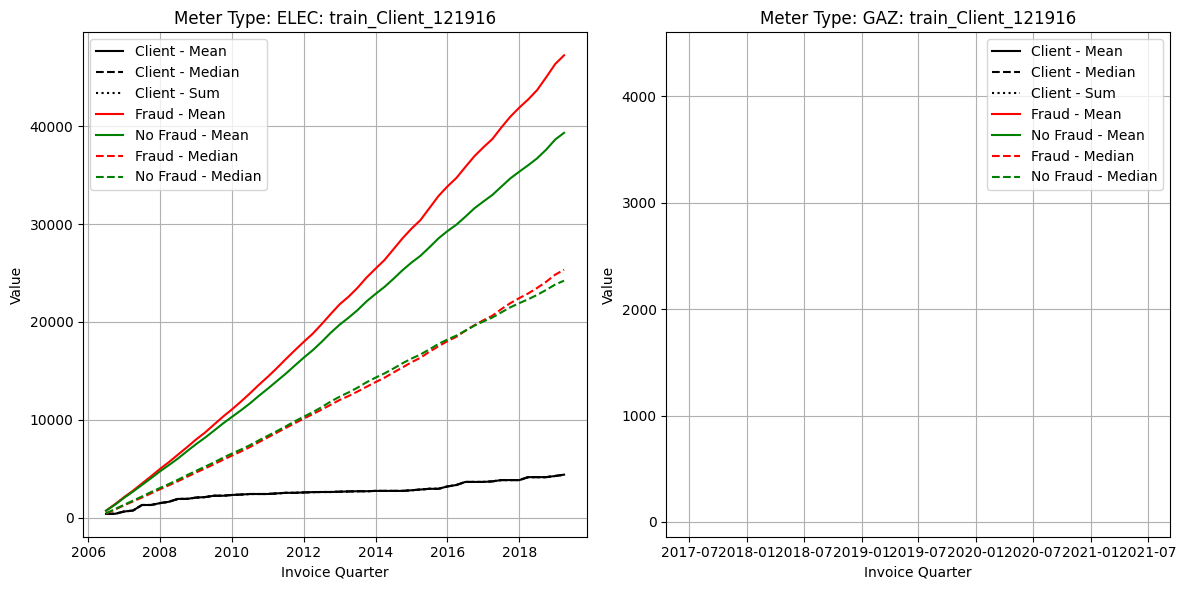

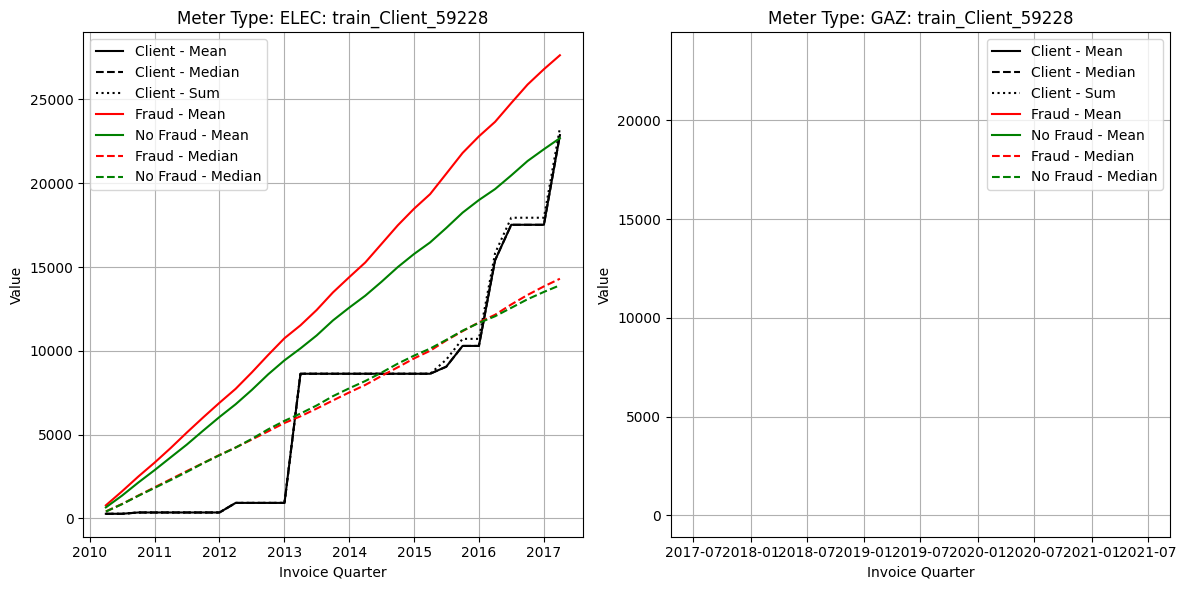

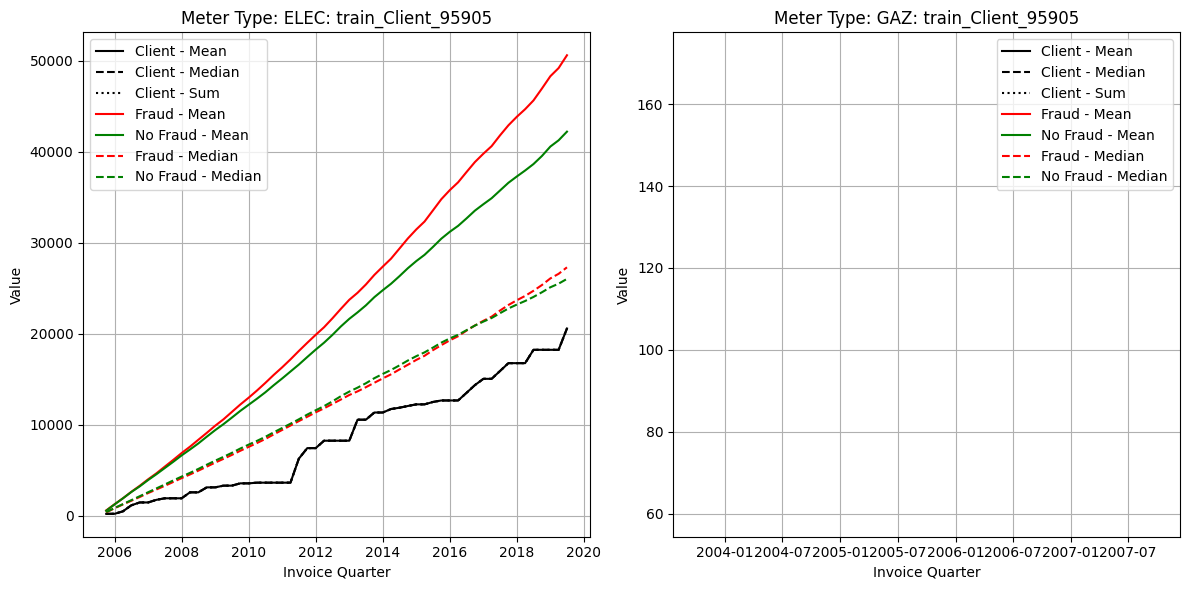

In [340]:
for client_ex in df_train.query('(fraud == True)').sample(n=5)['client_id']: # 5 random fraud cases
    Plot_cumusageplot(Prep_Client(df_train, df_agg, client_ex), client_ex, False, False)

Doesn't seem to have very clear signs between fraud and non-fraud. Additionally, this has a variable window which is not ideal for making tabular set for ML. There is also an issue as to how to account for those with multiple meters. Often, one might be running at 0, this would heavily affect the average for that client. Perhaps, sum is the way to go (the dotted line).

If we go with theory that these are labelled based on more recent data, those further back are less important. In this case, we may want to sum in reverse, starting from most recent date.

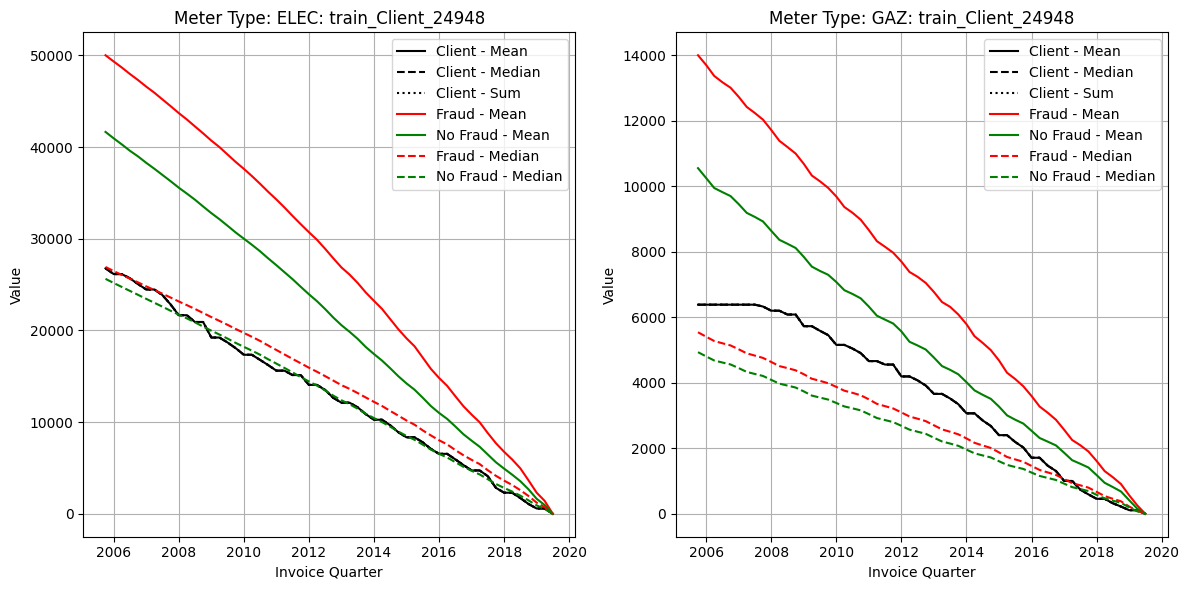

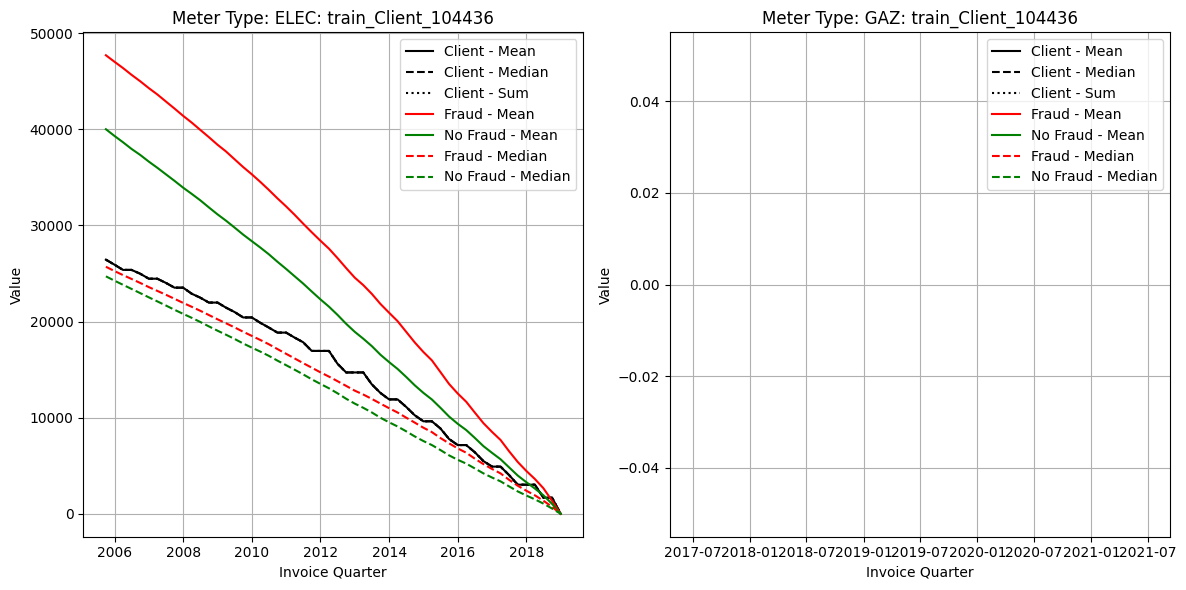

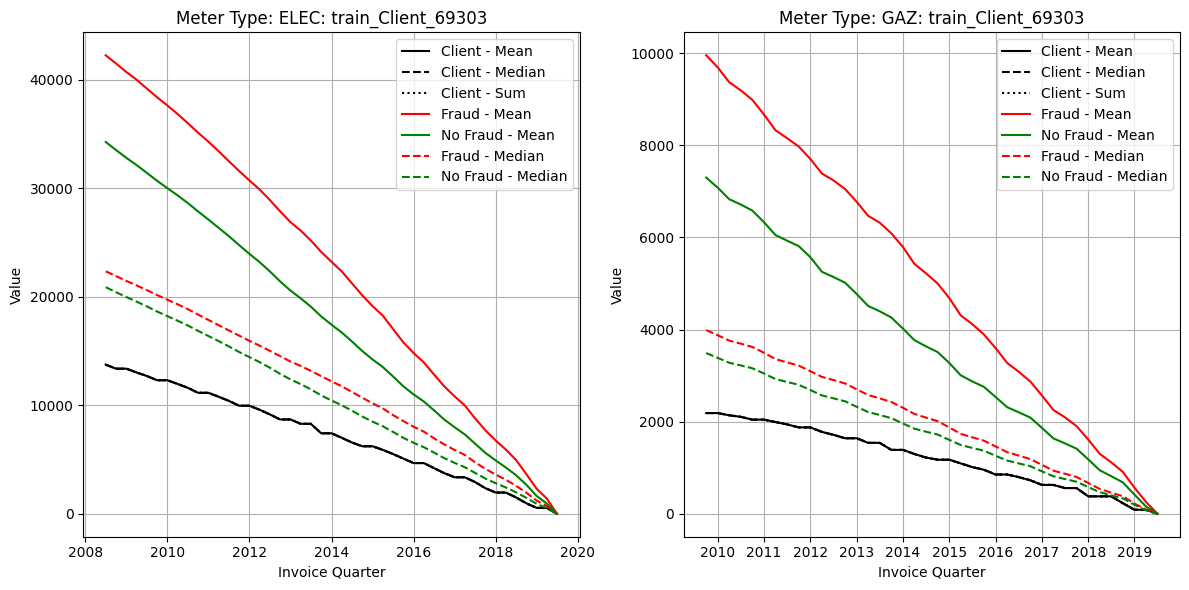

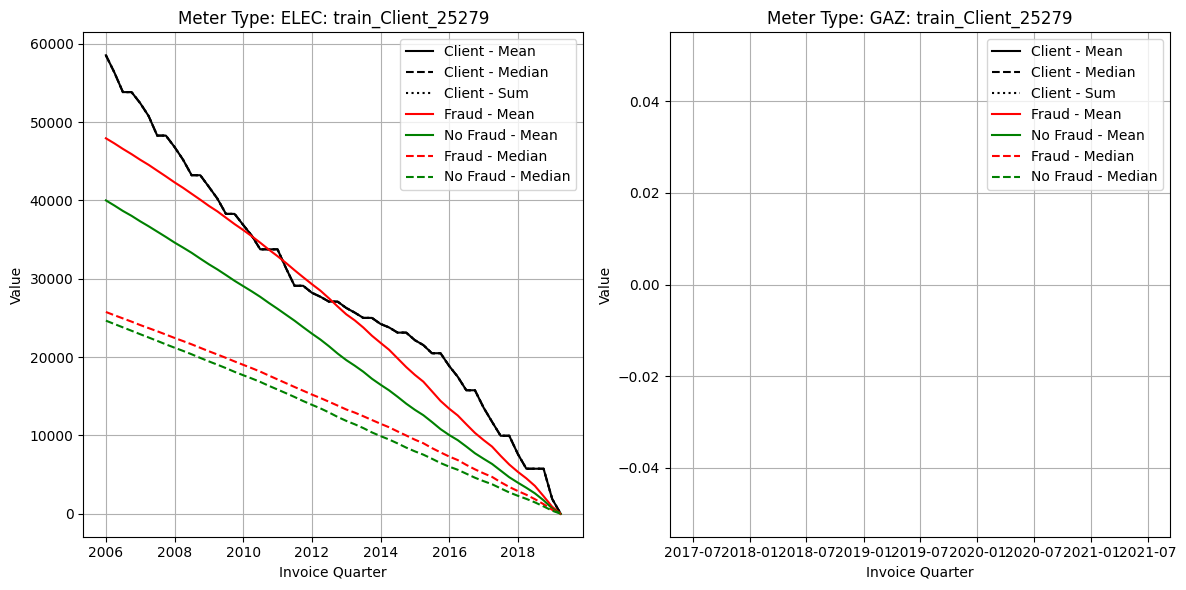

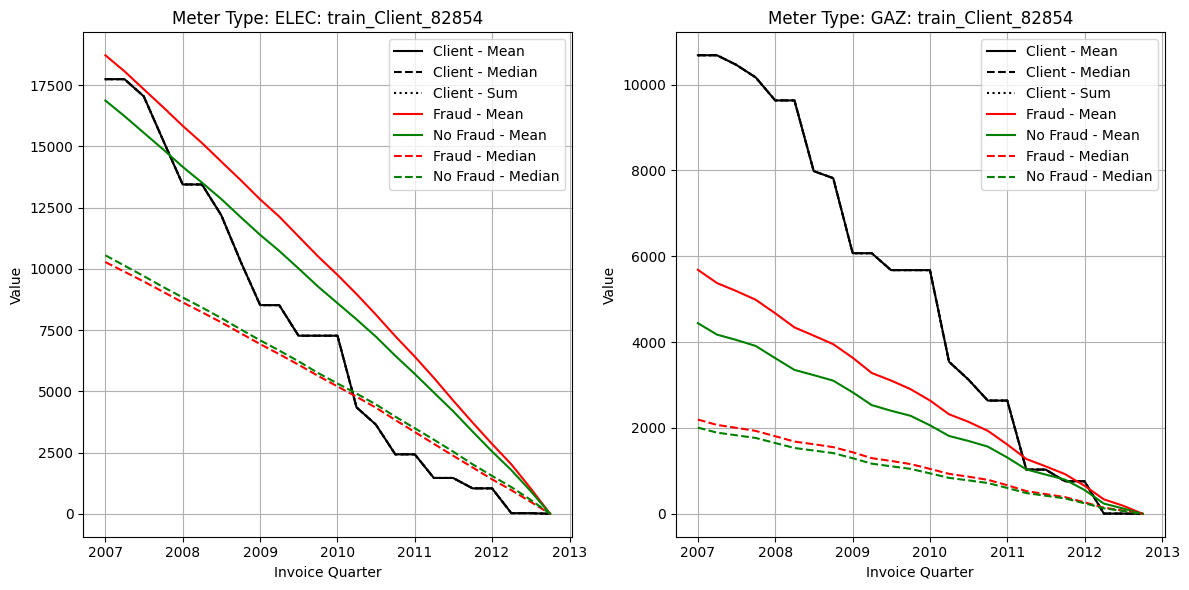

In [341]:
for client_ex in df_train.query('(fraud == False)').sample(n=5)['client_id']: # 5 random non-fraud cases
    Plot_cumusageplot(Prep_Client(df_train, df_agg, client_ex), client_ex, True, False) 

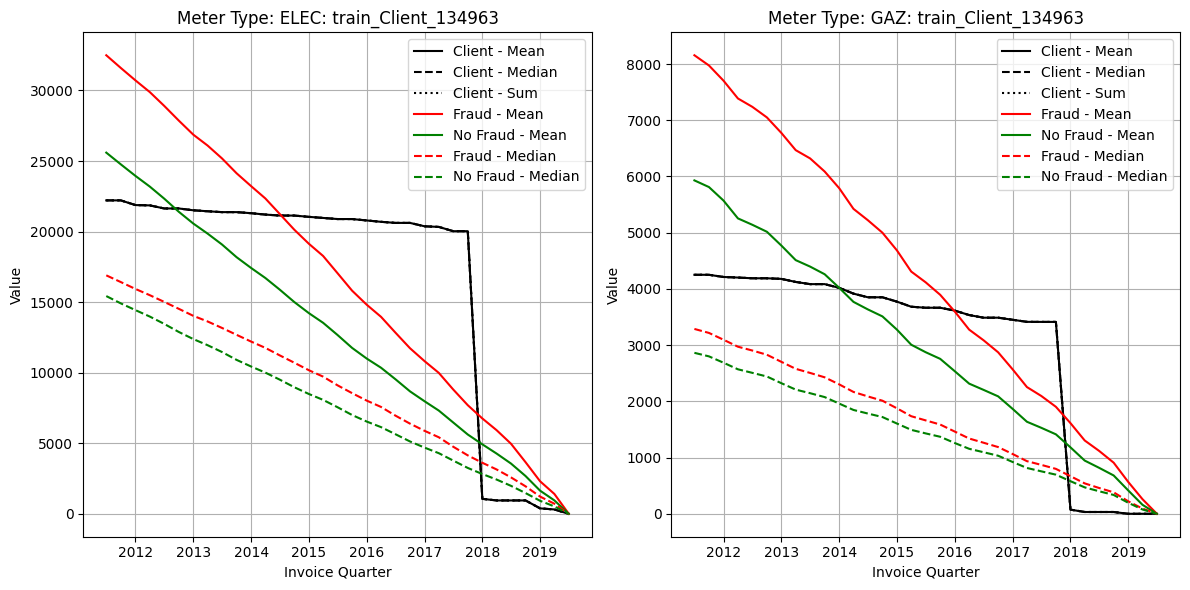

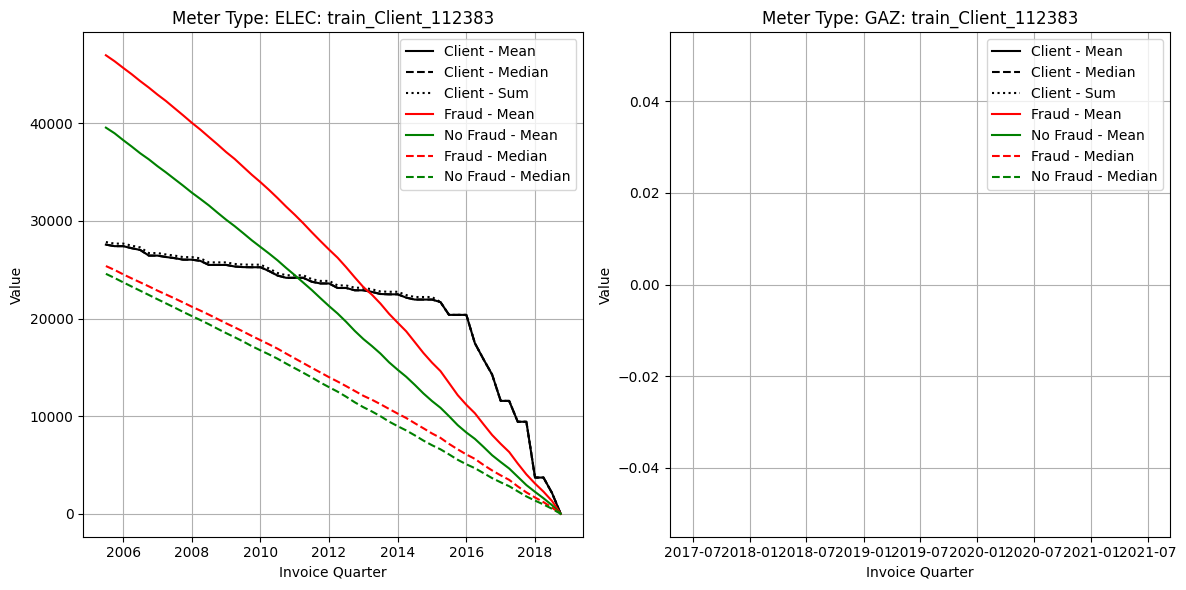

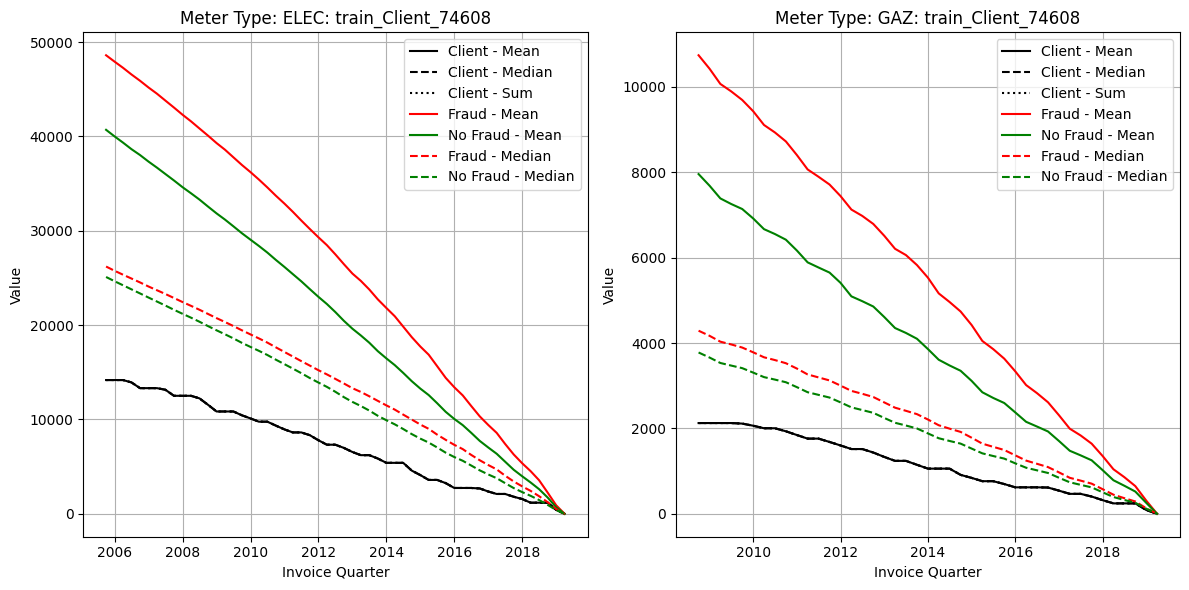

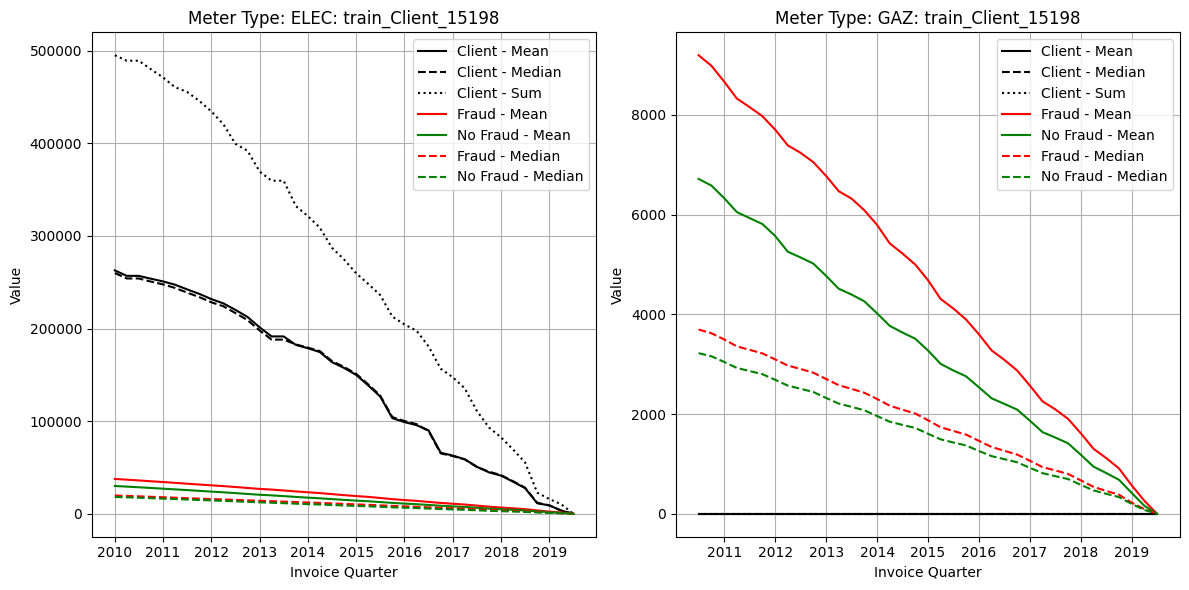

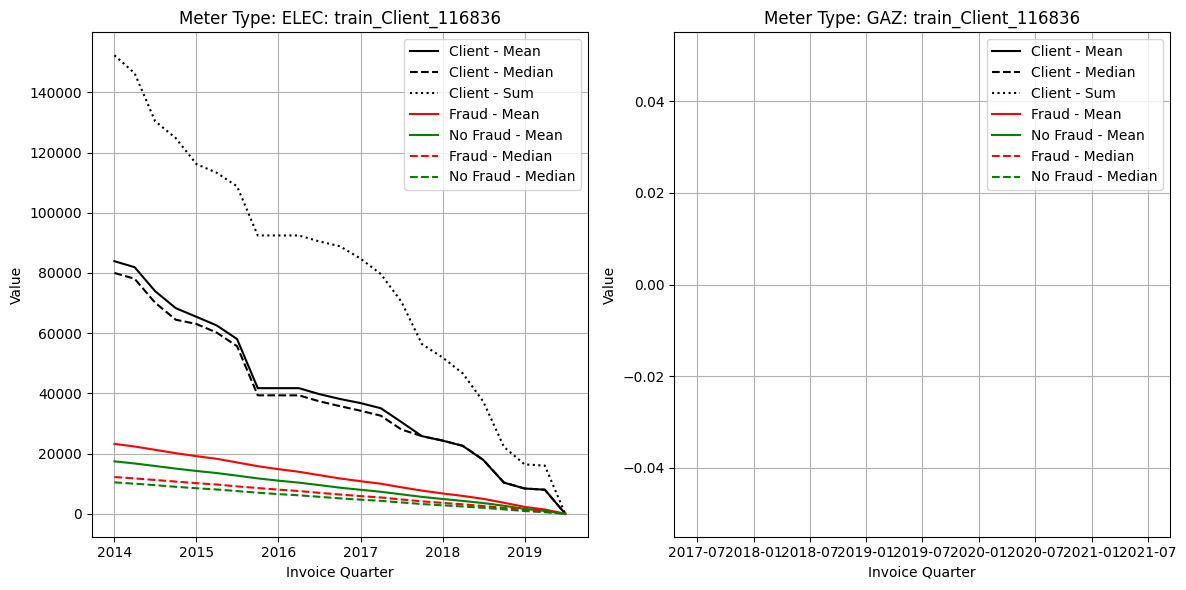

In [342]:
for client_ex in df_train.query('(fraud == True)').sample(n=5)['client_id']: # 5 random fraud cases
    Plot_cumusageplot(Prep_Client(df_train, df_agg, client_ex), client_ex, True, False) 

At this point, I feel very doubtful that there is sufficient information to successfully identify many of these cases. Will try to make four lines: the delta between the history vs the population (Fraud-Mean, Fraud-Median, No_Fraud-Mean, No_Fraud-Median).

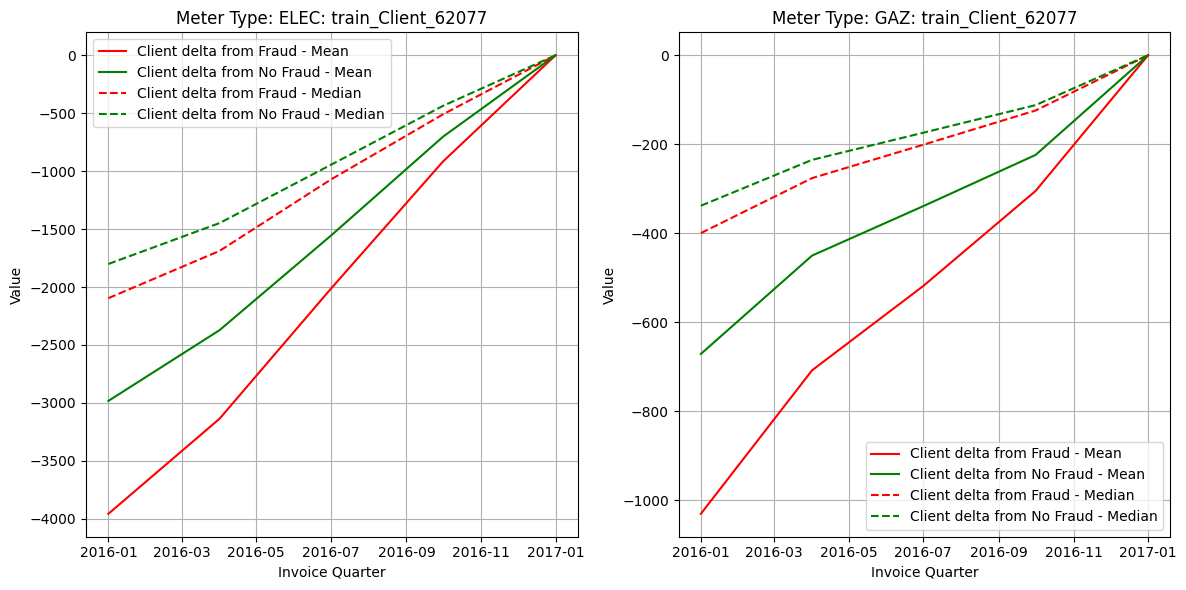

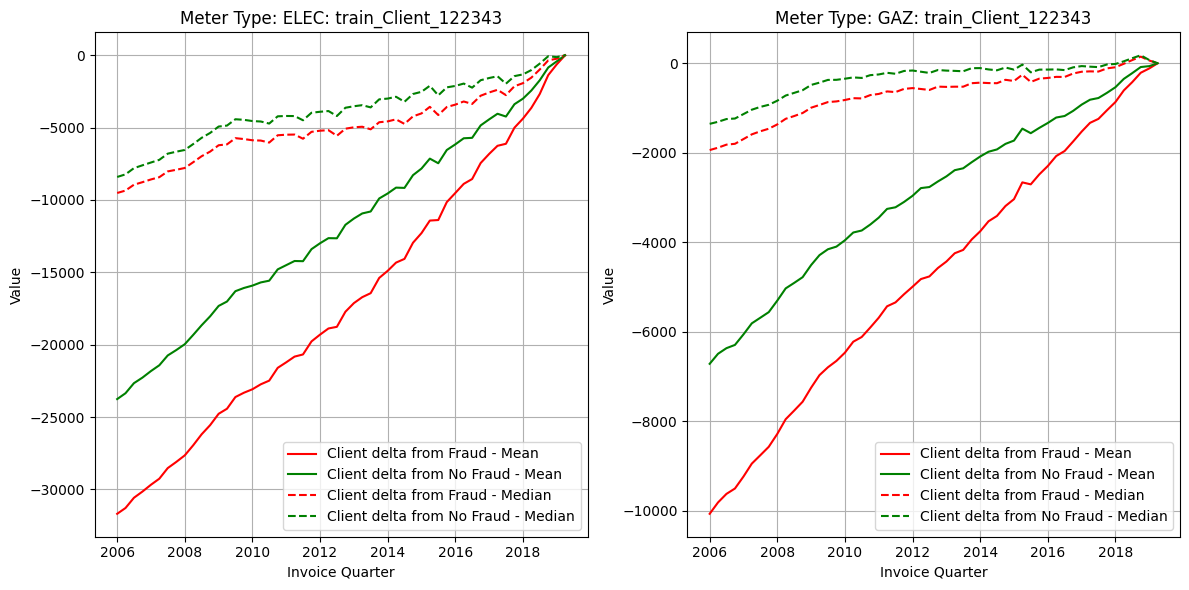

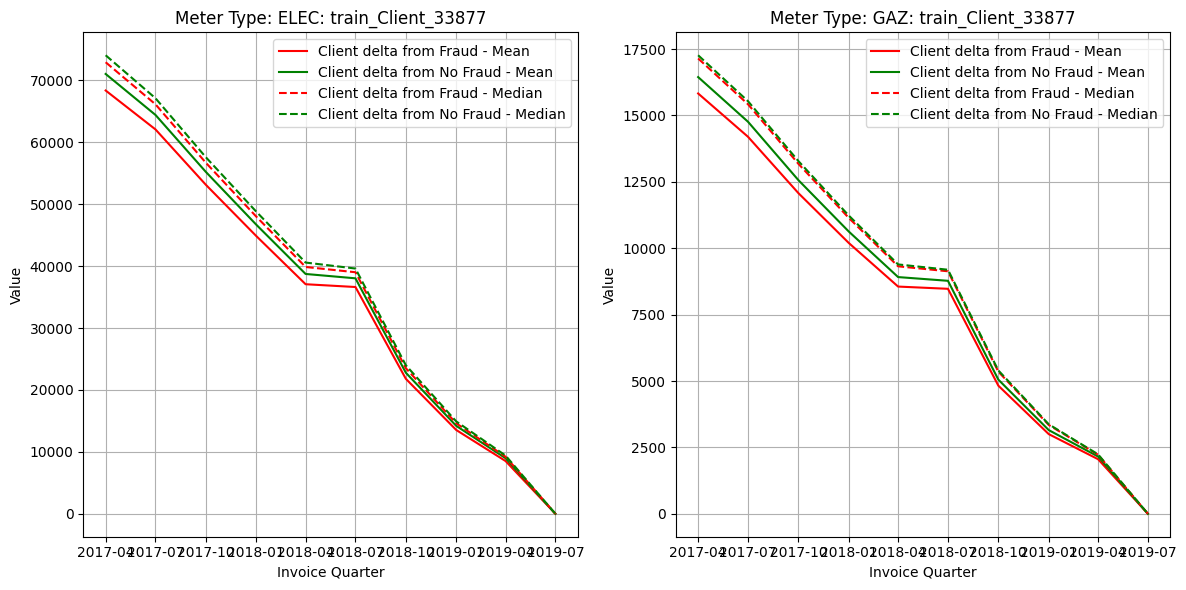

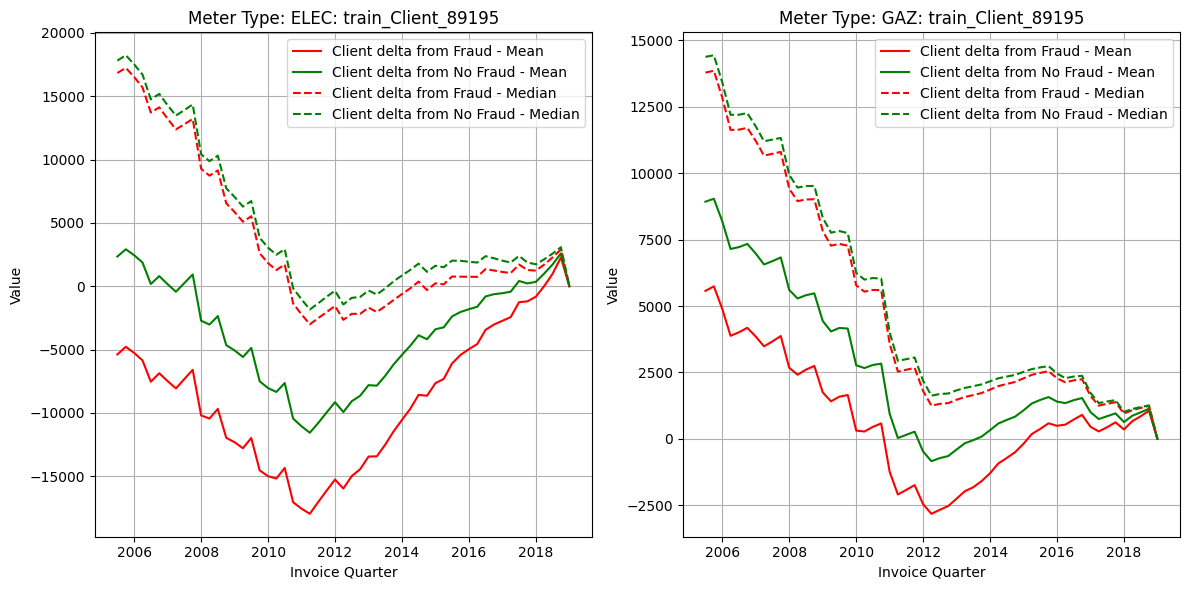

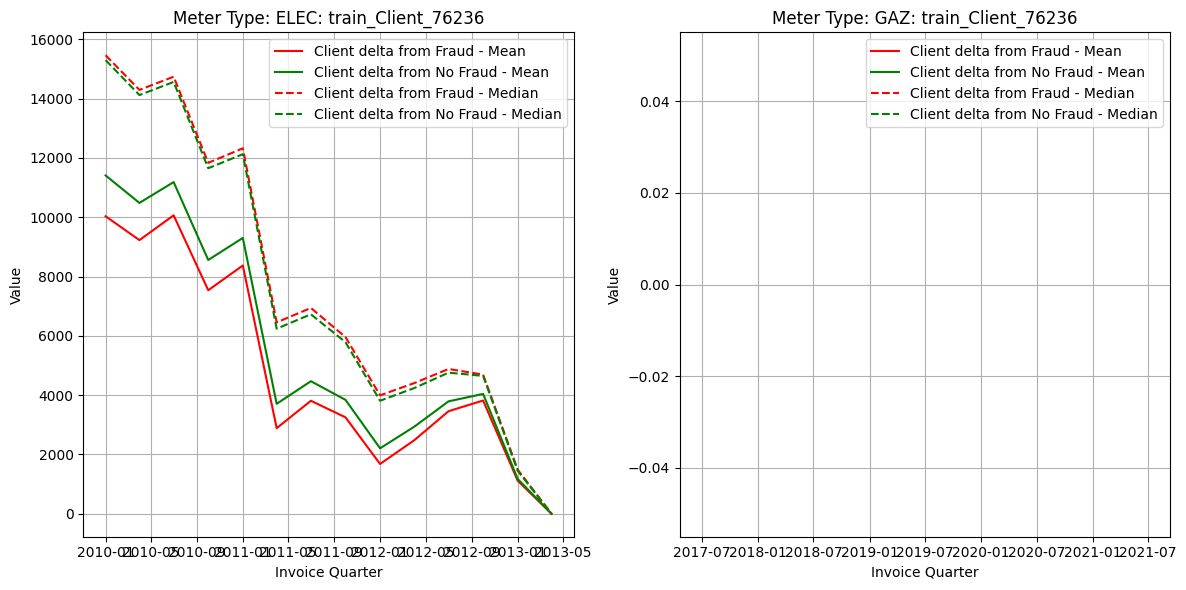

In [343]:
for client_ex in df_train.query('(fraud == False)').sample(n=5)['client_id']: # 5 random non-fraud cases
    Plot_cumusageplot(Prep_Client(df_train, df_agg, client_ex), client_ex, True, True) 

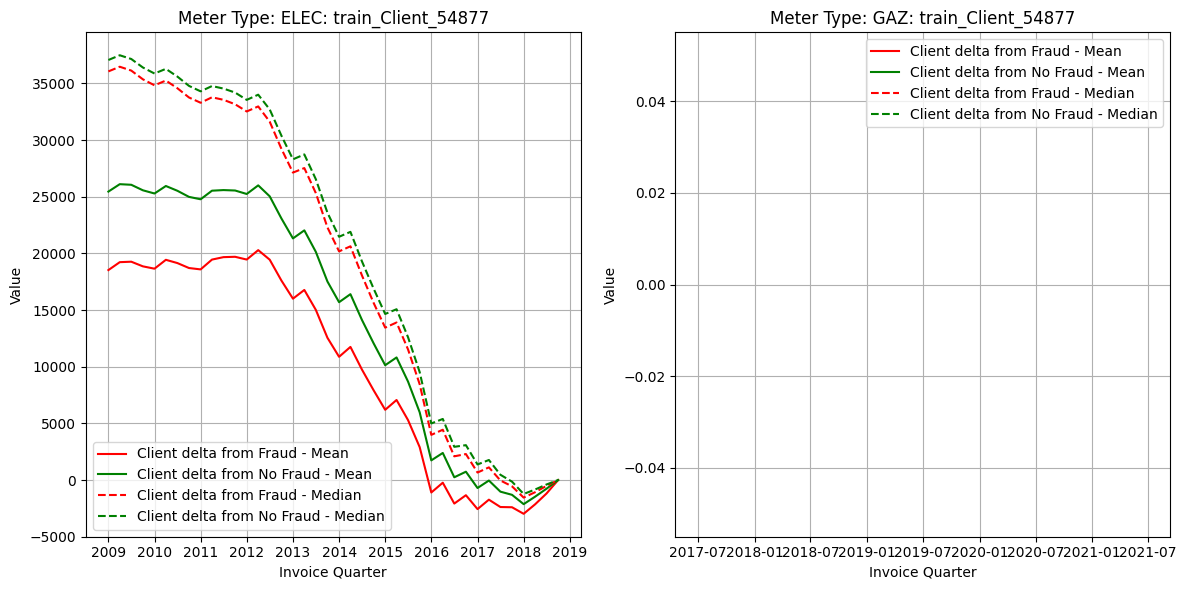

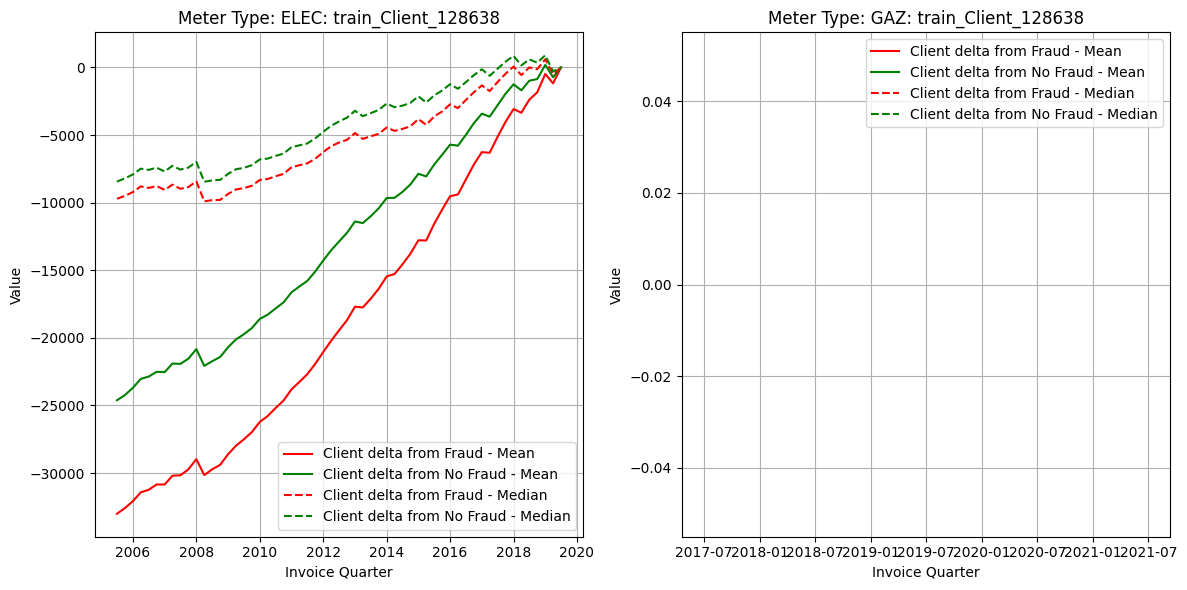

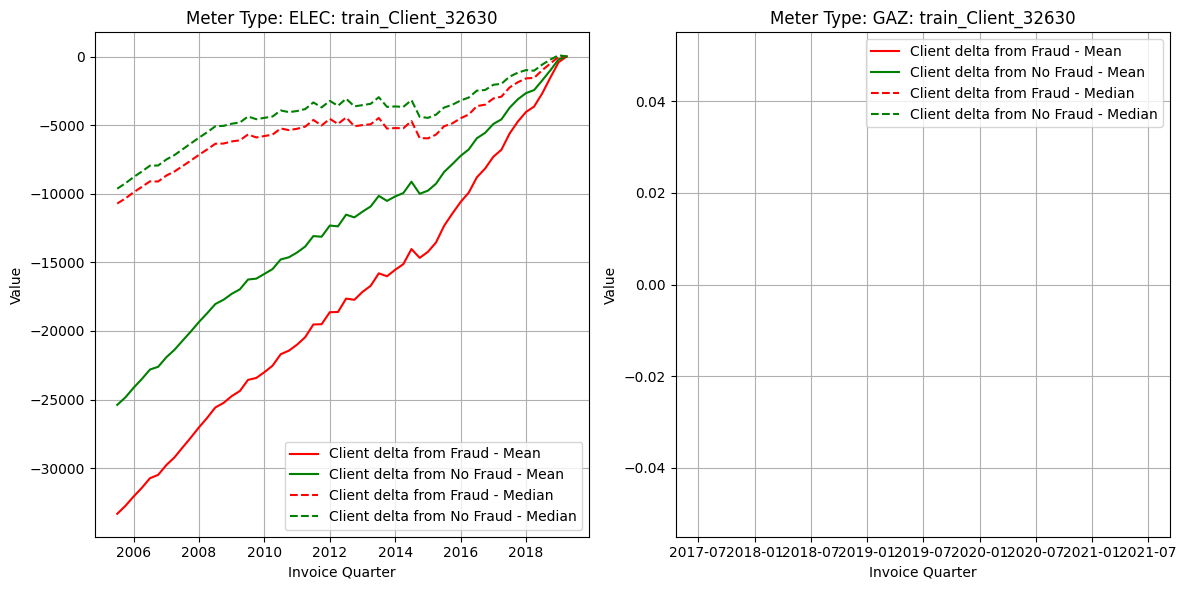

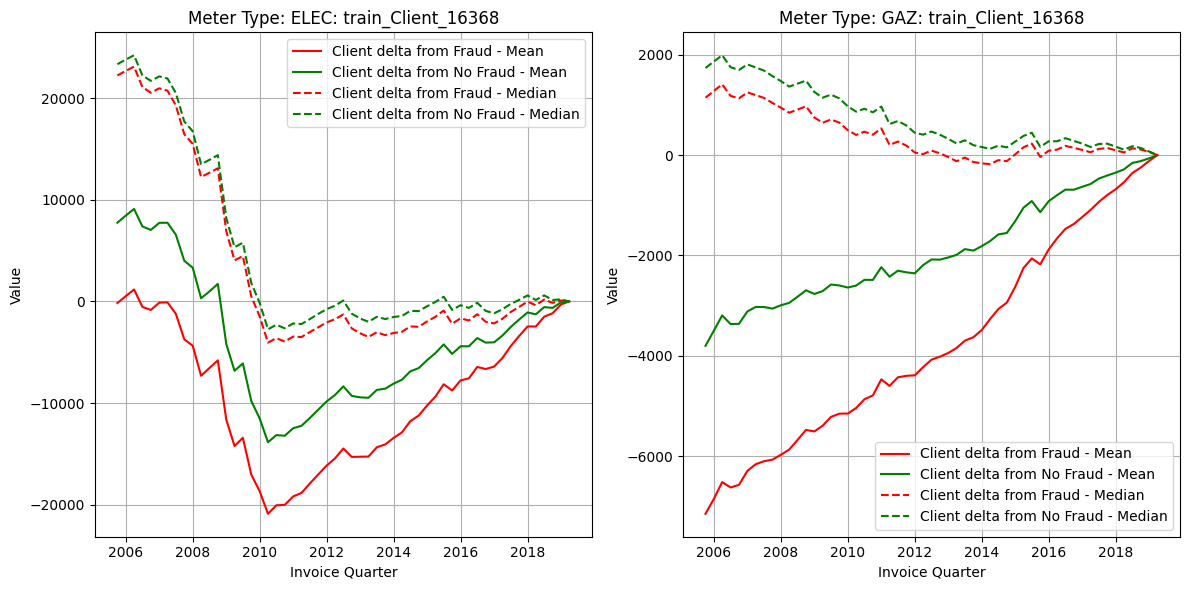

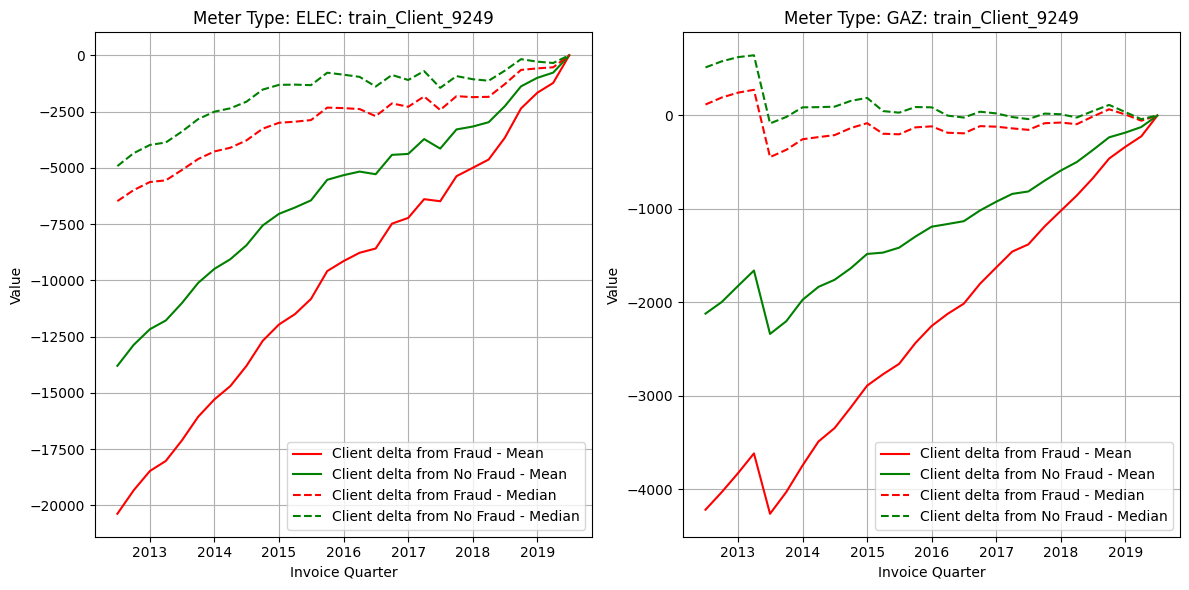

In [344]:
for client_ex in df_train.query('(fraud == True)').sample(n=5)['client_id']: # 5 random fraud cases
    Plot_cumusageplot(Prep_Client(df_train, df_agg, client_ex), client_ex, True, True) 

It seems like redundant information in Fraud and No Fraud, especially with the median values. However, let's keep it for now. Going to take the latest 5Y, and saving them as column of "age", such that the latest value will always be in the same column, regardless of the actual Y-Q it was in.

In [350]:
temp = df_train.copy()

In [ ]:
df_agg['usage_mean_sum']
df_agg['usage_median_sum']

In [364]:
# For each client_id, just take the most recent 5Years
#   # Find most recent quarter, and subtract 5Years to get the range and filter
#   # For each [client_id, mtr_type, invoice_quarter], aggregate via sum of usage
#   # 

temp = df_train.merge((df_train.groupby('client_id')['invoice_quarter'].max() - pd.DateOffset(years=5)).rename('five_year_cutoff'), on='client_id')
temp = temp[temp['invoice_quarter'] >= temp['five_year_cutoff']].drop(columns='five_year_cutoff')
temp = temp.groupby(['client_id', 'mtr_type', 'invoice_quarter'], observed = True).agg(usage_sum=('usage_n', 'sum')).reset_index()

# Step 1: Generate the full range of quarters for each client_id and mtr_type
full_quarters = []

for client_id, group in temp.groupby('client_id'):
    quarters = pd.date_range(start=group['invoice_quarter'].min(), end=group['invoice_quarter'].max(), freq='QS')
    for mtr_type in group['mtr_type'].unique():
        full_quarters.append(pd.DataFrame({
            'client_id': client_id,
            'mtr_type': mtr_type,
            'invoice_quarter': quarters
        }))

# Combine all the generated rows into a single DataFrame
full_quarters_df = pd.concat(full_quarters, ignore_index=True)

# Step 2: Merge with `temp` to include missing rows
temp = full_quarters_df.merge(temp, on=['client_id', 'mtr_type', 'invoice_quarter'], how='left')

# Step 3: Optional - Sort the DataFrame
temp = temp.sort_values(by=['client_id', 'mtr_type', 'invoice_quarter']).reset_index(drop=True)



In [365]:
temp

client_id mtr_type invoice_quarter  usage_sum
0            train_Client_0     ELEC      2014-01-01       82.0
1            train_Client_0     ELEC      2014-04-01        NaN
2            train_Client_0     ELEC      2014-07-01       99.0
3            train_Client_0     ELEC      2014-10-01      141.0
4            train_Client_0     ELEC      2015-01-01      123.0
...                     ...      ...             ...        ...
3345835  train_Client_99997      GAZ      2018-10-01        NaN
3345836  train_Client_99997      GAZ      2019-01-01        NaN
3345837  train_Client_99997      GAZ      2019-04-01        NaN
3345838  train_Client_99998     ELEC      2005-07-01      535.0
3345839  train_Client_99998     ELEC      2005-10-01      206.0

[3345840 rows x 4 columns]

In [ ]:
temp = temp.merge(
    df_agg.loc[df_agg['fraud'] == True, ['mtr_type', 'invoice_quarter', 'usage_mean', 'usage_median']],
    on=['mtr_type', 'invoice_quarter'],
    how='left'
)
temp.rename(columns={'usage_mean':'fraud_usage_mean','usage_median':'fraud_usage_median'}, inplace = True)
temp = temp.merge(
    df_agg.loc[df_agg['fraud'] == False, ['mtr_type', 'invoice_quarter', 'usage_mean', 'usage_median']],
    on=['mtr_type', 'invoice_quarter'],
    how='left'
)
temp.rename(columns={'usage_mean':'nofrd_usage_mean','usage_median':'nofrd_usage_median'}, inplace = True)
temp 

client_id mtr_type invoice_quarter  usage_sum  \
0            train_Client_0     ELEC      2014-01-01       82.0   
1            train_Client_0     ELEC      2014-04-01        NaN   
2            train_Client_0     ELEC      2014-07-01       99.0   
3            train_Client_0     ELEC      2014-10-01      141.0   
4            train_Client_0     ELEC      2015-01-01      123.0   
...                     ...      ...             ...        ...   
3345835  train_Client_99997      GAZ      2018-10-01        NaN   
3345836  train_Client_99997      GAZ      2019-01-01        NaN   
3345837  train_Client_99997      GAZ      2019-04-01        NaN   
3345838  train_Client_99998     ELEC      2005-07-01      535.0   
3345839  train_Client_99998     ELEC      2005-10-01      206.0   

         fraud_usage_mean  fraud_usage_median  nofrd_usage_mean  \
0              913.398840               479.0        766.035001   
1              873.049702               446.5        709.922271   
2             1100.934615               532.0        825.976601   
3             1115.416103               520.0        879.460301   
4              994.503981               532.0        785.324954   
...                   ...                 ...               ...   
3345835        209.963197                77.0        136.234768   
3345836        342.227857               160.0        266.228489   
3345837        306.475480               129.0        254.977123   
3345838        679.024675               397.0        824.509679   
3345839        608.418704               397.0        574.639034   

         nofrd_usage_median  
0                     471.0  
1                     432.0  
2                     499.0  
3                     538.0  
4                     479.0  
...                     ...  
3345835                66.0  
3345836               139.0  
3345837               119.0  
3345838               427.0  
3345839               422.0  

[3345840 rows x 8 columns]

In [363]:
df_train['client_id'].nunique()

128173

In [359]:
df_agg[['mtr_type', 'invoice_quarter', 'usage_mean', 'usage_median']].head()

mtr_type invoice_quarter  usage_mean  usage_median
0     ELEC      2005-04-01  752.268437         301.0
1     ELEC      2005-07-01  824.509679         427.0
2     ELEC      2005-10-01  574.639034         422.0
3     ELEC      2006-01-01  702.932575         452.0
4     ELEC      2006-04-01  652.873007         427.0

In [ ]:
def prep_clients(df_train, df_agg):

    # Filter date range
    mask = (df_train['invoice_date'].dt.year >= start_year) & \
           (df_train['invoice_date'].dt.year <= end_year)
    df_filtered = df_train[mask].copy()
    
    # Create quarter column
    df_filtered['quarter'] = df_filtered['invoice_date'].dt.to_period('Q')
    
    # Sum invoices by client and quarter
    quarterly_sums = df_filtered.groupby(['client_id', 'quarter'])['amount'].sum().reset_index()
    
    # Get the most recent quarter for each client
    latest_quarters = df_filtered.groupby('client_id')['quarter'].max()
    
    # Create a dictionary to store the transformed data
    transformed_data = {}
    
    # Prepare all possible quarters once
    quarter_lookup = {q: idx for idx, q in enumerate(df_agg.loc[df_agg['mtr_type'] == 'ELEC', 'invoice_quarter'])}
    
    # Convert df_agg to dict for faster lookup
    agg_mean_dict = df_agg['mean'].to_dict()
    agg_median_dict = df_agg['median'].to_dict()
    
    # Process each client
    for client_id, latest_quarter in latest_quarters.items():
        # Initialize arrays for mean and median differences
        mean_diffs = np.zeros(20)
        median_diffs = np.zeros(20)
        
        # Get all quarters for this client
        client_data = quarterly_sums[quarterly_sums['client_id'] == client_id]
        client_quarters_dict = dict(zip(client_data['quarter'], client_data['amount']))
        
        # Calculate relative quarters (up to 20 quarters back from latest)
        latest_idx = quarter_lookup[latest_quarter]
        for i in range(20):
            if latest_idx - i < 0:
                break
                
            quarter = all_quarters[latest_idx - i]
            quarter_start = quarter.start_time
            
            # Get client amount for this quarter (0 if no invoice)
            client_amount = client_quarters_dict.get(quarter, 0)
            
            # Get aggregated values for this quarter
            agg_mean = agg_mean_dict.get(quarter_start, 0)
            agg_median = agg_median_dict.get(quarter_start, 0)
            
            # Calculate differences
            mean_diffs[i] = client_amount - agg_mean
            median_diffs[i] = client_amount - agg_median
        
        # Store the differences
        transformed_data[client_id] = np.concatenate([mean_diffs, median_diffs])
    
    # Create the final dataframe
    columns = ([f'mean_diff_q{i}' for i in range(20)] + 
              [f'median_diff_q{i}' for i in range(20)])
    
    result_df = pd.DataFrame.from_dict(transformed_data, 
                                     orient='index', 
                                     columns=columns)
    
    return result_df

In [ ]:
def Prep_Clients(df_train, df_agg):
     # Getting summary metrics for population
     df_temp = df_agg[df_agg['fraud'] == True][['mtr_type' , 'invoice_quarter', 'usage_mean', 'usage_median']].copy()
     df_temp.rename(columns={'usage_mean' : 'fraud_usage_mean', 'usage_median': 'fraud_usage_median'}, inplace=True)
     temp = df_agg[df_agg['fraud'] == False][['mtr_type' , 'invoice_quarter', 'usage_mean', 'usage_median']].copy()
     temp.rename(columns={'usage_mean' : 'nofrd_usage_mean', 'usage_median': 'nofrd_usage_median'}, inplace=True)
     df_temp = df_temp.merge(temp, on=['mtr_type', 'invoice_quarter'], how='left')
     # Getting summary metrics for a client
     col_names = ['mtr_type', 'invoice_quarter', 'usage_n']
     temp = (df_train.loc[(df_train['client_id'] == client_id), col_names].groupby(['mtr_type', 'invoice_quarter'], observed=False)
             .agg(used_mean=('usage_n', 'mean'),
                  used_median=('usage_n', 'median'),
                  used_sum=('usage_n', 'sum')).reset_index())
     # Combine summary metrics for population with client
     df_temp = df_temp.merge(temp[['mtr_type', 'invoice_quarter', 'used_mean', 'used_median', 'used_sum']], on=['mtr_type', 'invoice_quarter'], how='left')
     
     # Find first a last entry for electricity and gas to truncate
     temp = df_temp.groupby('mtr_type', observed=False).agg(valid_min=('used_median', lambda x: x.first_valid_index()),
                                                            valid_max=('used_median', lambda x: x.last_valid_index())).reset_index()
     # Remove unnecessary rows
     elec_start = temp.loc[temp['mtr_type'] == 'ELEC', 'valid_min'].iloc[0]
     elec_end = temp.loc[temp['mtr_type'] == 'ELEC', 'valid_max'].iloc[0]
     gas_start = temp.loc[temp['mtr_type'] == 'GAZ', 'valid_min'].iloc[0]
     gas_end = temp.loc[temp['mtr_type'] == 'GAZ', 'valid_max'].iloc[0]
     if np.isnan(elec_start):
          elec_start = 115 
          elec_end = 115 # use last index
     if np.isnan(gas_start):
          gas_start = 115 
          gas_end = 115 # use last index

     df_temp = df_temp.iloc[np.r_[elec_start:(elec_end+1), gas_start:(gas_end+1)], :]
     # Get agg metrics
     col_names = ['fraud_pop_mean_sum', 'fraud_pop_median_sum', 'nofrd_pop_mean_sum', 'nofrd_pop_median_sum', 'ind_mean_sum', 'ind_median_sum', 'ind_sum_sum']
     df_temp[col_names] = (df_temp.groupby('mtr_type', observed=False)
                         .agg(fraud_pop_mean_sum=('fraud_usage_mean', 'cumsum'),
                              fraud_pop_median_sum=('fraud_usage_median', 'cumsum'),
                              nofrd_pop_mean_sum=('nofrd_usage_mean', 'cumsum'),
                              nofrd_pop_median_sum=('nofrd_usage_median', 'cumsum'),
                              ind_mean_sum=('used_mean', 'cumsum'),
                              ind_median_sum=('used_median', 'cumsum'),
                              ind_sum_sum=('used_sum', 'cumsum')))
     # Fill in gaps: Might want to swap to linear interpolation.
     df_temp['ind_mean_sum'] = df_temp['ind_mean_sum'].ffill()
     df_temp['ind_median_sum'] = df_temp['ind_median_sum'].ffill()
     df_temp['ind_sum_sum'] = df_temp['ind_sum_sum'].ffill()
     # Saving a reverse to compare
     col_names = ['fraud_pop_mean_sum', 'fraud_pop_median_sum', 'nofrd_pop_mean_sum', 'nofrd_pop_median_sum', 'ind_mean_sum', 'ind_median_sum', 'ind_sum_sum']
     for col_name in col_names:
          df_temp[col_name+'_rev'] = - df_temp[col_name]
          for nrg_type in ['ELEC', 'GAZ']:
               df_temp.loc[df_temp['mtr_type'] == nrg_type, col_name+'_rev'] = df_temp.loc[df_temp['mtr_type'] == nrg_type, col_name+'_rev'] + df_temp.loc[df_temp['mtr_type'] == nrg_type, col_name].max()

     df_temp = df_temp[df_temp['ind_mean_sum'].notna()]
     return df_temp

128173

In [149]:
# Get all possible date ranges
mask = (df_train['client_id'] == 'train_Client_49498')# & (df_train['mtr_type'] == 'ELEC')
col_names = ['mtr_type', 'invoice_quarter', 'usage_n']

temp = pd.MultiIndex.from_product(
    [df_train['mtr_type'].unique(), pd.date_range(start=df_train.loc[mask, 'invoice_quarter'].min(), end=df_train.loc[mask, 'invoice_quarter'].max(), freq="QS")],
    names=['mtr_type', 'invoice_quarter']
).to_frame(index=False)

temp = temp.merge(df_train.loc[mask, col_names], on=['mtr_type', 'invoice_quarter'], how='left').fillna({'usage_n': 0})

In [ ]:
temp = df_agg[['mtr_type' , 'invoice_quarter', 'mean', 'median']].copy()
temp = temp.merge(df_train.loc[(df_train['client_id'] == 'train_Client_49498'), col_names], on=['mtr_type', 'invoice_quarter'], how='left')

In [150]:
df_train.loc[mask, col_names]

mtr_type invoice_quarter  usage_n
2619492     ELEC      2011-07-01    895.0
2619490     ELEC      2012-01-01    502.0
2619500     ELEC      2012-04-01    294.0
2619483     ELEC      2012-07-01   1653.0
2619485     ELEC      2013-01-01    762.0
2619497     ELEC      2013-04-01    160.0
2619487     ELEC      2013-07-01    934.0
2619486     ELEC      2014-01-01    274.0
2619480     ELEC      2014-04-01    451.0
2619507     ELEC      2014-07-01   2095.0
2619496     ELEC      2015-01-01   1100.0
2619475     ELEC      2015-04-01    709.0
2619474     ELEC      2015-07-01   2396.0
2619477     ELEC      2016-01-01   1442.0
2619484     ELEC      2016-04-01    643.0
2619508     ELEC      2016-07-01   1940.0
2619515     ELEC      2017-01-01    978.0
2619510     ELEC      2017-04-01    612.0
2619505     ELEC      2017-07-01   1916.0
2619504     ELEC      2018-01-01   1138.0
2619502     ELEC      2018-04-01    697.0
2619501     ELEC      2019-01-01   1871.0
2619488     ELEC      2019-04-01    567.0
2619471     ELEC      2019-07-01   2532.0
2619491      GAZ      2011-07-01      6.0
2619489      GAZ      2012-01-01    235.0
2619499      GAZ      2012-04-01    369.0
2619482      GAZ      2012-07-01     55.0
2619498      GAZ      2013-01-01     67.0
2619516      GAZ      2013-04-01    153.0
2619476      GAZ      2013-07-01     35.0
2619479      GAZ      2014-01-01     72.0
2619481      GAZ      2014-04-01    395.0
2619506      GAZ      2014-07-01     85.0
2619494      GAZ      2015-01-01    468.0
2619469      GAZ      2015-04-01    841.0
2619473      GAZ      2015-07-01    138.0
2619478      GAZ      2016-01-01    621.0
2619495      GAZ      2016-04-01    555.0
2619514      GAZ      2016-07-01    135.0
2619511      GAZ      2017-01-01    470.0
2619509      GAZ      2017-04-01    609.0
2619512      GAZ      2017-07-01     38.0
2619503      GAZ      2018-01-01    449.0
2619513      GAZ      2018-04-01    767.0
2619493      GAZ      2019-01-01    391.0
2619470      GAZ      2019-04-01    255.0
2619472      GAZ      2019-07-01    101.0

Need to scale the cumulatives. Not clear whether to use average of meters or sum of meters.

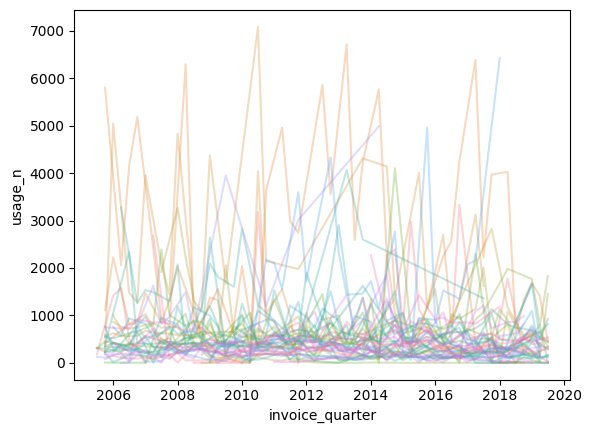

In [186]:
temp = df_train.query('(fraud == False)').sample(n=50)['client_id']

ax = sns.lineplot(data=df_train[df_train['client_id'].isin(temp)], x='invoice_quarter', y='usage_n', hue='client_id', errorbar=None, legend=None)
plt.setp(ax.lines, alpha=.3)
plt.show()

In [ ]:
temp = df_train.query('(fraud == True)').sample(n=50)['client_id']

col_names = ['mtr_type', 'invoice_quarter']
temp = (df_client[df_client['client_id'] == client_id].groupby(col_names, observed=False)['usage_n'].agg(['mean', 'median', 'sum']).reset_index())


ax = sns.lineplot(data=df_train[df_train['client_id'].isin(temp)], x='invoice_quarter', y='usage_n', hue='client_id', errorbar=None, legend=None)
plt.setp(ax.lines, alpha=.3)
plt.show()

In [ ]:
temp = df_train.query('(fraud == True)').sample(n=50)['client_id']
temp['usage_n_sum'] = temp['usage_n'].cu
ax = sns.lineplot(data=df_train[df_train['client_id'].isin(temp)], x='invoice_quarter', y='usage_n', hue='client_id', errorbar=None, legend=None)
plt.setp(ax.lines, alpha=.3)
plt.show()

There is a lot of variability in these examples. It is very difficult to discern for any of these.

Going to have a quick look at what a classifier thinks. Will use delta of mean | median vs agg_fraud and agg_not_fraud. Will leave empty quarters in this simple case, and use a model that can tolerate empty values. Will have a count of 'mtr_id', keep district, region, and client_type. There is of course a lot more to look at also.

In [208]:
col_names = ['client_id', 'mtr_type', 'invoice_quarter']
df_temp = df_train.groupby(col_names, observed=False).agg(usage_mean=('usage_n', 'mean'),
                                                       usage_median=('usage_n', 'median')).reset_index()
df_temp = df_temp.pivot(
    index=['client_id'],  # Columns to keep as the index
    columns=['mtr_type', 'invoice_quarter'],       # Column to pivot
    values=['usage_mean', 'usage_median']  # Values to spread across columns
)
df_temp

usage_mean                                              \
mtr_type                 ELEC                                               
invoice_quarter    2005-04-01 2005-07-01 2005-10-01 2006-01-01 2006-04-01   
client_id                                                                   
train_Client_0            NaN        NaN      124.0      141.0      162.0   
train_Client_1            NaN        NaN      551.0      564.0      522.0   
train_Client_10           NaN        NaN      459.0        NaN      931.0   
train_Client_100          NaN        NaN        0.0        0.0        0.0   
train_Client_1000         NaN        NaN        NaN        NaN        NaN   
...                       ...        ...        ...        ...        ...   
train_Client_99994        NaN        9.0        NaN        NaN        7.0   
train_Client_99995        NaN        NaN        0.0        0.0        0.0   
train_Client_99996        NaN        NaN        NaN        NaN        NaN   
train_Client_99997        NaN        NaN        NaN        NaN        NaN   
train_Client_99998        NaN      535.0      206.0        NaN        NaN   

                                                                           \
mtr_type                                                                    
invoice_quarter    2006-07-01 2006-10-01 2007-01-01 2007-04-01 2007-07-01   
client_id                                                                   
train_Client_0            NaN      159.0      182.0      240.0        NaN   
train_Client_1            NaN      565.0      514.0      507.0        NaN   
train_Client_10           NaN        NaN        NaN     1355.0        NaN   
train_Client_100          NaN        0.0        1.0        0.0        NaN   
train_Client_1000         NaN        NaN        NaN        NaN        NaN   
...                       ...        ...        ...        ...        ...   
train_Client_99994        NaN        0.0        NaN       30.0        NaN   
train_Client_99995        NaN        0.0        NaN        0.0        NaN   
train_Client_99996        NaN        NaN        NaN        NaN        NaN   
train_Client_99997        NaN        NaN        NaN        NaN        NaN   
train_Client_99998        NaN        NaN        NaN        NaN        NaN   

                    ... usage_median                                   \
mtr_type            ...          GAZ                                    
invoice_quarter     ...   2017-04-01 2017-07-01 2017-10-01 2018-01-01   
client_id           ...                                                 
train_Client_0      ...          NaN        NaN        NaN        NaN   
train_Client_1      ...          NaN        NaN        NaN        NaN   
train_Client_10     ...          NaN        NaN        NaN        NaN   
train_Client_100    ...          NaN        NaN        NaN        NaN   
train_Client_1000   ...          NaN        NaN        NaN        NaN   
...                 ...          ...        ...        ...        ...   
train_Client_99994  ...          NaN        NaN        NaN        NaN   
train_Client_99995  ...          0.0        NaN        0.0        0.0   
train_Client_99996  ...         94.0        NaN       82.0      170.0   
train_Client_99997  ...          NaN        NaN        NaN        NaN   
train_Client_99998  ...          NaN        NaN        NaN        NaN   

                                                                           \
mtr_type                                                                    
invoice_quarter    2018-04-01 2018-07-01 2018-10-01 2019-01-01 2019-04-01   
client_id                                                                   
train_Client_0            NaN        NaN        NaN        NaN        NaN   
train_Client_1            NaN        NaN        NaN        NaN        NaN   
train_Client_10           NaN        NaN        NaN        NaN        NaN   
train_Client_100          NaN        NaN        NaN        NaN        Na

This feels way too sparse; going to look at using relative dates, going back 5 years. This should bring it down (5yr x 4Q x 2Metrics x 2Energy) + 4Client_Info ~ 84 (vs current 200+)

In [210]:
df_temp.columns = [f"{stat}_{mtr_type}_{quarter}" for stat, mtr_type, quarter in df_temp.columns]
df_temp = df_temp.reset_index()
df_temp = df_temp.merge(df_train.groupby(['client_id'], observed=False).agg({'district' : 'first', 'region' : 'first', 'client_type' : 'first', 'start_date' : 'first', 'mtr_type' : 'nunique', 'fraud' : 'first'}), on='client_id', how='left')


In [220]:
df_temp.iloc[:,np.r_[0:236, 237]]

client_id  usage_mean_ELEC_2005-04-01 00:00:00  \
0           train_Client_0                                  NaN   
1           train_Client_1                                  NaN   
2          train_Client_10                                  NaN   
3         train_Client_100                                  NaN   
4        train_Client_1000                                  NaN   
...                    ...                                  ...   
128168  train_Client_99994                                  NaN   
128169  train_Client_99995                                  NaN   
128170  train_Client_99996                                  NaN   
128171  train_Client_99997                                  NaN   
128172  train_Client_99998                                  NaN   

        usage_mean_ELEC_2005-07-01 00:00:00  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
128168                                  9.0   
128169                                  NaN   
128170                                  NaN   
128171                                  NaN   
128172                                535.0   

        usage_mean_ELEC_2005-10-01 00:00:00  \
0                                     124.0   
1                                     551.0   
2                                     459.0   
3                                       0.0   
4                                       NaN   
...                                     ...   
128168                                  NaN   
128169                                  0.0   
128170                                  NaN   
128171                                  NaN   
128172                                206.0   

        usage_mean_ELEC_2006-01-01 00:00:00  \
0                                     141.0   
1                                     564.0   
2                                       NaN   
3                                       0.0   
4                                       NaN   
...                                     ...   
128168                                  NaN   
128169                                  0.0   
128170                                  NaN   
128171                                  NaN   
128172                                  NaN   

        usage_mean_ELEC_2006-04-01 00:00:00  \
0                                     162.0   
1                                     522.0   
2                                     931.0   
3                                       0.0   
4                                       NaN   
...                                     ...   
128168                                  7.0   
128169                                  0.0   
128170                                  NaN   
128171                                  NaN   
128172                                  NaN   

        usage_mean_ELEC_2006-07-01 00:00:00  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
128168                                  NaN   
128169                                  NaN   
128170                                  NaN   
128171                                  NaN   
128172                                  NaN   

        usage_mean_ELEC_2006-10-01 00:00:00  \
0                                     159.0   
1                                     565.0   
2                                       NaN   
3                                       0.0   
4                                       NaN   
...                                     ...   
128168                                  0.0   
128169     

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_temp.iloc[:,np.r_[1:236, 237]], df_temp['fraud'], test_size=0.20, random_state=42, stratify=df_temp['fraud']) # Skip start_date for now

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [225]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9408621025941096


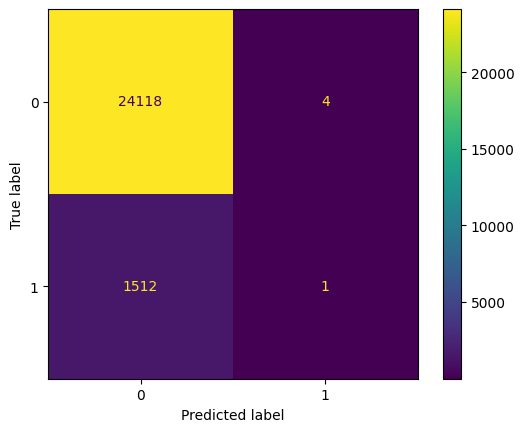

In [226]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
df_full['quantity_mean'] = df_full['quantity_mean'].interpolate(method='linear')
df_full['quantity_median'] = df_full['quantity_median'].interpolate(method='linear')

mtr_type  fraud invoice_quarter        mean  P05      Q1  median      Q3  \
0       ELEC  False      2005-04-01  752.268437  0.0   27.25   301.0  643.00   
1       ELEC  False      2005-07-01  824.509679  0.0  189.00   427.0  750.00   
2       ELEC  False      2005-10-01  574.639034  0.0  214.00   422.0  666.00   
3       ELEC  False      2006-01-01  702.932575  0.0  213.00   452.0  768.00   
4       ELEC  False      2006-04-01  652.873007  0.0  214.00   427.0  711.00   
..       ...    ...             ...         ...  ...     ...     ...     ...   
227      GAZ   True      2018-07-01  184.932931  0.0   26.00    82.0  144.00   
228      GAZ   True      2018-10-01  209.963197  0.0   24.00    77.0  137.50   
229      GAZ   True      2019-01-01  342.227857  0.0   61.75   160.0  339.00   
230      GAZ   True      2019-04-01  306.475480  0.0   50.00   129.0  284.00   
231      GAZ   True      2019-07-01  260.343619  0.0   29.00    93.0  184.25   

         P95          std  
0    3254.00  1807.132107  
1    2716.40  2134.898277  
2    1512.45  1001.286780  
3    1987.95  1439.583668  
4    1871.00  1306.652474  
..       ...          ...  
227   786.30   435.205640  
228   693.00   704.397978  
229  1214.35   786.203848  
230  1294.60   594.506874  
231  1065.15   782.848727  

[232 rows x 10 columns]

In [ ]:
fig, ax = plt.subplots()

mask = (temp['mtr_type'] == 'ELEC') & (temp['fraud'] == True)
stats = [
    dict(med=temp[mask]['median'].iloc[0], q1=temp[mask]['Q1'].iloc[0], q3=temp[mask]['Q3'].iloc[0], whislo=temp[mask]['P05'].iloc[0], whishi=temp['P95'].iloc[0], fliers=[], label='2005Q2'),
    dict(med=temp[mask]['median'].iloc[1], q1=temp[mask]['Q1'].iloc[1], q3=temp[mask]['Q3'].iloc[1], whislo=temp[mask]['P05'].iloc[1], whishi=temp['P95'].iloc[1], fliers=[], label='2005Q3'),
    dict(med=temp[mask]['median'].iloc[2], q1=temp[mask]['Q1'].iloc[2], q3=temp[mask]['Q3'].iloc[2], whislo=temp[mask]['P05'].iloc[2], whishi=temp['P95'].iloc[2], fliers=[], label='2005Q4'),
]

ax.bxp(stats, patch_artist=True, boxprops={'facecolor': 'bisque'})

plt.show()

In [ ]:
temp.boxplot(column='median', by='invoice_quarter', grid=False, showmeans=True)
#plt.xlim(0, 50000)

In [ ]:
plt.figure(figsize=(10, 6))

mask = (temp['mtr_type'] == 'ELEC') & (temp['fraud'] == False)
sns.lineplot(x=temp[mask]['invoice_quarter'].astype(str), y=temp[mask]['mean'])

mask = (temp['mtr_type'] == 'ELEC') & (temp['fraud'] == True)
sns.lineplot(x=temp[mask]['invoice_quarter'].astype(str), y=temp[mask]['mean'])

#
# Customize the plot
#plt.title("Usage over Time for Selected Groups Flagged Fraud")
#plt.xlabel("Invoice Quarter")
#plt.ylabel("Usage (usage_n)")
#plt.legend(title="Groups")
#plt.xticks(rotation=45)
#plt.tight_layout()

#plt.show()

In [ ]:
df_train['invoice_quarter'] = df_train['invoice_date'].dt.to_period('Q')

col_names = ['client_id', 'mtr_id', 'mtr_tariff']
df_train.groupby(col_names+['invoice_quarter'])['usage_n'].agg(['first', 'sum']).reset_index()
#summary_stats = df_train.groupby(['client_id', 'quarter'])['quantity'].agg(['mean', 'median']).reset_index()
#
# Optional: Rename the columns for clarity
#summary_stats.columns = ['client_id', 'quarter', 'quantity_mean', 'quantity_median']
#
# Display the result
#print(summary_stats)

In [ ]:
col_names = ['client_id', 'mtr_id', 'mtr_tariff']
mask = df_train[df_train['fraud'] == 1][col_names].value_counts().reset_index(name='group_size')
mask = mask.nlargest(10, 'group_size')
df_temp = df_train.merge(mask[col_names], on=col_names)

plt.figure(figsize=(10, 6))

# Iterate through each of the top groups
for _, group in mask.iterrows():
    grp_mask = (df_temp[col_names] == group[col_names].values).all(axis=1)
    grp_data = df_temp[grp_mask]
    # Plot the line for each group
    sns.lineplot(x='invoice_date', y='usage_n', data=grp_data, label=f"Group {group[col_names].values}")

# Customize the plot
plt.title("Usage over Time for Selected Groups Flagged Fraud")
plt.xlabel("Invoice Date")
plt.ylabel("Usage (usage_n)")
plt.legend(title="Groups")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
col_names = ['client_id', 'mtr_id', 'mtr_tariff']
mask = df_train[df_train['fraud'] == 0][col_names].value_counts().reset_index(name='group_size')
mask = mask.nlargest(10, 'group_size')
df_temp = df_train.merge(mask[col_names], on=col_names)

plt.figure(figsize=(10, 6))

# Iterate through each of the top groups
for _, group in mask.iterrows():
    grp_mask = (df_temp[col_names] == group[col_names].values).all(axis=1)
    grp_data = df_temp[grp_mask]
    # Plot the line for each group
    sns.lineplot(x='invoice_date', y='usage_n', data=grp_data, label=f"Group {group[col_names].values}")

# Customize the plot
plt.title("Usage over Time for Selected Groups not Flagged Fraud")
plt.xlabel("Invoice Date")
plt.ylabel("Usage (usage_n)")
plt.legend(title="Groups")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
df_temp = df_train[['mtr_tariff', 'mtr_code']].value_counts().reset_index()
df_temp = df_temp.pivot(index='mtr_tariff', columns='mtr_code', values='count').fillna(0)

plt.figure(figsize=(10, 8))
sns.heatmap(df_temp, cmap='viridis', annot=True, fmt='.0f')
plt.title("Heatmap of Counts by mtr_tariff and mtr_code")
plt.xlabel("mtr_code")
plt.ylabel("mtr_tariff")
plt.show()
#sns.scatterplot(y=df_train['mtr_code'], x=df_train['mtr_tariff'])

In [ ]:
#col_names = ['mtr_status', 'mtr_code', 'mtr_notes', 'mtr_coef']
contingency_table = pd.crosstab(df_train['mtr_code'], df_train['mtr_tariff'])

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Relationship Between mtr_code and mtr_tariff")
plt.xlabel("Category2")
plt.ylabel("Category1")
plt.show()

Remaining rows with issues:

In [ ]:
mask = df_train['mtr_val_new_calc'] != df_train['mtr_val_new']
df_temp = df_train[mask]
df_temp

In [ ]:
df_train['mtr_stuck_flag'] = (df_train['mtr_val_new_calc'] != df_train['mtr_val_new']) & (df_temp['mtr_val_old'] == df_temp['mtr_val_new'])
df_train['usage_stuck_flag'] = (df_train['mtr_val_new_calc'] != df_train['mtr_val_new']) & (df_temp['usage_n'] == 0)

About half have meter not updating:

In [ ]:
mask = df_temp['mtr_val_old'] != df_temp['mtr_val_new']
df_temp = df_temp[mask]
df_temp

In [ ]:
mask = df_temp['usage_n'] > 0
df_temp[mask]

Checking if these changes worked: ((Sum of usage) / mtr_coef) == diff(mtr_val_new, mtr_val_old)

In [ ]:
mask = (df_train['mtr_val_new'] - ((df_train[['usage_1', 'usage_2', 'usage_3', 'usage_4']].sum(axis=1) / df_train['mtr_coef']) + df_train['mtr_val_old'])) != 0
df_train[mask][col_names]

In [ ]:
df_temp = df_train[['start_date', 'invoice_date', 'mtr_tariff', 'mtr_id', 'mtr_code']].copy()
df_temp['id_len'] = df_temp['mtr_id'].astype(str).str.len()
df_temp['code_len'] = df_temp['mtr_code'].astype(str).str.len()
df_temp['sum'] = df_temp['mtr_id'] + df_temp['mtr_code']

In [ ]:
df_temp.iloc[:,3]

In [ ]:
df_train['mtr_code'].value_counts()

In [ ]:
df_train[mask][['mtr_coef', 'usage_1']].value_counts().sort_index()

For these, it seems as though 'mtr_coef' was accidently split due to decimal point.

In [ ]:
df_train[df_train['client_id'] == 'train_Client_53725']

rule 1: IF L4: L3 = L1 & L2 = L1/2

In [ ]:
mask_L4 = df_train['usage_4'] > 0
print((mask_L4.sum()))
mask_L4_L3 = df_train['usage_3'][mask_L4] != df_train['usage_1'][mask_L4]
df_train[['client_id', 'mtr_id', 'mtr_code', 'mtr_tariff', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'fraud']][mask_L4][mask_L4_L3]

For these, it seems as through 

In [ ]:
mask_L4_L2 = df_train['usage_2'][mask_L4] * 2 != df_train['usage_1'][mask_L4]
df_train[['client_id', 'mtr_id', 'mtr_code', 'mtr_tariff', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'fraud']][mask_L4][mask_L4_L2]

This rule is broken 102 / 92958 times.

rule 2: IF L3: L2 = L1/2

In [ ]:
mask_L3 = df_train['usage_3'] > 0
print((mask_L3.sum()))
mask_L3_L2 = df_train['usage_2'][mask_L3] * 2 != df_train['usage_1'][mask_L3]
df_train[['client_id', 'mtr_id', 'mtr_code', 'mtr_tariff', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'fraud']][mask_L3][mask_L3_L2]

In [ ]:
df_train['usage_1'][mask_L3][mask_L3_L2].unique()

This rule is broken 422 / 183358

rule 3: IF L2: L1 = L1_Max (% 50 == TRUE)

In [ ]:
mask_L2 = df_train['usage_2'] > 0
print((mask_L2.sum()))
mask_L2_L1 = df_train['usage_1'][mask_L2] % 50 != 0
df_train[['client_id', 'mtr_id', 'mtr_code', 'mtr_tariff', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'fraud']][mask_L2][mask_L2_L1]

In [ ]:
df_train['usage_1'][mask_L2][mask_L2_L1].unique()

This rule is broken 1305 / 660570

Rule 4: IF L2 & L1 < 10: Cannot rely on L1 relationships.

These rules can circumstantially tell us which Ln are being used, and if it is capped. If the expected cap is not yet exceeded, it would not know.
There is some further information based on the tariff_type.  

Rule 5: IF T_T == 10 | 11: L3 & L4 Possible
Rule 6: IF T_T == 10 | 11 | 40 | 45: L2 Possible
Else: Only L1 Possible

In [ ]:
print((mask_L2.sum()))
df_train[['client_id', 'mtr_id', 'mtr_code', 'mtr_tariff', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'fraud']][mask_L2 & ~(df_train['mtr_tariff'].isin([10, 11, 40, 45]))]

In [ ]:
print((mask_L3.sum()))
df_train[['client_id', 'mtr_id', 'mtr_code', 'mtr_tariff', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'fraud']][mask_L3 & ~(df_train['mtr_tariff'].isin([10, 11]))]

In [ ]:
(df_train['usage_3'][mask_L4] < 100).sum()

There remains: "mtr_code", "mtr_status", "mtr_notes" and "mtr_coef" to understand.

mtr_code does not seem to give anything extra on this topic beyond tariff_type. 
mtr_coef is said to be added when standard consumption is exceeded, however, it is very very rarely used.
It is also difficult to determine the logic in its application.

In [ ]:
contingency_table = pd.crosstab(df_train['mtr_code'], df_train['mtr_tariff'])

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Relationship Between mtr_code and mtr_tariff")
plt.xlabel("Category2")
plt.ylabel("Category1")
plt.show()

In [ ]:
sns.scatterplot(x=df_train['mtr_code'], y=df_train['mtr_tariff'])

There is clearly a link between tariff_type and mtr_code. But I cannot understand it programmatically.

In [ ]:
df_train[df_train['mtr_tariff'] == 45].boxplot(column='usage_1', by='mtr_code', grid=False, showmeans=True, vert = False)
plt.ylim(4, 9)
plt.xlim(0, 50000)

In [ ]:
df_train[df_train['mtr_tariff'] == 45].boxplot(column='usage_2', by='mtr_code', grid=False, showmeans=True, vert = False)
plt.ylim(4, 9)

In [ ]:
contingency_table

In [ ]:
print(df_train['mtr_tariff'].nunique())
print(df_train['mtr_code'].nunique())

In [ ]:
df_train[['mtr_tariff', 'mtr_code']].value_counts()

In [ ]:
df_temp = df_train.groupby(['mtr_coef','fraud']).agg({'client_id': 'nunique'})

df_temp = df_temp.reset_index().pivot(index='mtr_coef', columns='fraud', values='client_id').fillna(0)

df_temp.index = df_temp.index.astype(str)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_temp.index, df_temp[1], label='Fraud = 1', color = "red")
plt.bar(df_temp.index, df_temp[0], bottom=df_temp[1], label='Fraud = 0', color = "lightgreen")
plt.legend()
plt.ylim(0, 25)

In [ ]:
df_temp = df_train.groupby(['mtr_coef','fraud']).agg({'client_id': 'nunique'})

df_temp = df_temp.reset_index().pivot(index='mtr_coef', columns='fraud', values='client_id').fillna(0)

df_temp.index = df_temp.index.astype(str)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_temp.index, 100*df_temp[1]/(df_temp[0] + df_temp[1]), label='Fraud = 1', color = "red")
plt.bar(df_temp.index, 100*df_temp[0]/(df_temp[0] + df_temp[1]), bottom=100*df_temp[1]/(df_temp[0] + df_temp[1]), label='Fraud = 0', color = "lightgreen")
plt.legend()
plt.ylim(0, 100)

In [ ]:
df_temp.sum()

Hard to know what to do with this. This will pretty much assume mtr_coef > 1 == No Fraud with only 2 / 1646 breaking this rule.
135,459 / 143,028 are mtr_coef = 1; there is not enough data on the others to know conclude anything, even if proportionally they seem significant.
(Going to condense to 0 | 1 | Other. Do this later.)

In [ ]:
df_temp = df_train.groupby(['mtr_notes','fraud']).agg({'client_id': 'nunique'})

df_temp = df_temp.reset_index().pivot(index='mtr_notes', columns='fraud', values='client_id').fillna(0)

df_temp.index = df_temp.index.astype(str)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_temp.index, df_temp[1], label='Fraud = 1', color = "red")
plt.bar(df_temp.index, df_temp[0], bottom=df_temp[1], label='Fraud = 0', color = "lightgreen")

plt.legend()
plt.ylim(0, 50)

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_temp.index, 100*df_temp[1]/(df_temp[0] + df_temp[1]), label='Fraud = 1', color = "red")
plt.bar(df_temp.index, 100*df_temp[0]/(df_temp[0] + df_temp[1]), bottom=100*df_temp[1]/(df_temp[0] + df_temp[1]), label='Fraud = 0', color = "lightgreen")

plt.legend()
plt.ylim(0, 100)

Looking at mtr_notes: there is not enough of 5 | 203 | 207 | 413 to conclude anything. However, 6 | 7 | 8 | 9 do seem relevant. From these, 7 seems quite different to the other three.
(Going to condense to 6 | 7 | 8 | 9 | Other. Do this later.)

In [ ]:
df_temp = df_train[df_train['mtr_notes'].isin([6, 7, 8, 9])]
df_temp = df_temp[df_temp['mtr_coef'].isin([0, 1, 5, 10])]
df_temp['mtr_notes'] = df_temp['mtr_notes'].astype(int)
df_temp['mtr_coef'] = df_temp['mtr_coef'].astype(int)

In [ ]:
df_temp.groupby(['mtr_coef', 'mtr_notes','fraud']).agg({'client_id': 'nunique'})

Quick check to see no interlink between coef and notes: does not seem to be.

In [ ]:
df_temp = df_train.groupby(['mtr_status','fraud']).agg({'client_id': 'nunique'})

df_temp = df_temp.reset_index().pivot(index='mtr_status', columns='fraud', values='client_id').fillna(0)

df_temp.index = df_temp.index.astype(str)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_temp.index, df_temp[1], label='Fraud = 1', color = "red")
plt.bar(df_temp.index, df_temp[0], bottom=df_temp[1], label='Fraud = 0', color = "lightgreen")

plt.legend()
plt.ylim(0, 5000)

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_temp.index, 100*df_temp[1]/(df_temp[0] + df_temp[1]), label='Fraud = 1', color = "red")
plt.bar(df_temp.index, 100*df_temp[0]/(df_temp[0] + df_temp[1]), bottom=100*df_temp[1]/(df_temp[0] + df_temp[1]), label='Fraud = 0', color = "lightgreen")

plt.legend()
plt.ylim(0, 100)

In [ ]:
df_temp = df_train[df_train['mtr_notes'].isin([6, 7, 8, 9])]
df_temp['mtr_status'] = df_temp['mtr_status'].astype(str)
df_temp = df_temp[df_temp['mtr_status'].isin(['0', '1', '2', '3', '4', '5'])]
df_temp['mtr_notes'] = df_temp['mtr_notes'].astype(int)

df_temp = df_temp[['client_id', 'mtr_id', 'fraud','mtr_notes', 'mtr_status']]

Getting summed energy usage per row shows quite clearly the intended interpretation of mtr_val_old and mtr_val_new. 

In [ ]:
df_train['usage_n'] = df_train[['usage_1', 'usage_2', 'usage_3', 'usage_4']].sum(axis=1) / df_train['mtr_coef'].astype(int)

In [ ]:
df_train[((df_train['mtr_val_new'] - df_train['mtr_val_old']) - df_train['usage_n']) != 0]

In the cases where it is not true, what do we see?

In [ ]:
df_temp = df_train[((df_train['mtr_val_new'] - df_train['mtr_val_old']) - df_train['usage_n']) != 0]
len(df_temp)

One edge case is max digit roll-over: 

In [ ]:
df_temp[(df_temp['mtr_val_old'] > 900000) & (df_temp['mtr_val_new'] < 50000)]

In [ ]:
mask = ((df_temp['mtr_val_old'] > 900000) & (df_temp['mtr_val_new'] < 50000))
((df_temp['mtr_val_old'][mask] + df_temp['usage_n'][mask]) - (df_temp['mtr_val_new'][mask] + 1000000))

Seems like there is data corruption here. I do not know for certain, but it seems like a data entry issue when mtr_coef had a decimal. For example: 1.3 became 1 and 3. With the 3 offsetting the rest of the data.

In [ ]:
col_names = ['mtr_coef', 'usage_1', 'usage_2', 'usage_3', 'usage_4', 'mtr_val_old', 'mtr_val_new', 'months_num', 'usage_n']
mask = (df_temp['usage_1'] < 10) & (df_temp['usage_2'] > 0) 
df_temp[col_names][mask]

In [ ]:
mask_2 = abs(df_temp['months_num'][mask] - (((df_temp[['usage_2', 'usage_3', 'usage_4', 'mtr_val_old']][mask].sum(axis=1)) / (df_temp['mtr_coef'][mask].astype(int) + (df_temp['usage_1'][mask] / 10))) + df_temp['mtr_val_new'][mask])) > 1

In [ ]:
df_temp[['mtr_tariff', 'mtr_id', 'mtr_status', 'mtr_code', 'mtr_notes']+col_names][mask][mask_2]

Look at the roll over again for this subset

In [ ]:
mask_3 = ((df_temp['mtr_val_new'][mask][mask_2] > 60000) & (df_temp['months_num'][mask][mask_2] < 50000))
#((df_temp['mtr_val_old'][mask] + df_temp['usage_n'][mask]) - (df_temp['mtr_val_new'][mask] + 1000000))
df_temp[['mtr_tariff', 'mtr_id', 'mtr_status', 'mtr_code', 'mtr_notes']+col_names][mask][mask_2][mask_3]

In [ ]:
df_train['mtr_coef'].value_counts()

In [ ]:
df_train['mtr_notes'].value_counts()

Going to assume 6-9 are intended to be here. The rest are perhaps from code which has many more 203, 413, 207, and 5. Code is 0 33 times, these values sum to 34.

In [ ]:
df_train['mtr_code'].value_counts()

In [ ]:
df_train[df_train['mtr_code'] == 0][['client_id', 'mtr_tariff', 'mtr_id', 'mtr_status', 'mtr_code', 'mtr_notes']+col_names]

In [ ]:
df_pivot = df_temp.groupby(['mtr_notes','mtr_status','fraud']).agg({'client_id': 'nunique'})

df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.pivot(index=['mtr_notes', 'mtr_status'], columns='fraud', values='client_id').fillna(0)

df_pivot

# Rename columns for clarity (Fraud = 0 and Fraud = 1)
df_pivot.columns = ['Not_Fraud', 'Fraud']

# Calculate proportions
df_pivot['Fraud_Proportion'] = df_pivot['Fraud'] / (df_pivot['Fraud'] + df_pivot['Not_Fraud']) * 100
df_pivot['Not_Fraud_Proportion'] = df_pivot['Not_Fraud'] / (df_pivot['Fraud'] + df_pivot['Not_Fraud']) * 100

# Reset index to make it easier to read or plot
df_pivot.reset_index(inplace=True)

df_pivot


There are differences in the proportions when considering notes and status.

Looking at a client record set would look like

In [ ]:
df_temp = df_train[df_train['client_id'] == "train_Client_1"]
df_temp = df_temp.sort_values(by='invoice_date') 

In [ ]:
df_temp

Trying to understand months_num

In [ ]:
pd.concat([df_temp['invoice_date'].diff(), df_temp['months_num']*30, df_temp['invoice_date'].diff(periods=-1)], axis=1)

In [ ]:
df_train['months_num'].value_counts().head(60)

There is seemingly a link between old_idx | new_idx and in places months_num. Sometimes, like a linked list. Not sure what to do with these for now. Temporarily will ignore.
I am worried these are an unreliable features and artifacts of how the data was retrieved.

In [ ]:
#plt.pyplot.boxplot(df_train['mtr_code'], df_train['usage_lev_4'])
df_train.boxplot(column='old_idx', by='fraud', grid=False, showmeans=True, vert = False)
plt.xlim(0, 100000)

In [ ]:
#plt.pyplot.boxplot(df_train['mtr_code'], df_train['usage_lev_4'])
df_train.boxplot(column='new_idx', by='fraud', grid=False, showmeans=True, vert = False)
plt.xlim(0, 100000)

In [ ]:
df_temp = pd.concat([df_train['new_idx'] - df_train['old_idx'], df_train['fraud']], axis=1)

In [ ]:
df_temp

In [ ]:
df_temp.boxplot(by = 'fraud')

In [ ]:
print(df_train['client_id'].nunique())
print(df_train['invoice_date'].min())
print(df_train['invoice_date'].max())

135.5k Clients between 1977 - 2020.

Might be useful to have a measure of normalised usage

It seems as though the usage is more dependent on the months_num that the difference in invoice date. This is an issue because, months_num seems inconsistent

In [ ]:
#df_temp = df_train[(df_train['client_id'] == "train_Client_135089") & (df_train['mtr_id'] == 205552)] # train_Client_123007
df_temp = df_train[(df_train['client_id'] == "train_Client_130431") & (df_train['mtr_id'] == 521409)] 


df_temp = df_temp.sort_values(by='invoice_date')
len(df_temp)

In [ ]:
df_temp['usage_n'] = df_temp[['usage_1', 'usage_2', 'usage_3', 'usage_4']].sum(axis=1)
df_temp['usage_N'] = df_temp['usage_n'].cumsum()
df_temp['invoice_date_d'] = df_temp['invoice_date'].diff().fillna(pd.Timedelta(seconds=0))
df_temp['usage_n_daily'] = df_temp['usage_n'] / df_temp['invoice_date_d'].dt.days
df_temp['usage_n_mnum'] = df_temp['usage_n'] / (df_temp['months_num'] * 30)
df_temp['m_num'] = df_temp['months_num']

In [ ]:
col_names = ['invoice_date', 'mtr_id', 'mtr_code', 'mtr_tariff', 'old_idx', 'new_idx', 'months_num', 'usage_n', 'usage_N', 'invoice_date_d', 'usage_n_daily', 'usage_n_mnum', 'fraud']
df_temp[col_names]

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(df_temp[0], df_temp[1], label='Fraud = 1', color = "red")
#plt.bar(df_temp.index, df_temp[0], bottom=df_temp[1], label='Fraud = 0', color = "lightgreen")

plt.legend()
plt.ylim(0, 5000)

In [ ]:
#df_temp[['mtr_notes', 'mtr_status', 'fraud']].value_counts().sort_index()

(df_temp[df_temp['fraud'] == 0][['mtr_notes', 'mtr_status']].value_counts().sort_index() +
                                                                                           df_temp[df_temp['fraud'] == 1][['mtr_notes', 'mtr_status']].value_counts().sort_index())

In [ ]:
df_train[['fraud', 'mtr_notes']].value_counts()

In [ ]:
df_train.groupby(['client_id', 'mtr_id']).agg({'mtr_coef' : 'nunique', 'fraud' : 'nunique'}).value_counts()

In [ ]:
df_train[['client_id', 'mtr_id', 'mtr_coef']][df_train['mtr_coef'] != 1].value_counts().sort_index().head(60)

In [ ]:
df_train[['usage_1', 'usage_2', 'usage_3', 'usage_4']].describe()

In [ ]:
df_train['months_num']

In [ ]:
print(f"Months Number: Min: {df_train['months_num'].min()}, Max: {df_train['months_num'].max()}", end="")

In [ ]:
df_train['months_num'].value_counts()

In [ ]:
df_train['months_num'][df_train['months_num'] > 12].value_counts()

In [ ]:
plt.pyplot.hist(df_train['months_num'][(df_train['months_num'] > 12) & (df_train['months_num'] < 60)])

In [ ]:
# Testing to see if it is related to count of months they've been customer
((df_train['invoice_date'].dt.year - df_train['creation_date'].dt.year) * 12) + (df_train['invoice_date'].dt.month - df_train['creation_date'].dt.month)

In [ ]:
df_train['months_num']

It's is really unclear what months_num is meant to represent...

It is similarly unclear what "old_idx" and "new_idx" are meant to represent.

In [ ]:
df_train.head()

In [ ]:
col_names = ['mtr_coef', 'usage_lev_1', 'usage_lev_2', 'usage_lev_3', 'usage_lev_4', 'target', 'tariff_type', 'mtr_status']
df_train[col_names].head()

In [ ]:
plt.pyplot.hist(df_train[['usage_lev_1', 'usage_lev_2', 'usage_lev_3', 'usage_lev_4']])

In [ ]:
df_train['mtr_coef'][df_train['mtr_coef'] != 1]

In [ ]:
sum(df_train['usage_lev_4'][df_train['mtr_coef'] != 1])

In [ ]:
col_names = ['mtr_coef', 'usage_lev_1', 'usage_lev_2', 'usage_lev_3', 'usage_lev_4', 'target', 'tariff_type', 'mtr_status', 'mtr_code', 'counter_type']
df_temp = df_train[col_names]
df_temp[(df_temp['usage_lev_2'] > 0) | (df_temp['usage_lev_3'] > 0) | (df_temp['usage_lev_4'] > 0)]

Trying to get a better sense of what the usage levels mean

In [ ]:
df_temp = df_train[(df_train['usage_lev_1'] % 100 == 0)]

In [ ]:
temp = df_temp['usage_lev_1'].value_counts()

In [ ]:
temp[temp > 3]

In [ ]:
df_train['mtr_coef'].value_counts()

In [ ]:
#plt.pyplot.boxplot(df_train['mtr_code'], df_train['usage_lev_4'])
df_train[df_train['usage_lev_4'] > 0].boxplot(column='usage_lev_4', by='mtr_code', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 100000)

In [ ]:
df_train[df_train['usage_lev_3'] > 0].boxplot(column='usage_lev_3', by='mtr_code', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 10000)

In [ ]:
df_train[df_train['usage_lev_2'] > 0].boxplot(column='usage_lev_2', by='mtr_code', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 50000)

In [ ]:
df_train[df_train['usage_lev_1'] > 0].boxplot(column='usage_lev_1', by='mtr_code', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 50000)

In [ ]:
#plt.pyplot.boxplot(df_train['mtr_code'], df_train['usage_lev_4'])
df_train[df_train['usage_lev_4'] > 0].boxplot(column='usage_lev_4', by='tariff_type', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 10000)

In [ ]:
#plt.pyplot.boxplot(df_train['mtr_code'], df_train['usage_lev_4'])
df_train[df_train['usage_lev_3'] > 0].boxplot(column='usage_lev_3', by='tariff_type', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 10000)

In [ ]:
#plt.pyplot.boxplot(df_train['mtr_code'], df_train['usage_lev_4'])
df_train[df_train['usage_lev_2'] > 0].boxplot(column='usage_lev_2', by='tariff_type', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 10000)

In [ ]:
#plt.pyplot.boxplot(df_train['mtr_code'], df_train['usage_lev_4'])
df_train.boxplot(column='usage_lev_1', by='tariff_type', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 10000)

In [ ]:
df_train.boxplot(column='mtr_code', by='tariff_type', grid=False, showmeans=True, vert = False)

In [ ]:
df_train[df_train['usage_lev_4'] > 0].boxplot(column='usage_lev_4', by='client_type', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 100000)

In [ ]:
df_train[df_train['usage_lev_3'] > 0].boxplot(column='usage_lev_3', by='client_type', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 100000)

In [ ]:
#df_train.boxplot(column='invoice_date', by='target', grid=False, showmeans=True, vert = False)
#pd.to_timedelta(df_train['invoice_date']).dt.total_seconds()
df_temp = df_train[['invoice_date', 'target']]
df_temp['invoice_date'] = (df_temp['invoice_date'] - pd.to_datetime('1980', format='%Y')).dt.total_seconds()
df_temp.boxplot(column='invoice_date', by='target', grid=False, showmeans=True, vert = False)

In [ ]:
df_train[df_train['usage_lev_2'] > 0].boxplot(column='usage_lev_2', by='client_type', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 100000)

In [ ]:
df_train[['tariff_type', 'client_type']].value_counts()

In [ ]:
df_train[df_train['usage_lev_1'] > 0].boxplot(column='usage_lev_1', by='client_type', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 100000)

In [ ]:
df_train[df_train['tariff_type'] == 10][['tariff_type', 'mtr_code']].value_counts()

In [ ]:
df_train.groupby('target').agg({'invoice_date': ['min', 'max']})

In [ ]:
#df_train.groupby('target').agg({'client_id': ['nunique', 'count']})




pd.merge(df_train['client_id'][df_train['target'] == 1], df_train['client_id'][df_train['target'] == 0], how = 'inner')

In [ ]:
(df_train.groupby('client_id').agg({'target': ['nunique']}) > 1).sum()

In [ ]:
(df_train.groupby('client_id').agg({'creation_date': ['nunique']}) > 1).sum()

In [ ]:
(df_train.groupby('mtr_num').agg({'client_id': ['nunique']}) > 1).sum()

In [ ]:
(df_train.groupby('client_id').agg({'target': ['nunique']}) > 1).sum()

In [ ]:
df_train[['invoice_date', 'creation_date', 'mtr_num','usage_lev_1', 'usage_lev_2', 'usage_lev_3', 'usage_lev_4']][(df_train['client_id'] == 'train_Client_76644') & (df_train['counter_type'] == 'ELEC')].sort_values('invoice_date')

In [ ]:
df_train[['invoice_date', 'creation_date', 'mtr_num','usage_lev_1', 'usage_lev_2', 'usage_lev_3', 'usage_lev_4', 'tariff_type', 'mtr_coef', 'mtr_code', 'reading_remarks']][(df_train['client_id'] == 'train_Client_76644') & (df_train['counter_type'] == 'ELEC') & (df_train['mtr_num'] == 68778)].sort_values('invoice_date').tail(60)

In [ ]:
df_train[df_train['usage_lev_4'] > 0].groupby(['target']).agg({'usage_lev_4': ['count']})

In [ ]:
df_train[df_train['usage_lev_4'] == 0].groupby(['target']).agg({'usage_lev_4': ['count']})

In [ ]:
print(78519/4045118)
print(14439/338673)

In [ ]:
df_train[df_train['usage_lev_1'] > 0].groupby(['target']).agg({'usage_lev_1': ['count']})

In [ ]:
df_train[df_train['usage_lev_1'] == 0].groupby(['target']).agg({'usage_lev_1': ['count']})

In [ ]:
print(3693828/429809)
print(315368/37744)

In [ ]:
df_train[df_train['usage_lev_2'] > 0].groupby(['target']).agg({'usage_lev_2': ['count']})

In [ ]:
df_train[df_train['usage_lev_2'] == 0].groupby(['target']).agg({'usage_lev_2': ['count']})

In [ ]:
print(593658/3529979)
print(66912/286200)

In [ ]:
df_train[df_train['usage_lev_3'] > 0].groupby(['target']).agg({'usage_lev_3': ['count']})

In [ ]:
df_train[df_train['usage_lev_3'] == 0].groupby(['target']).agg({'usage_lev_3': ['count']})

In [ ]:
print(159820/3963817)
print(23538/329574)

In [ ]:
df_train[df_train['mtr_coef'] != 1].groupby(['target']).agg({'mtr_coef': lambda x: x.astype(int).median()})


In [ ]:
df_train.boxplot(column='mtr_coef', by='target', grid=False, showmeans=True, vert = False)
plt.pyplot.xlim(0, 20)

In [ ]:
df_train.groupby('target').agg({'mtr_coef' : 'value_counts'})

In [ ]:
# Group by client_id and aggregate unique mtr_coef values
unique_mtr_by_client = df_train.groupby('client_id')['mtr_code'].unique()

# Convert to a flat structure with client_id and unique mtr_coef values
client_mtr_flat = unique_mtr_by_client.explode().reset_index()

# Add target information back to the flattened data
client_mtr_flat = client_mtr_flat.merge(df_train[['client_id', 'target']].drop_duplicates(), on='client_id')

# Group by target and count unique mtr_coef occurrences
result = client_mtr_flat.groupby('target')['mtr_code'].value_counts().reset_index(name='count')

In [ ]:
print(result.sort_values(['target', 'mtr_code']))

In [ ]:
temp = result.sort_values(['target', 'mtr_code'])
temp = temp.pivot(index='mtr_code', columns='target', values='count').reset_index()
# Rename columns for clarity
temp.columns = ['mtr_code', 'target_0', 'target_1']

# Fill missing values with 0 (in case some mtr_codes do not have counts for one of the targets)
temp = temp.fillna(0)
temp

In [ ]:
df_train['region'].unique()

In [ ]:
df_train.boxplot(column='target', by='region', grid=False, showmeans=True, vert = False)
#plt.pyplot.xlim(0, 20)

In [ ]:
df_train[['district', 'region']].value_counts().sort_index()

In [ ]:
(df_train.groupby('client_id').agg({'                                                                                                                                                                                                                                                                                                                                      ': 'nunique'}) >1).sum()

In [ ]:
# Example data
temp = {
    'mtr_code':       temp['mtr_code'],
    'target_0_count': temp['target_0'],
    'target_1_count': temp['target_1']
}

df_temp = pd.DataFrame(temp)
df_temp['target_0_count'] = df_temp['target_0_count'].astype('int')
df_temp['target_1_count'] = df_temp['target_1_count'].astype('int')

# Calculate total population
df_temp['obs_y'] = df_temp['target_0_count'] + df_temp['target_1_count']

# Total number of fraud cases
temp = df_temp['target_1_count'].sum()

# Observed fraud distribution
df_temp['obs_y_p'] = df_temp['target_1_count'] / temp
df_temp['obs_y_n'] = df_temp['target_1_count']

# Simulate random subsets from total population
n_bootstraps = 1000
random_proportions = []
random_counts = []
for _ in range(n_bootstraps):
    # Randomly sample indices proportional to the population
    sampled = np.random.choice(df_temp['mtr_code'], size=temp, p=df_temp['obs_y'] / df_temp['obs_y'].sum())
    # Calculate proportions for each mtr_coef in the sample
    proportions = [np.sum(sampled == coef) / temp for coef in df_temp['mtr_code']]
    random_proportions.append(proportions)
    counts = [np.sum(sampled == coef) for coef in df_temp['mtr_code']]
    random_counts.append(counts)

# Convert to DataFrame for analysis
random_proportions_df = pd.DataFrame(random_proportions, columns=df_temp['mtr_code'])
random_counts_df = pd.DataFrame(random_counts, columns=df_temp['mtr_code'])

# Calculate confidence intervals for random proportions
ci_lower_proportions = random_proportions_df.quantile(0.025)
ci_upper_proportions = random_proportions_df.quantile(0.975)
ci_lower_counts = random_counts_df.quantile(0.025)
ci_upper_counts = random_counts_df.quantile(0.975)

# Add results to the original DataFrame
df_temp['ci_lo_p'] = ci_lower_proportions.values
df_temp['ci_up_p'] = ci_upper_proportions.values
df_temp['ci_lo_n'] = ci_lower_counts.values
df_temp['ci_up_n'] = ci_upper_counts.values

# Compare observed proportions to confidence intervals
df_temp['sig_p'] = (df_temp['obs_y_p'] < df_temp['ci_lo_p']) | (df_temp['obs_y_p'] > df_temp['ci_up_p'])
df_temp['sig_n'] = (df_temp['target_1_count'] < df_temp['ci_lo_n']) | (df_temp['target_1_count'] > df_temp['ci_up_n'])

# Display results
print(df_temp[['mtr_code', 'obs_y_n', 'obs_y_p', 'ci_lo_p', 'ci_up_p', 'sig_p', 'ci_lo_n', 'ci_up_n', 'sig_n']])


In [ ]:
print((df_train['mtr_num'] < 20000000000000).sum())
print((df_train['mtr_num'] >  5000000000000).sum())
print((df_train['mtr_num'] > 10000000000000).sum())
print((df_train['mtr_num'] > 20000000000000).sum())
print((df_train['mtr_num'] > 25000000000000).sum())

In [ ]:
df_train['mtr_num'][df_train['target'] == 1].describe()

In [ ]:
df_train['mtr_num'][df_train['target'] == 0].describe()

In [ ]:
print(df_temp[['mtr_code', 'obs_y_n', 'ci_lo_n', 'ci_up_n', 'sig_n']])

In [ ]:
df_train['mtr_num'].nunique()

In [ ]:
# Group by client_id and aggregate unique mtr_coef values
unique_mtr_by_client = df_train.groupby('client_id')['mtr_coef'].unique()

# Convert to a flat structure with client_id and unique mtr_coef values
client_mtr_flat = unique_mtr_by_client.explode().reset_index()

# Add target information back to the flattened data
client_mtr_flat = client_mtr_flat.merge(df_train[['client_id', 'target']].drop_duplicates(), on='client_id')

# Group by target and count unique mtr_coef occurrences
result = client_mtr_flat.groupby('target')['mtr_coef'].value_counts().reset_index(name='count')

In [ ]:
print(result.sort_values(['target', 'mtr_coef']))

In [ ]:
result.groupby('target').agg({'count' : 'sum'})

In [ ]:
# Example data
temp = {
    'mtr_coef':       [  0,      1,  2,  3, 4, 5, 6, 8, 9, 10, 11, 20, 30, 33, 40, 50],
    'target_0_count': [ 24, 127893, 21, 10, 3, 0, 5, 1, 2,  4,  1,  1,  1,  1,  2,  1],
    'target_1_count': [  1,   7566,  0,  0, 0, 1, 0, 0, 0,  1,  0,  0,  0,  0,  0,  0]
}

df_temp = pd.DataFrame(temp)

# Calculate total population
df_temp['obs_y'] = df_temp['target_0_count'] + df_temp['target_1_count']

# Total number of fraud cases
temp = df_temp['target_1_count'].sum()

# Observed fraud distribution
df_temp['obs_y_p'] = df_temp['target_1_count'] / temp
df_temp['obs_y_n'] = df_temp['target_1_count']

# Simulate random subsets from total population
n_bootstraps = 10000
random_proportions = []
random_counts = []
for _ in range(n_bootstraps):
    # Randomly sample indices proportional to the population
    sampled = np.random.choice(df_temp['mtr_coef'], size=temp, p=df_temp['obs_y'] / df_temp['obs_y'].sum())
    # Calculate proportions for each mtr_coef in the sample
    proportions = [np.sum(sampled == coef) / temp for coef in df_temp['mtr_coef']]
    random_proportions.append(proportions)
    counts = [np.sum(sampled == coef) for coef in df_temp['mtr_coef']]
    random_counts.append(counts)

# Convert to DataFrame for analysis
random_proportions_df = pd.DataFrame(random_proportions, columns=df_temp['mtr_coef'])
random_counts_df = pd.DataFrame(random_counts, columns=df_temp['mtr_coef'])

# Calculate confidence intervals for random proportions
ci_lower_proportions = random_proportions_df.quantile(0.025)
ci_upper_proportions = random_proportions_df.quantile(0.975)
ci_lower_counts = random_counts_df.quantile(0.025)
ci_upper_counts = random_counts_df.quantile(0.975)

# Add results to the original DataFrame
df_temp['ci_lo_p'] = ci_lower_proportions.values
df_temp['ci_up_p'] = ci_upper_proportions.values
df_temp['ci_lo_n'] = ci_lower_counts.values
df_temp['ci_up_n'] = ci_upper_counts.values

# Compare observed proportions to confidence intervals
df_temp['sig_p'] = (df_temp['obs_y_p'] < df_temp['ci_lo_p']) | (df_temp['obs_y_p'] > df_temp['ci_up_p'])
df_temp['sig_n'] = (df_temp['target_1_count'] < df_temp['ci_lo_n']) | (df_temp['target_1_count'] > df_temp['ci_up_n'])

# Display results
print(df_temp[['mtr_coef', 'obs_y_n', 'obs_y_p', 'ci_lo_p', 'ci_up_p', 'sig_p', 'ci_lo_n', 'ci_up_n', 'sig_n']])


In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)
#pd.reset_option('display.float_format')

In [ ]:
(df_train[df_train['target'] == 0]['new_idx'] - df_train[df_train['target'] == 0]['old_idx']).describe()

In [ ]:
(df_train[df_train['target'] == 1]['new_idx'] - df_train[df_train['target'] == 1]['old_idx']).describe()

In [ ]:
print(df_temp[['mtr_coef', 'obs_y_n', 'ci_lo_n', 'ci_up_n', 'sig_n']])

In [ ]:
(df_train['target'] == 1).sum() / len(df_train)

In [ ]:
(df_train['mtr_coef'] == 10).sum()

In [ ]:
df_train['mtr_num'].nunique()

In [ ]:
df_train['client_id'].nunique()

There is no clear link between meter coefficient and usage level.

In [ ]:
df_temp[(df_temp['usage_lev_3'] > 0) | (df_temp['usage_lev_4'] > 0)].head(60)

When L3 and L4 present, L2 seems to be (L1 / 2).

In [ ]:
mask = (df_temp['usage_lev_3'] > 0)
df_temp['usage_lev_1'][mask][(df_temp['usage_lev_1'][mask] - (df_temp['usage_lev_2'][mask] * 2)) != 0].unique()

Looking at L3, that rule is only broken when L1 is 5 or 1. 

In [ ]:
mask = (df_temp['usage_lev_4'] > 0)
df_temp[mask].head(60)

seems incremental. I was thinking it could have been paired (for gas an electricity etc). Seems like L3 is twice L2 and same as L1.

Looks like the usage_levels spill over. L2 being half L1. L3 being equal to L1. L4 then being uncapped. Although this is broadly true, There are some unexpected L1 values where this is broken (L1 == 5 ! L1 == 1)

In [ ]:
# Ignore temporarily usage_lev_1 == 1 or 5 since they seem weird
mask = (df_temp['usage_lev_1'] != 1) & (df_temp['usage_lev_1'] != 5)
df_temp[mask][(df_temp['usage_lev_1'][mask] < df_temp['usage_lev_3'][mask])]

In [ ]:
# Ignore temporarily usage_lev_1 == 1 or 5 since they seem weird
mask = (df_temp['usage_lev_1'] != 1) & (df_temp['usage_lev_1'] != 5)
df_temp[mask][(df_temp['usage_lev_1'][mask] < (df_temp['usage_lev_2'][mask] * 2))]

In [ ]:
print(df_temp['usage_lev_3'][mask][(df_temp['usage_lev_1'][mask] < (df_temp['usage_lev_2'][mask] * 2))].unique())
print(df_temp['usage_lev_4'][mask][(df_temp['usage_lev_1'][mask] < (df_temp['usage_lev_2'][mask] * 2))].unique())

L1 and L3 capping at same value seems very rarely broken, and does not seem associated with being fraud.

L2 cap exceeding 2 * L1 seems to happen too frequently to consider ignoring. But it only happens when not "spilling" into L3 and L4.

In [ ]:
test = df_train['tarif_type'].astype("category")
#test.cat.categories
#pd.Categorical.from_codes(splitter, categories=tariff_codes)

Potentially, there is a meaninful scale here between 0 - 5, but it would be hard to know. Going to treat as categorical.

In [ ]:
print(df_train['counter_number'].unique())

In [ ]:
# client_id: object -> factor
# counter_statue: why is that not an int64?
# counter_type: why is that not an int64?
# target: object -> factor


In [ ]:
df_train['counter_statue'].unique()

In [ ]:
df_train['counter_type'].unique()

In [ ]:
(df_train.groupby(['client_id', 'mtr_code']).agg({'reading_remarks' : 'nunique'}) > 1).sum()

In [ ]:
col_names = ['mtr_type', 'fraud', 'invoice_quarter']
temp = (df_temp.groupby(col_names)['usage_n']
        .agg(['mean', lambda x: x.quantile(0.05), lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75), lambda x: x.quantile(0.95), 'std'])
        .rename(columns={'<lambda_0>': 'P05', '<lambda_1>': 'Q1', '<lambda_2>': 'Q3', '<lambda_3>': 'P95'}).reset_index())

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

styles = {
    (True, 'mean'): {'color': 'red', 'linestyle': '-'},
    #(True, 'P05'): {'color': 'red', 'linestyle': ':'},
    (True, 'Q1'): {'color': 'red', 'linestyle': ':'},
    (True, 'median'): {'color': 'red', 'linestyle': '--'},
    (True, 'Q3'): {'color': 'red', 'linestyle': ':'},
    #(True, 'P95'): {'color': 'red', 'linestyle': ':'},
    (False, 'mean'): {'color': 'green', 'linestyle': '-'},
    #(False, 'P05'): {'color': 'green', 'linestyle': ':'},
    (False, 'Q1'): {'color': 'green', 'linestyle': ':'},
    (False, 'median'): {'color': 'green', 'linestyle': '--'},
    (False, 'Q3'): {'color': 'green', 'linestyle': ':'}#,
    #(False, 'P95'): {'color': 'green', 'linestyle': ':'}
}

for ax, mtr_type in zip(axes, ['ELEC', 'GAZ']):
    # Filter data for each meter type
    data = temp[temp['mtr_type'] == mtr_type]
    
    # Plot each combination
    for (fraud, metric), style in styles.items():
        subset = data[data['fraud'] == fraud]
        ax.plot(
            pd.PeriodIndex(subset['invoice_quarter'], freq='Q').to_timestamp(),
            subset[metric],
            label=f"{'Fraud' if fraud else 'No Fraud'} - {metric.capitalize()}",
            **style
        )
    
    # Formatting
    ax.set_title(f"Meter Type: {mtr_type}")
    ax.set_xlabel("Invoice Quarter")
    ax.set_ylabel("Value")
    ax.legend()
    ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Importing Dataset (Optional)

This is only for downloading the data from kaggle. You can obtain it however you wish, just have it as .csv files with their original names, all placed in the root folder of the repository. For the method below, you need an API key saved (in Windows: C:\Users\<Windows-username>\.kaggle\kaggle.json): please refer to [relevant Kaggle link](https://www.kaggle.com/docs/api#interacting-with-datasets) for more info.

In [ ]:
import kaggle, zipfile
!kaggle datasets download mrmorj/fraud-detection-in-electricity-and-gas-consumption

In [ ]:
# Unzip the data files (~480MB total).
f_path = './fraud-detection-in-electricity-and-gas-consumption.zip'

with zipfile.ZipFile(f_path, 'r') as zip_file:
    zip_file.extractall('./')